In [8]:
import ipyplot
from IPython.display import Image, display
import pandas as pd

## 1 Sample Overview
Visualise the different types of samples and ROI/AOI segments that have been profiled.

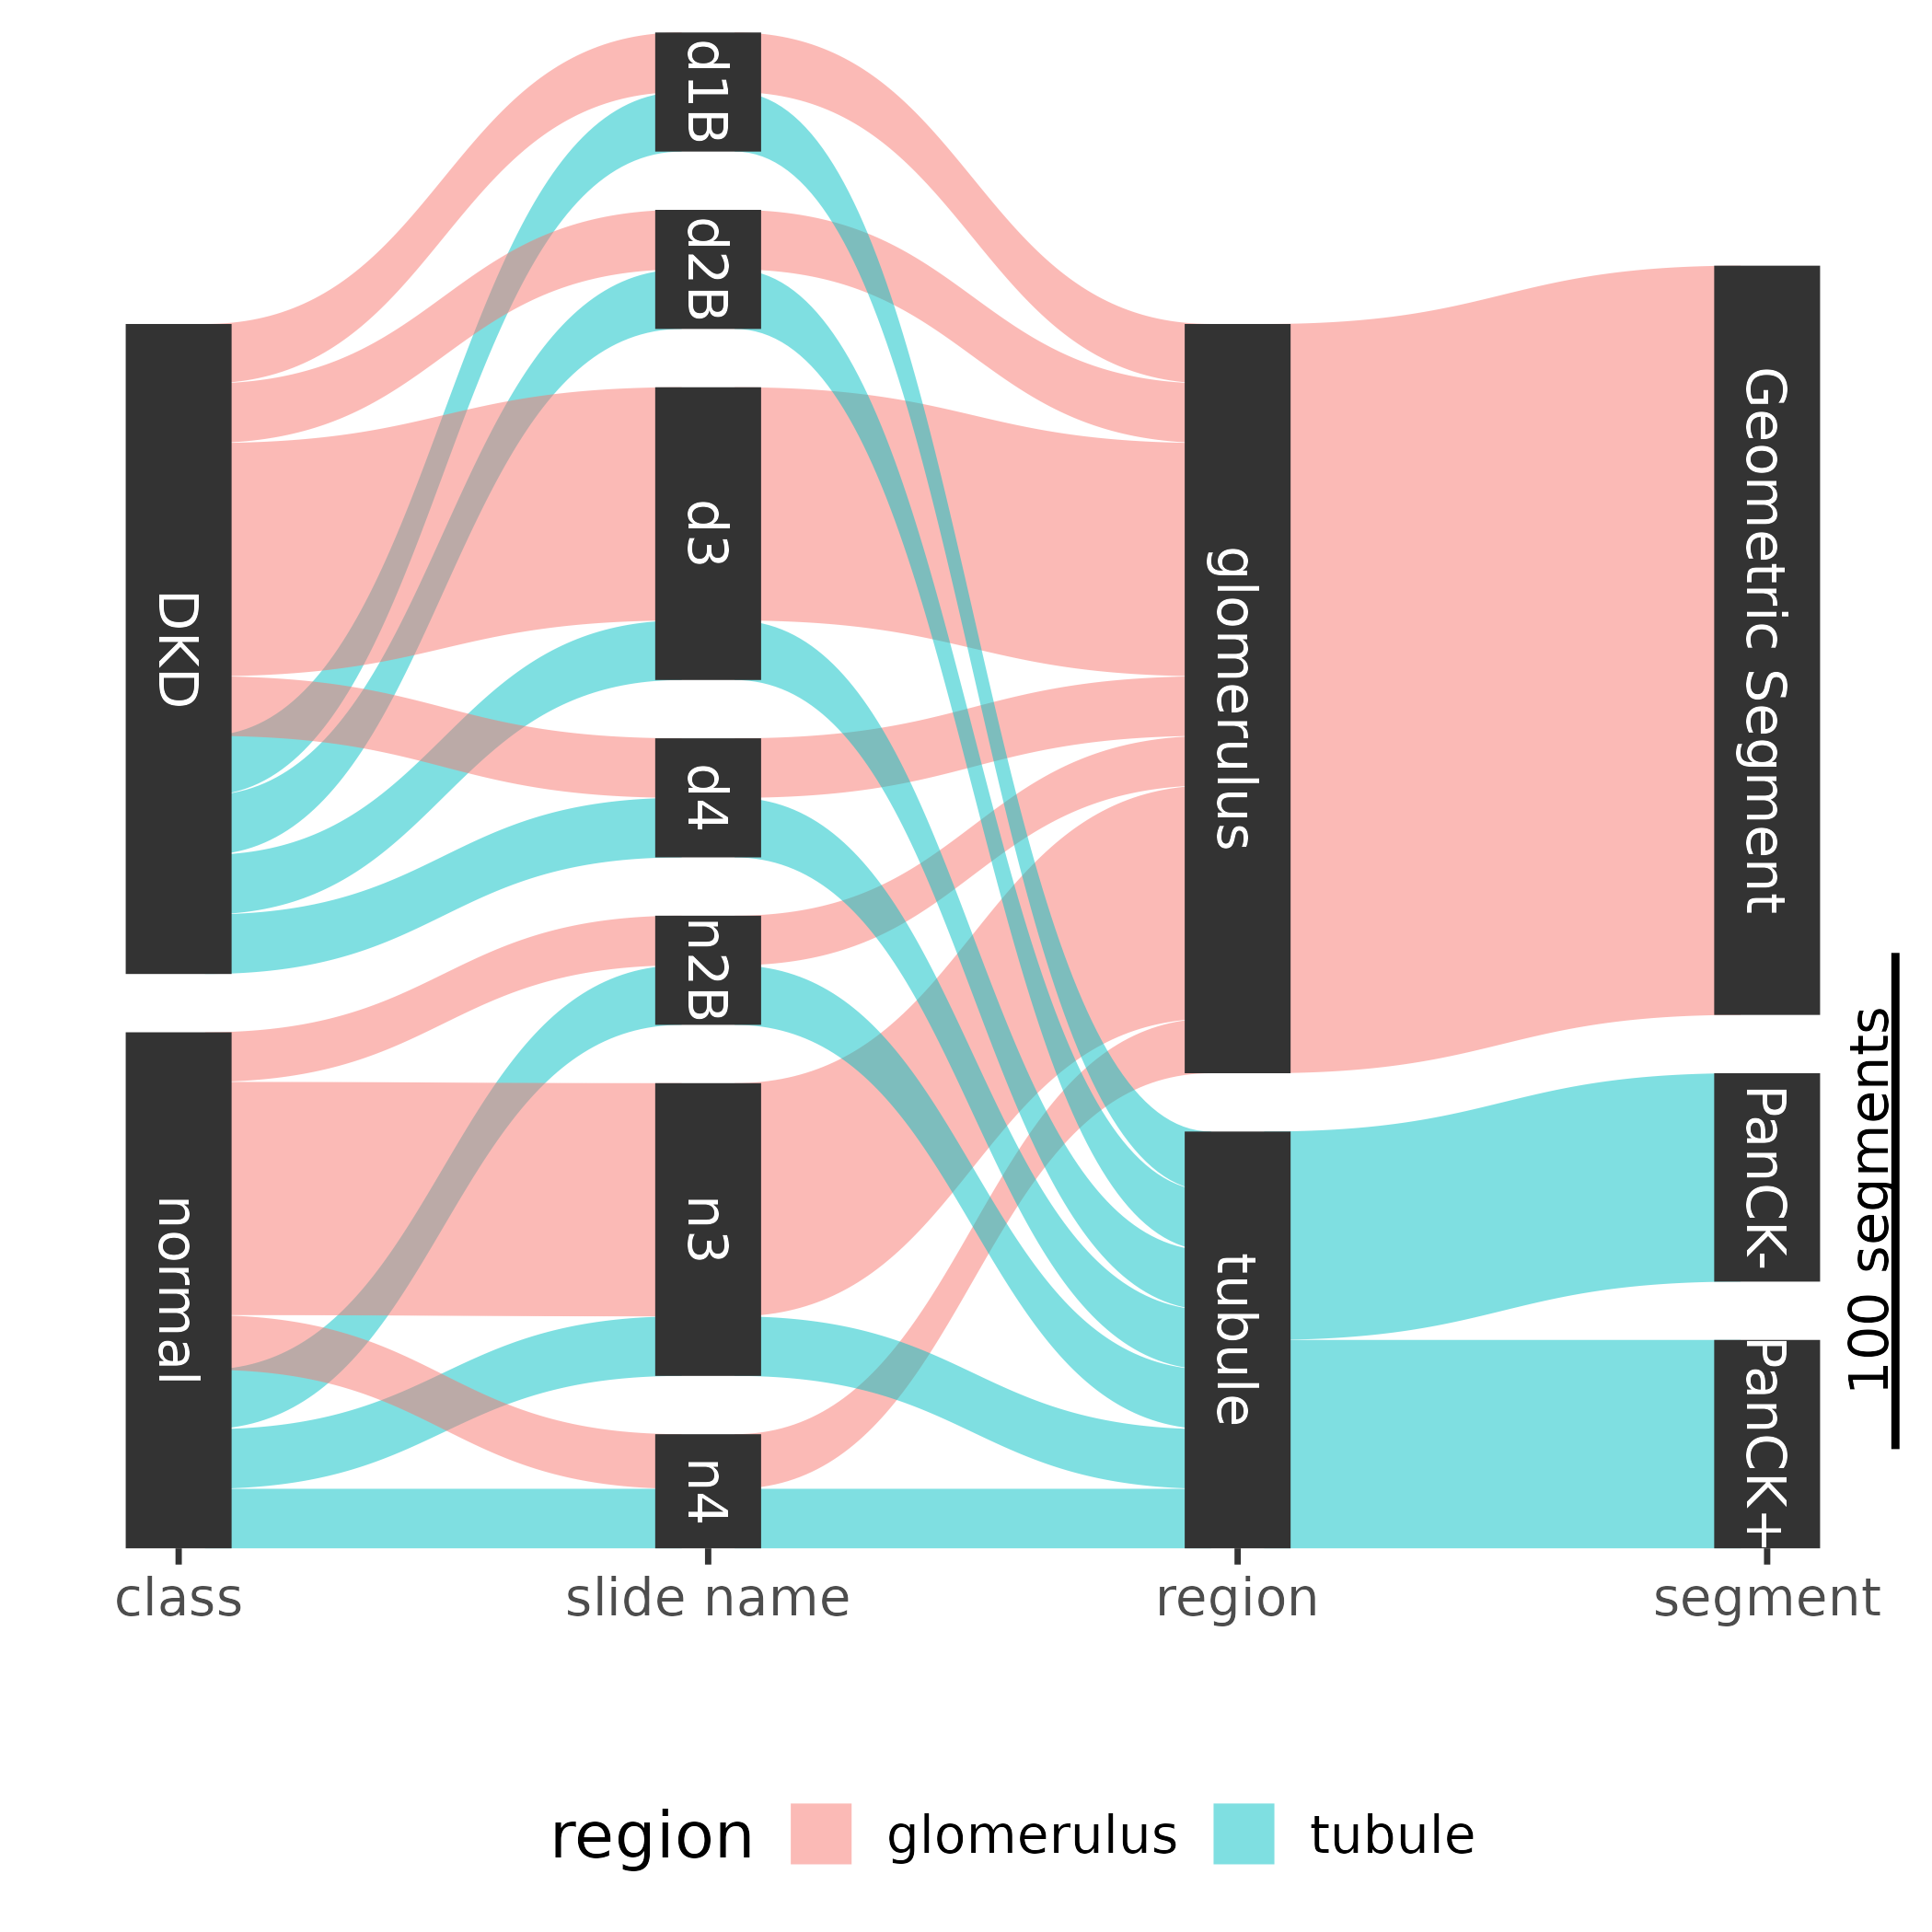

In [144]:
Image(filename='plots/1_2_sankey_sample_overview.png', width=500)

## 2 Quality control & pre-processing

### 2.1 Segment quality control

Before filtering any low-performing ROI/AOI segements (Regions of Interest / Areas of Interest), plot the distributions of the data for the different QC parameters.

In [145]:
trimmed = mpimg.imread('plots/2_1_2_trimmed_percentage.png')
stitched = mpimg.imread('plots/2_1_2_stitched_percentage.png')
aligned = mpimg.imread('plots/2_1_2_aligned_percentage.png')
saturation = mpimg.imread('plots/2_1_2_saturation_percentage.png')
area = mpimg.imread('plots/2_1_2_area.png')
nuclei = mpimg.imread('plots/2_1_2_nuclei.png')
neg_geo_mean = mpimg.imread('plots/2_1_2_NegGeoMean_NegGeoMean_Hsa_WTA_v1.0.png')

histograms = [trimmed, stitched, aligned, saturation, area, nuclei, neg_geo_mean]


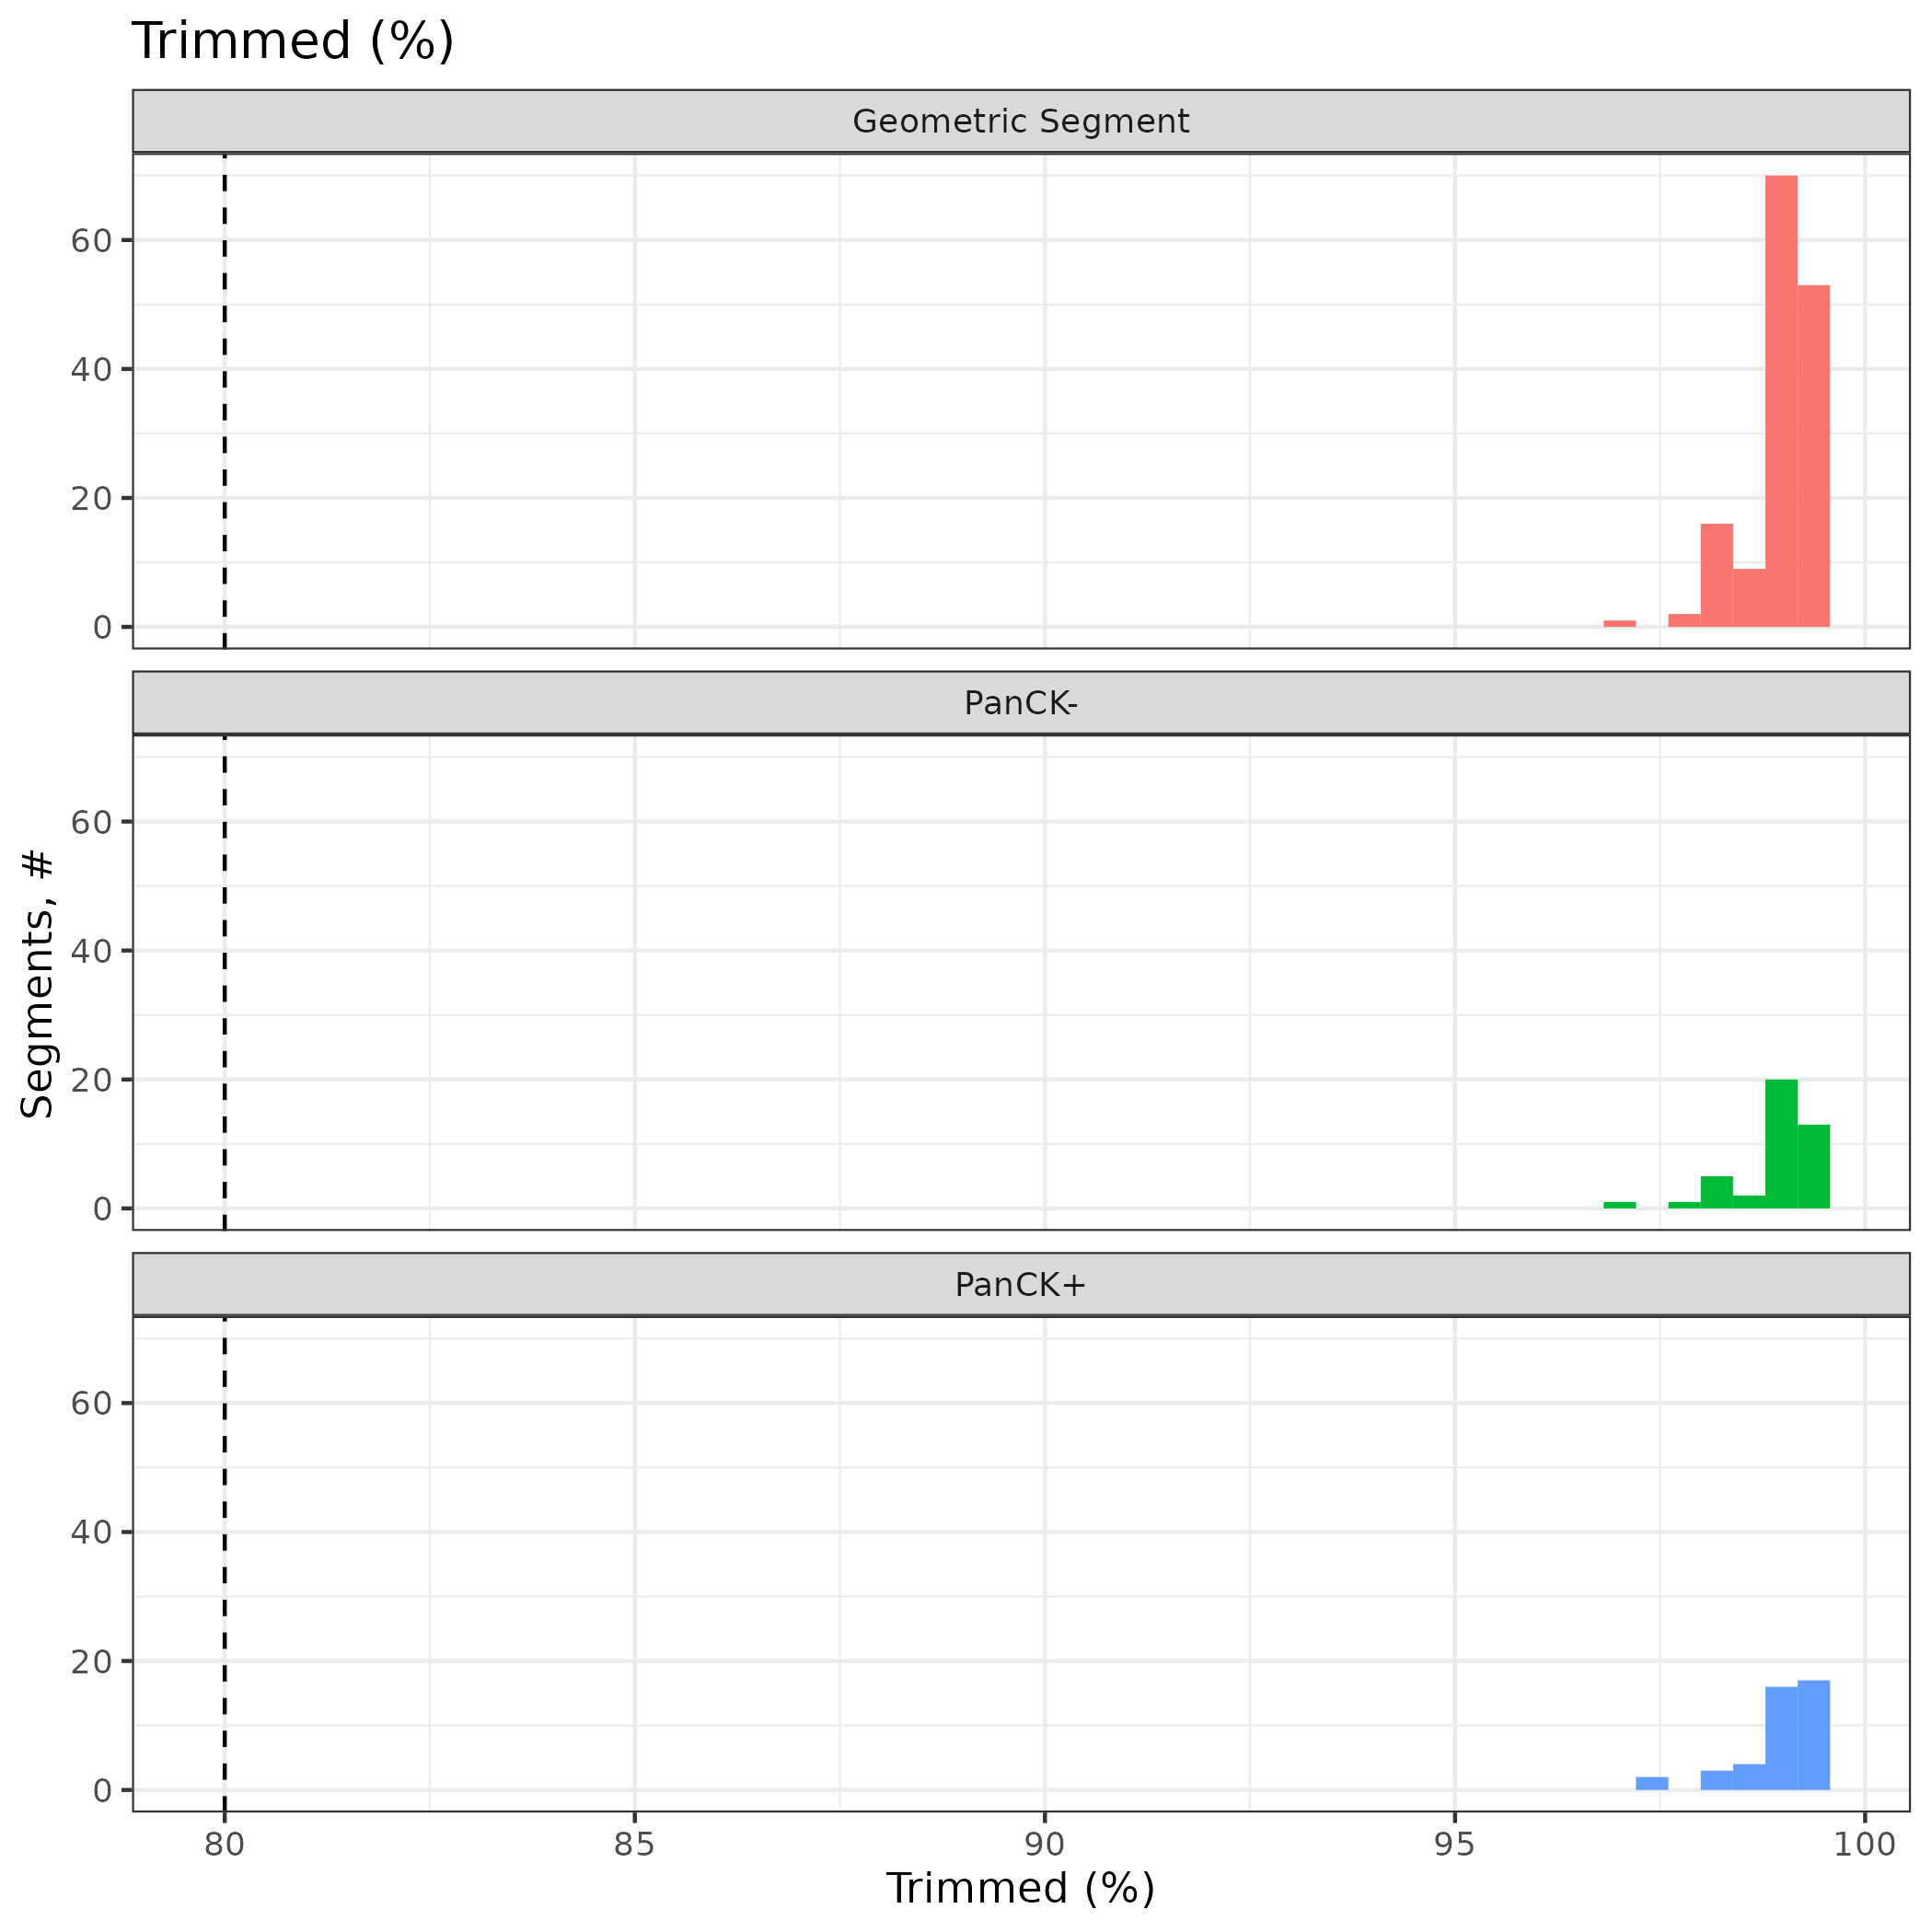
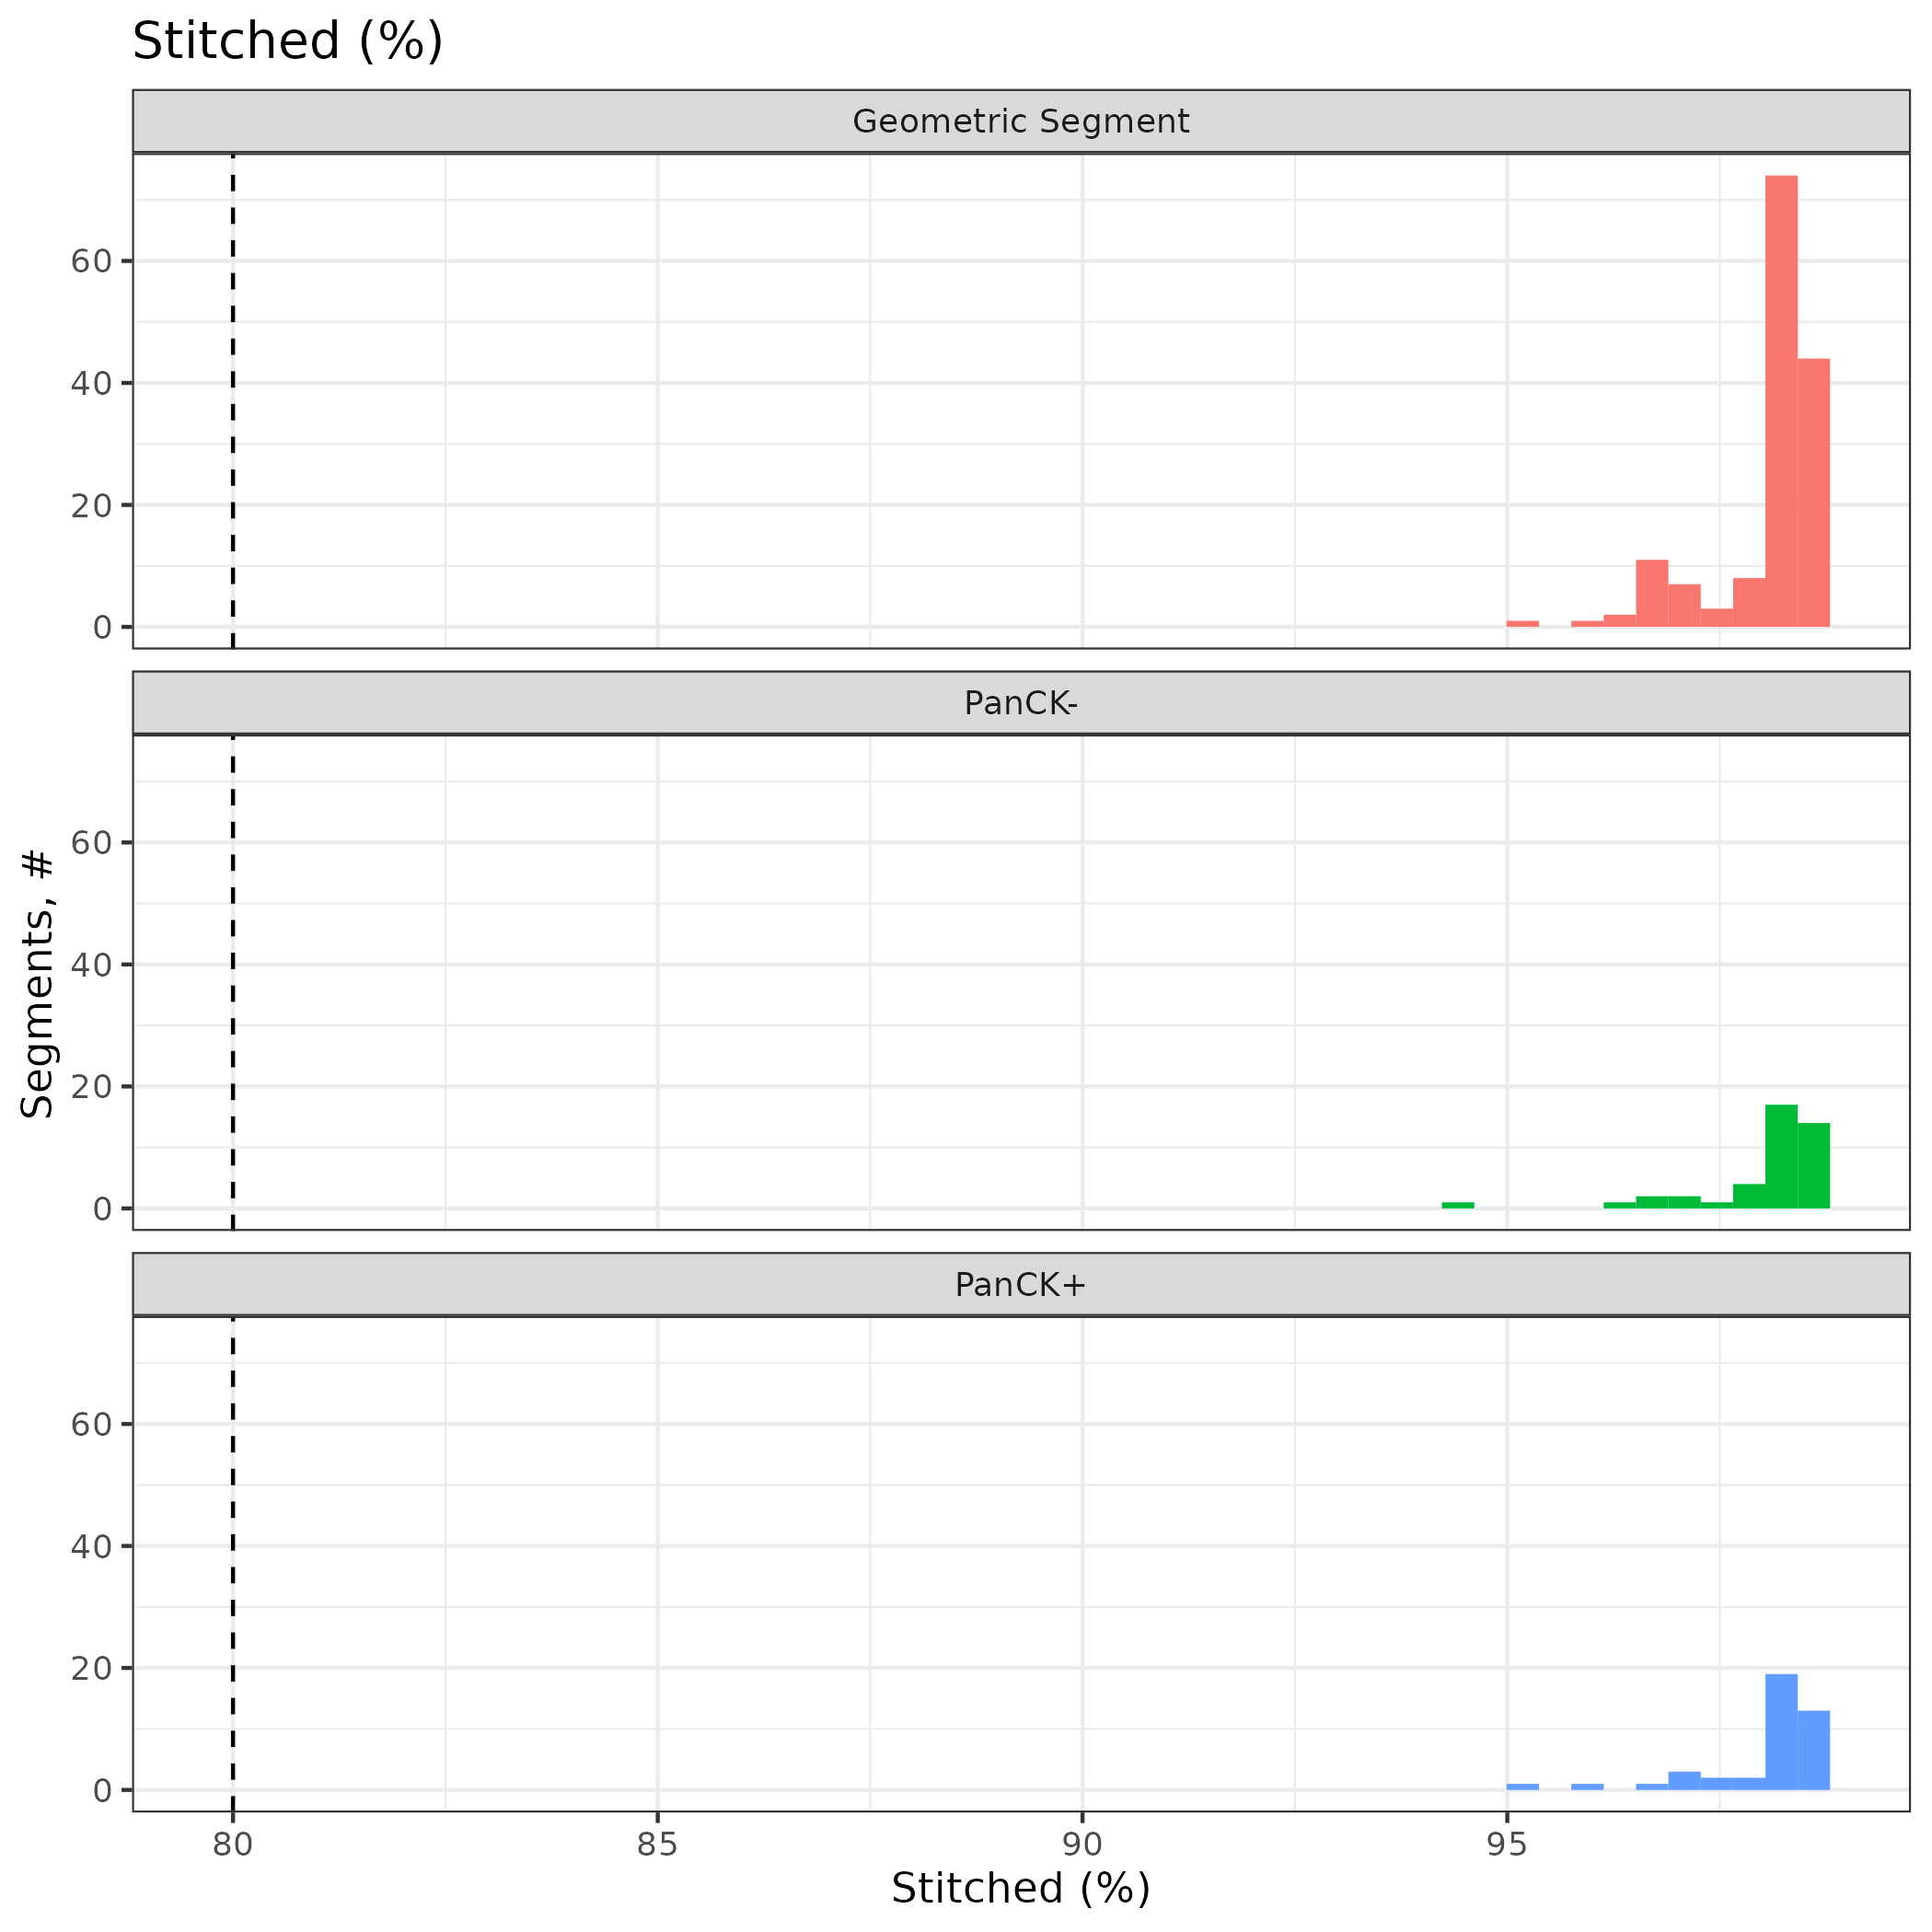
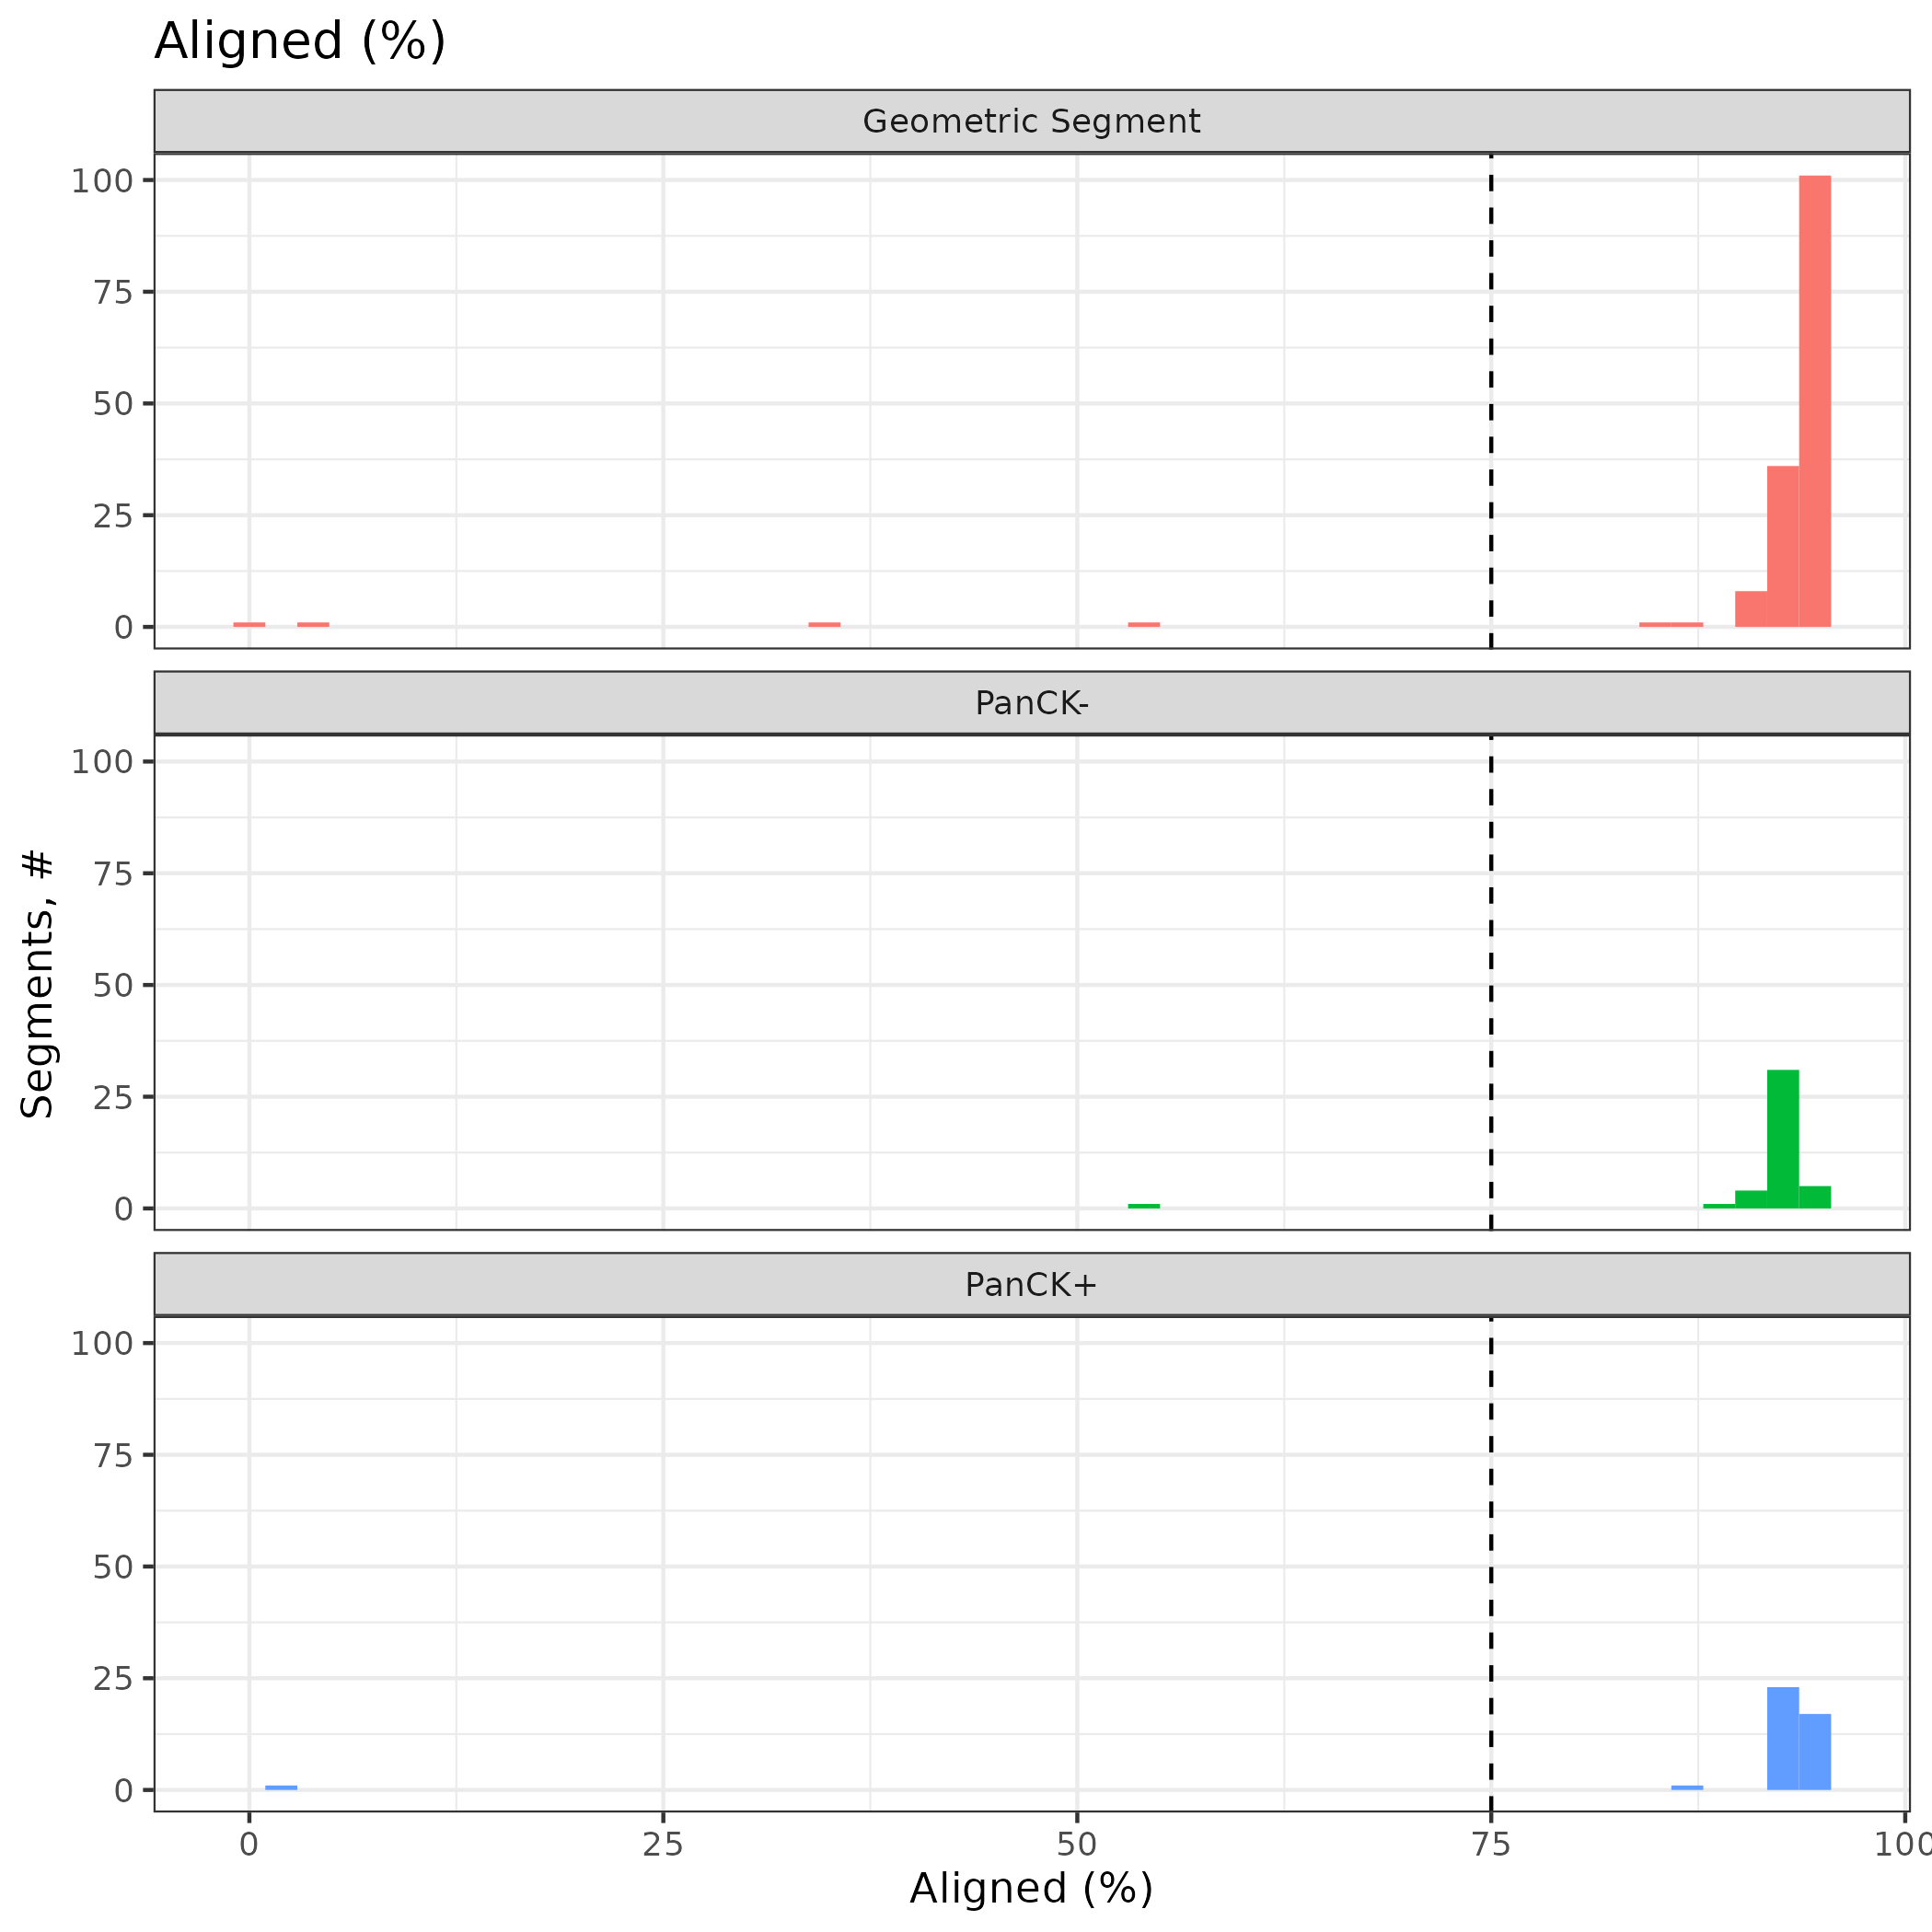
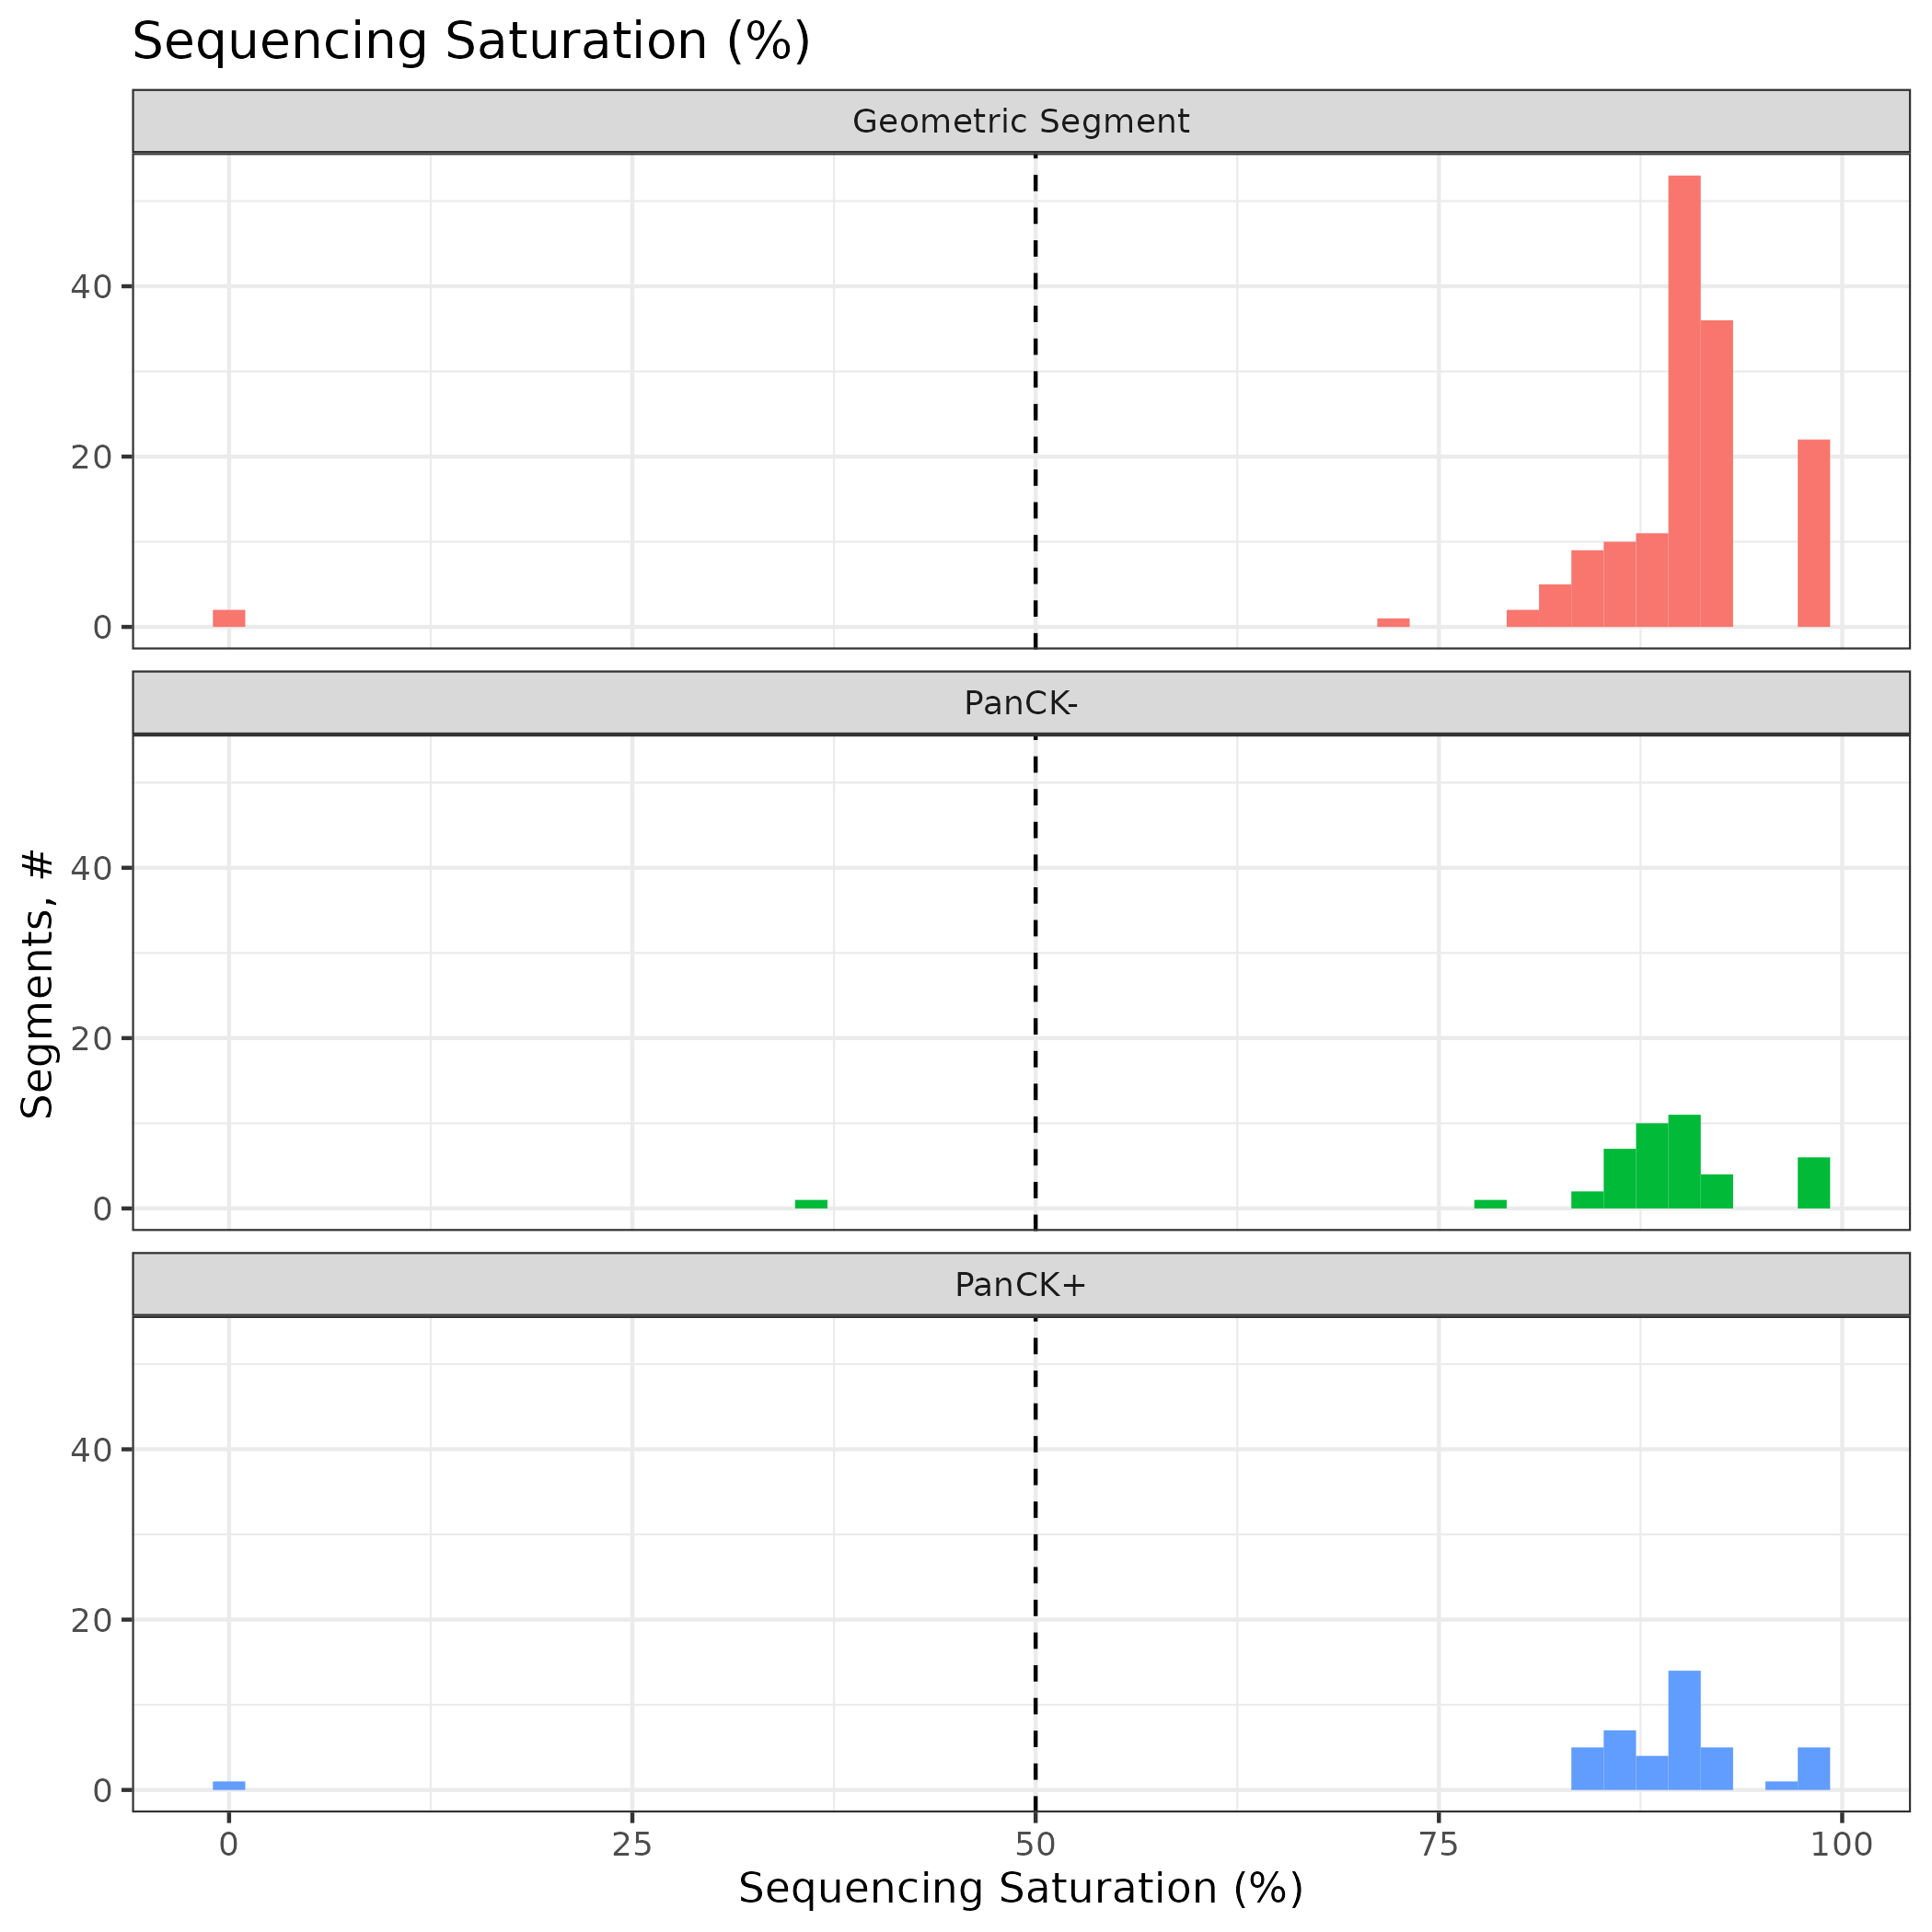
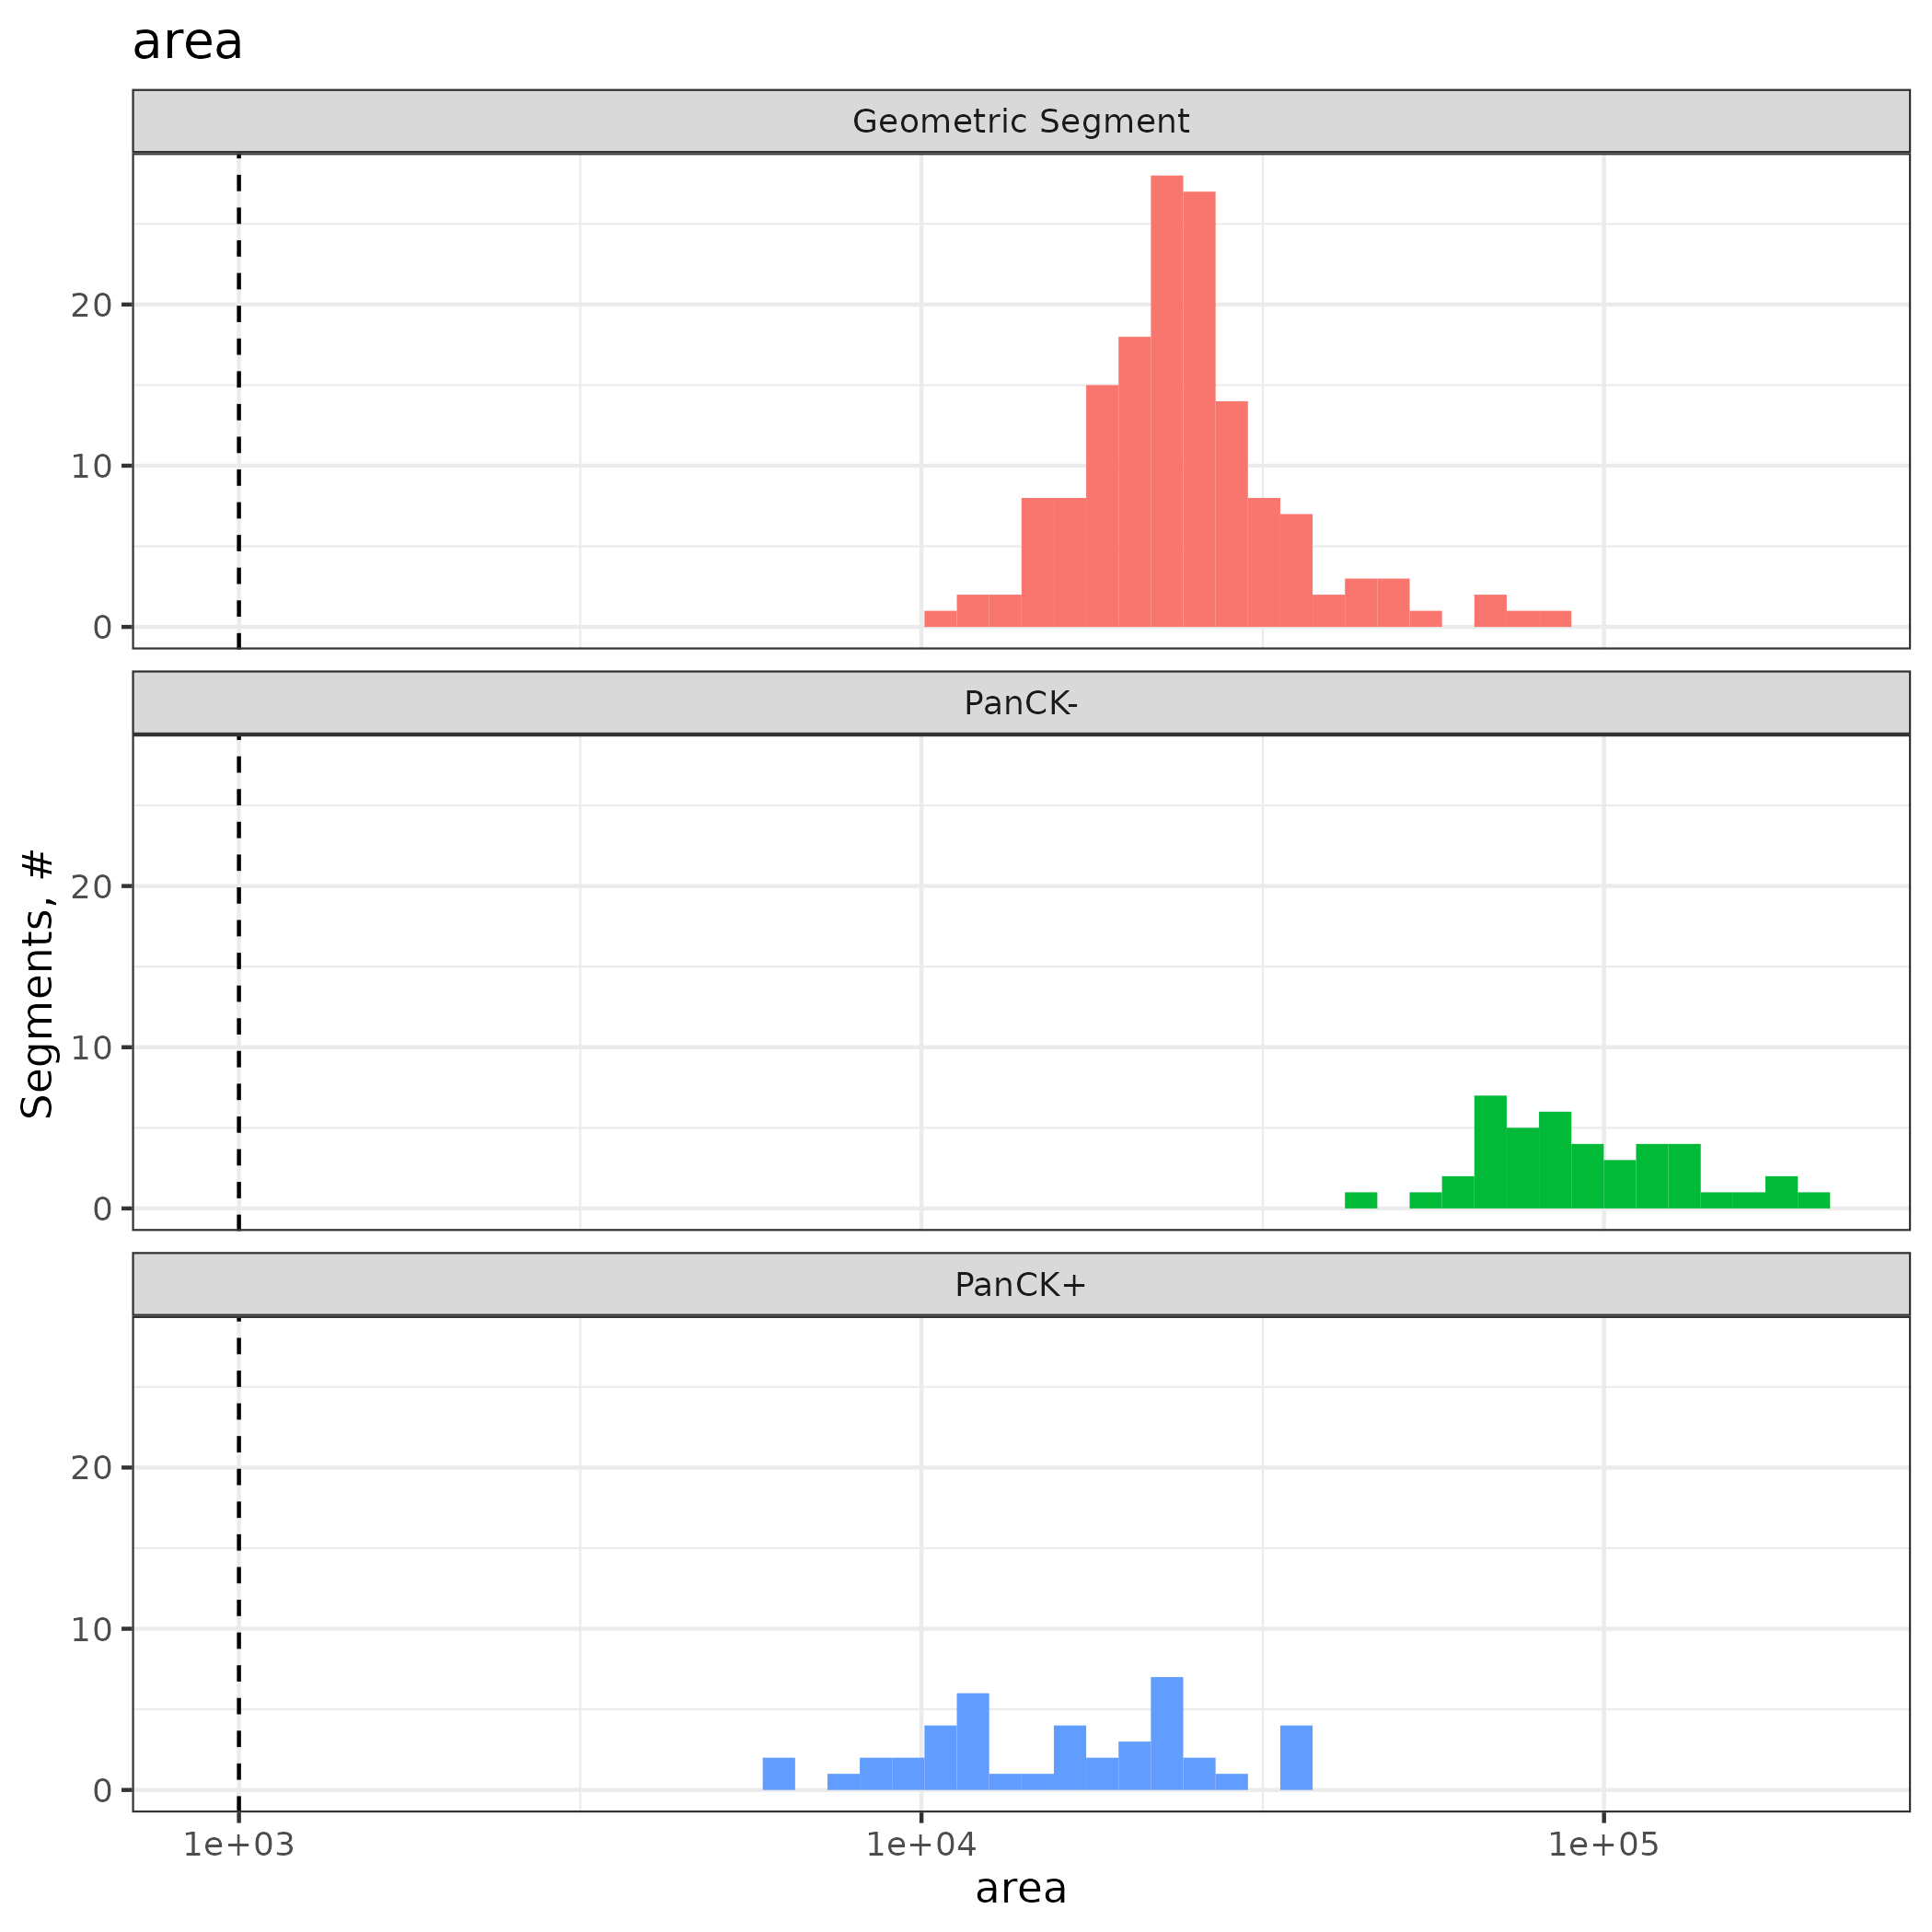
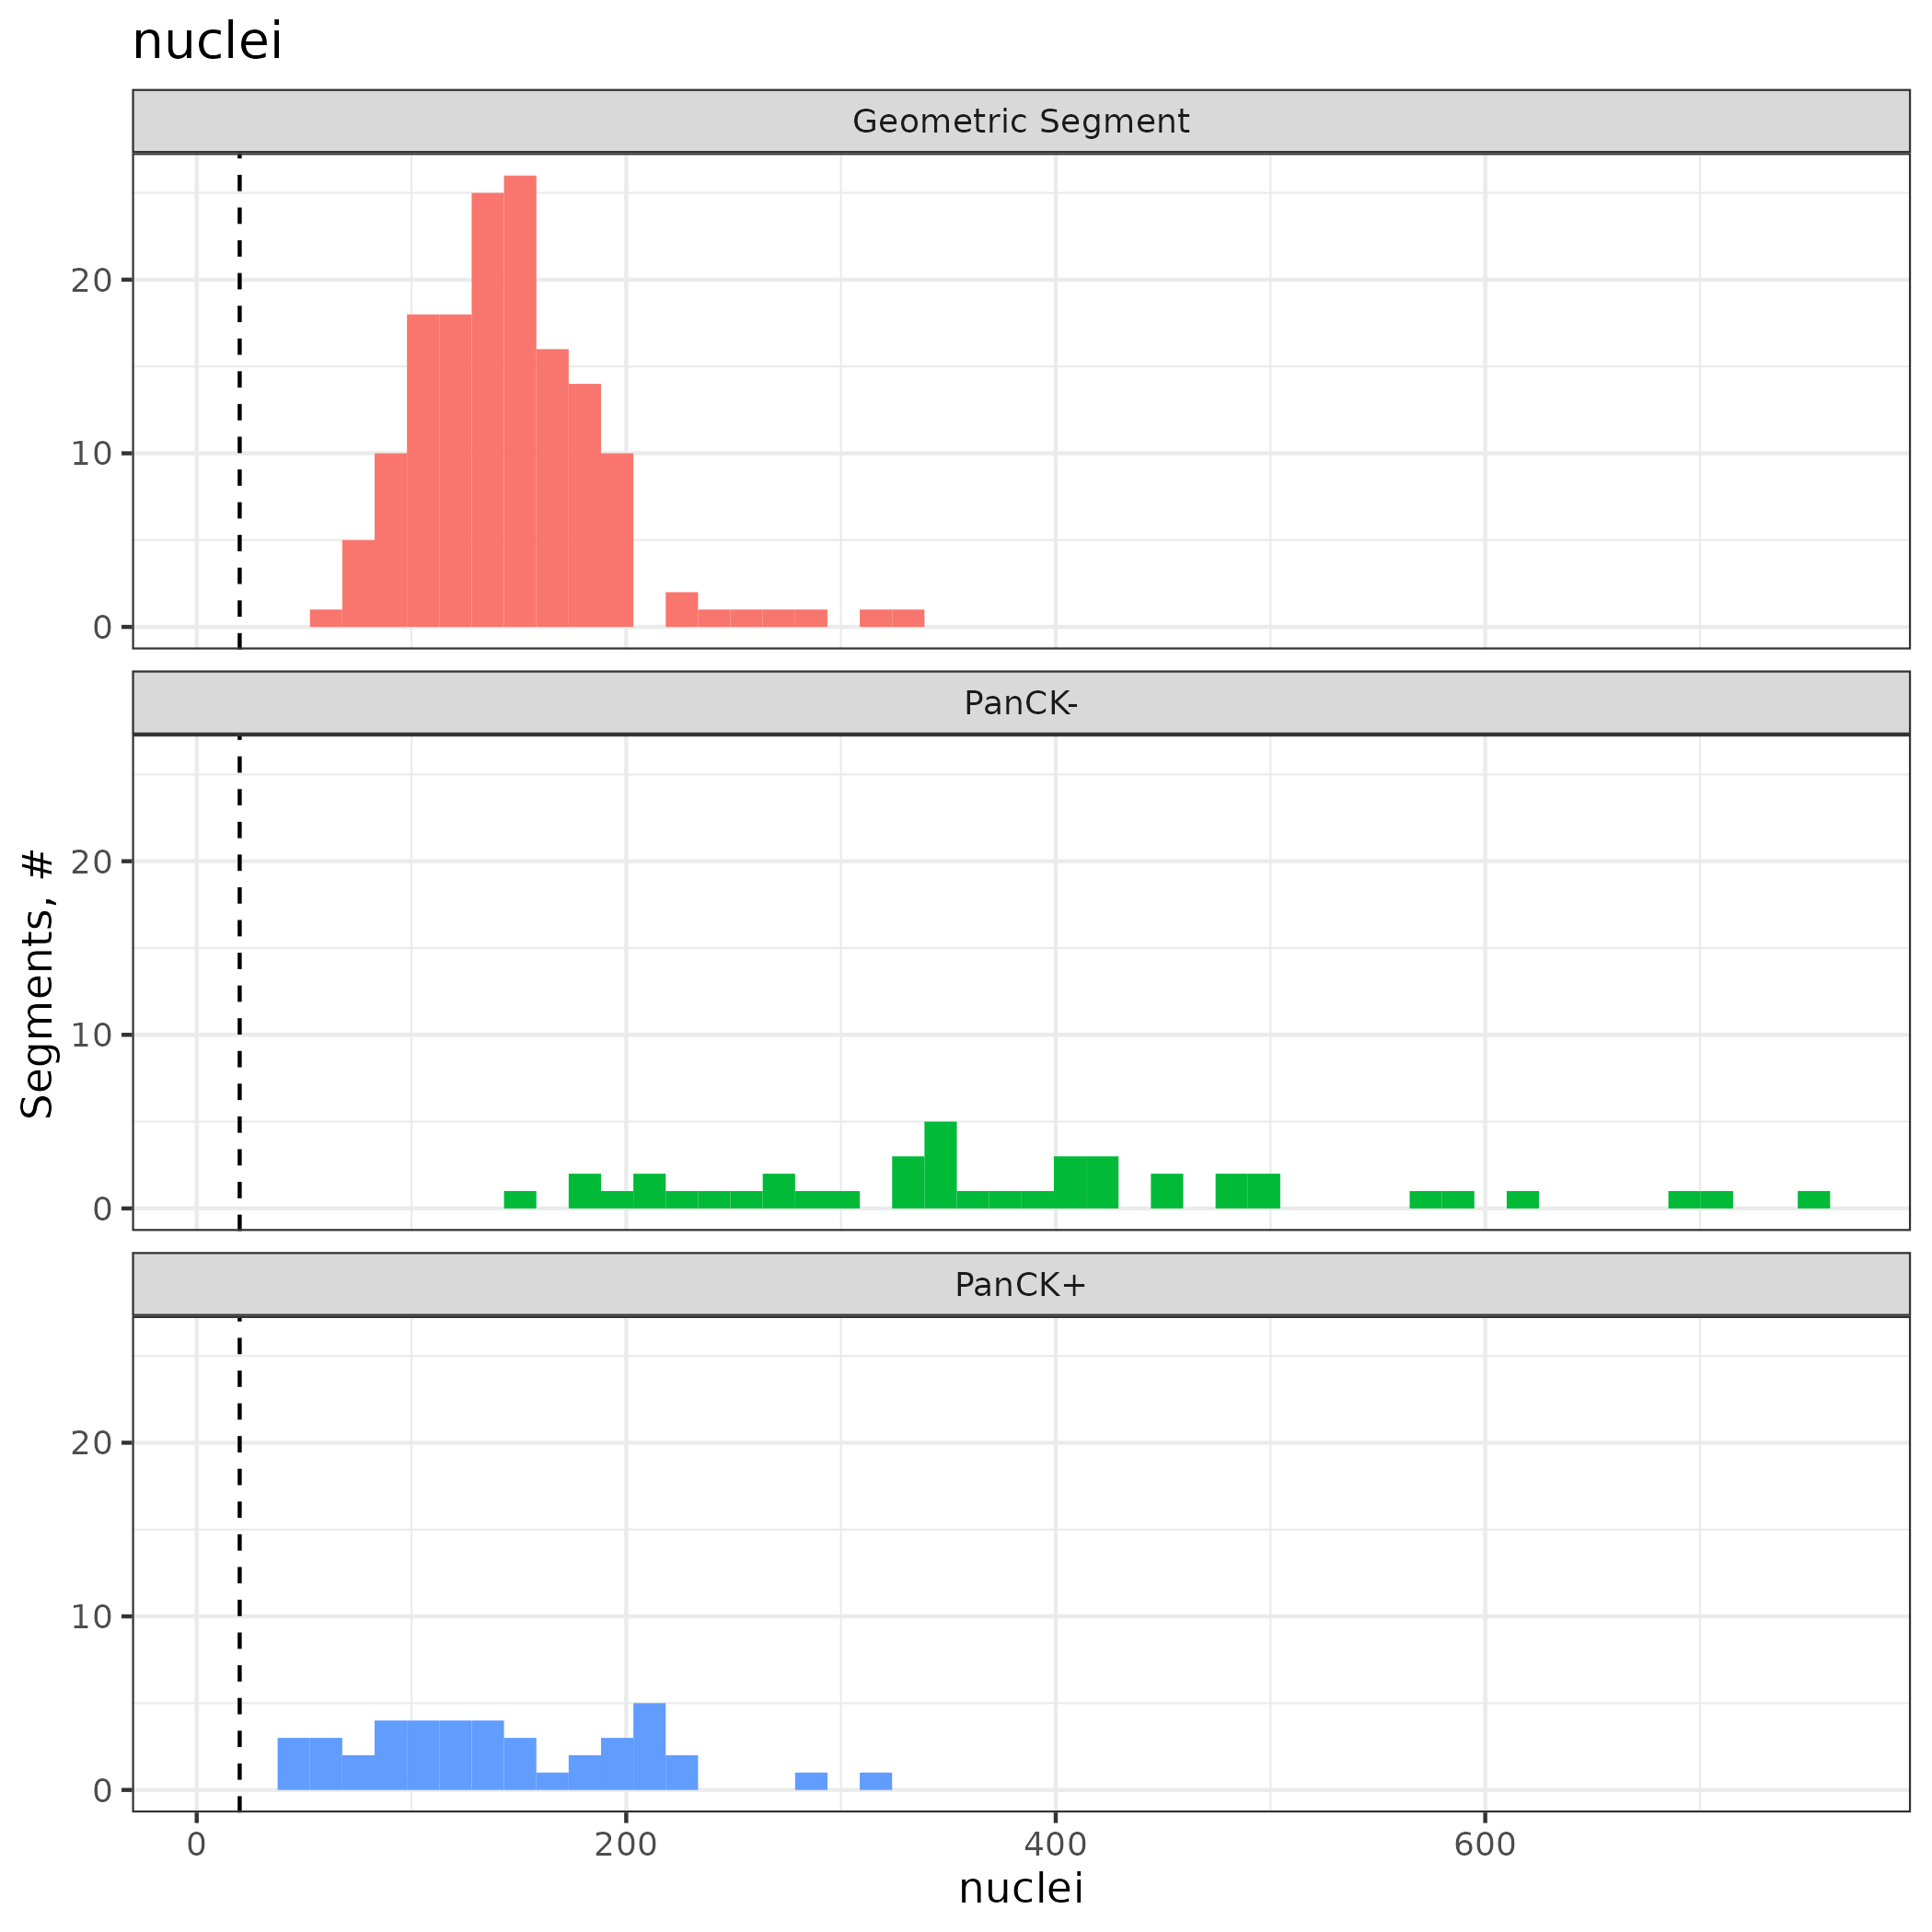
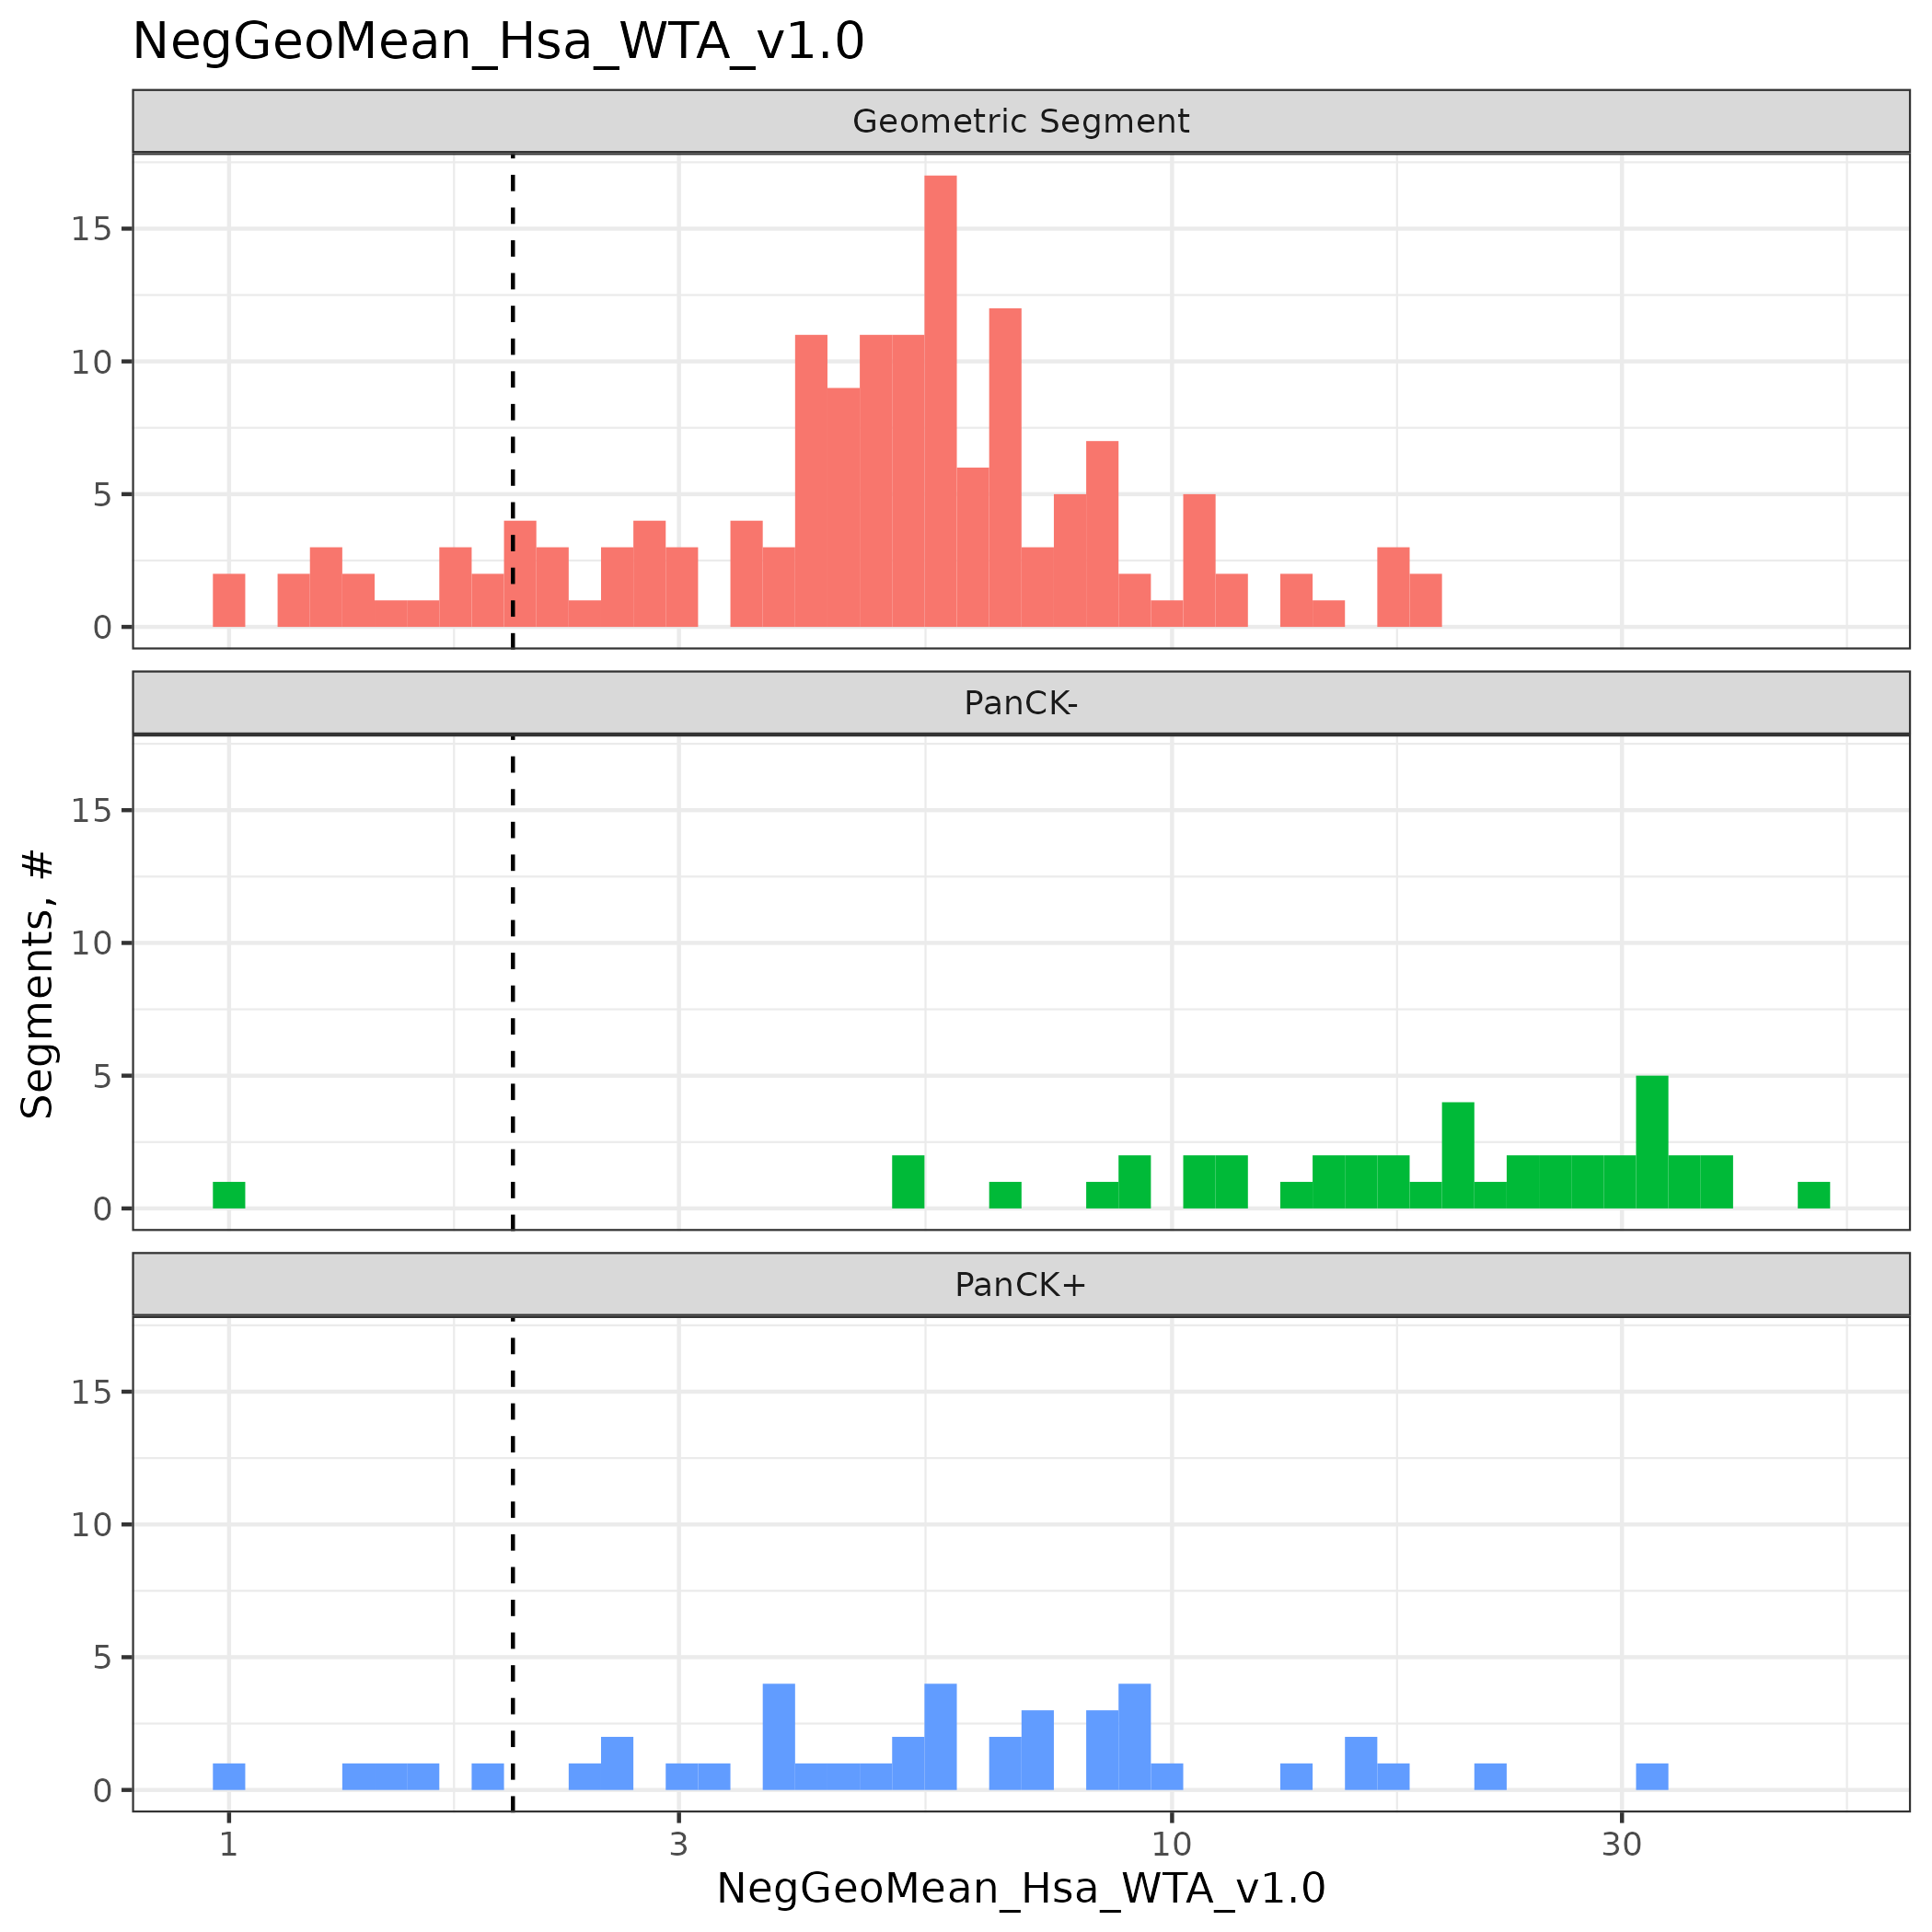


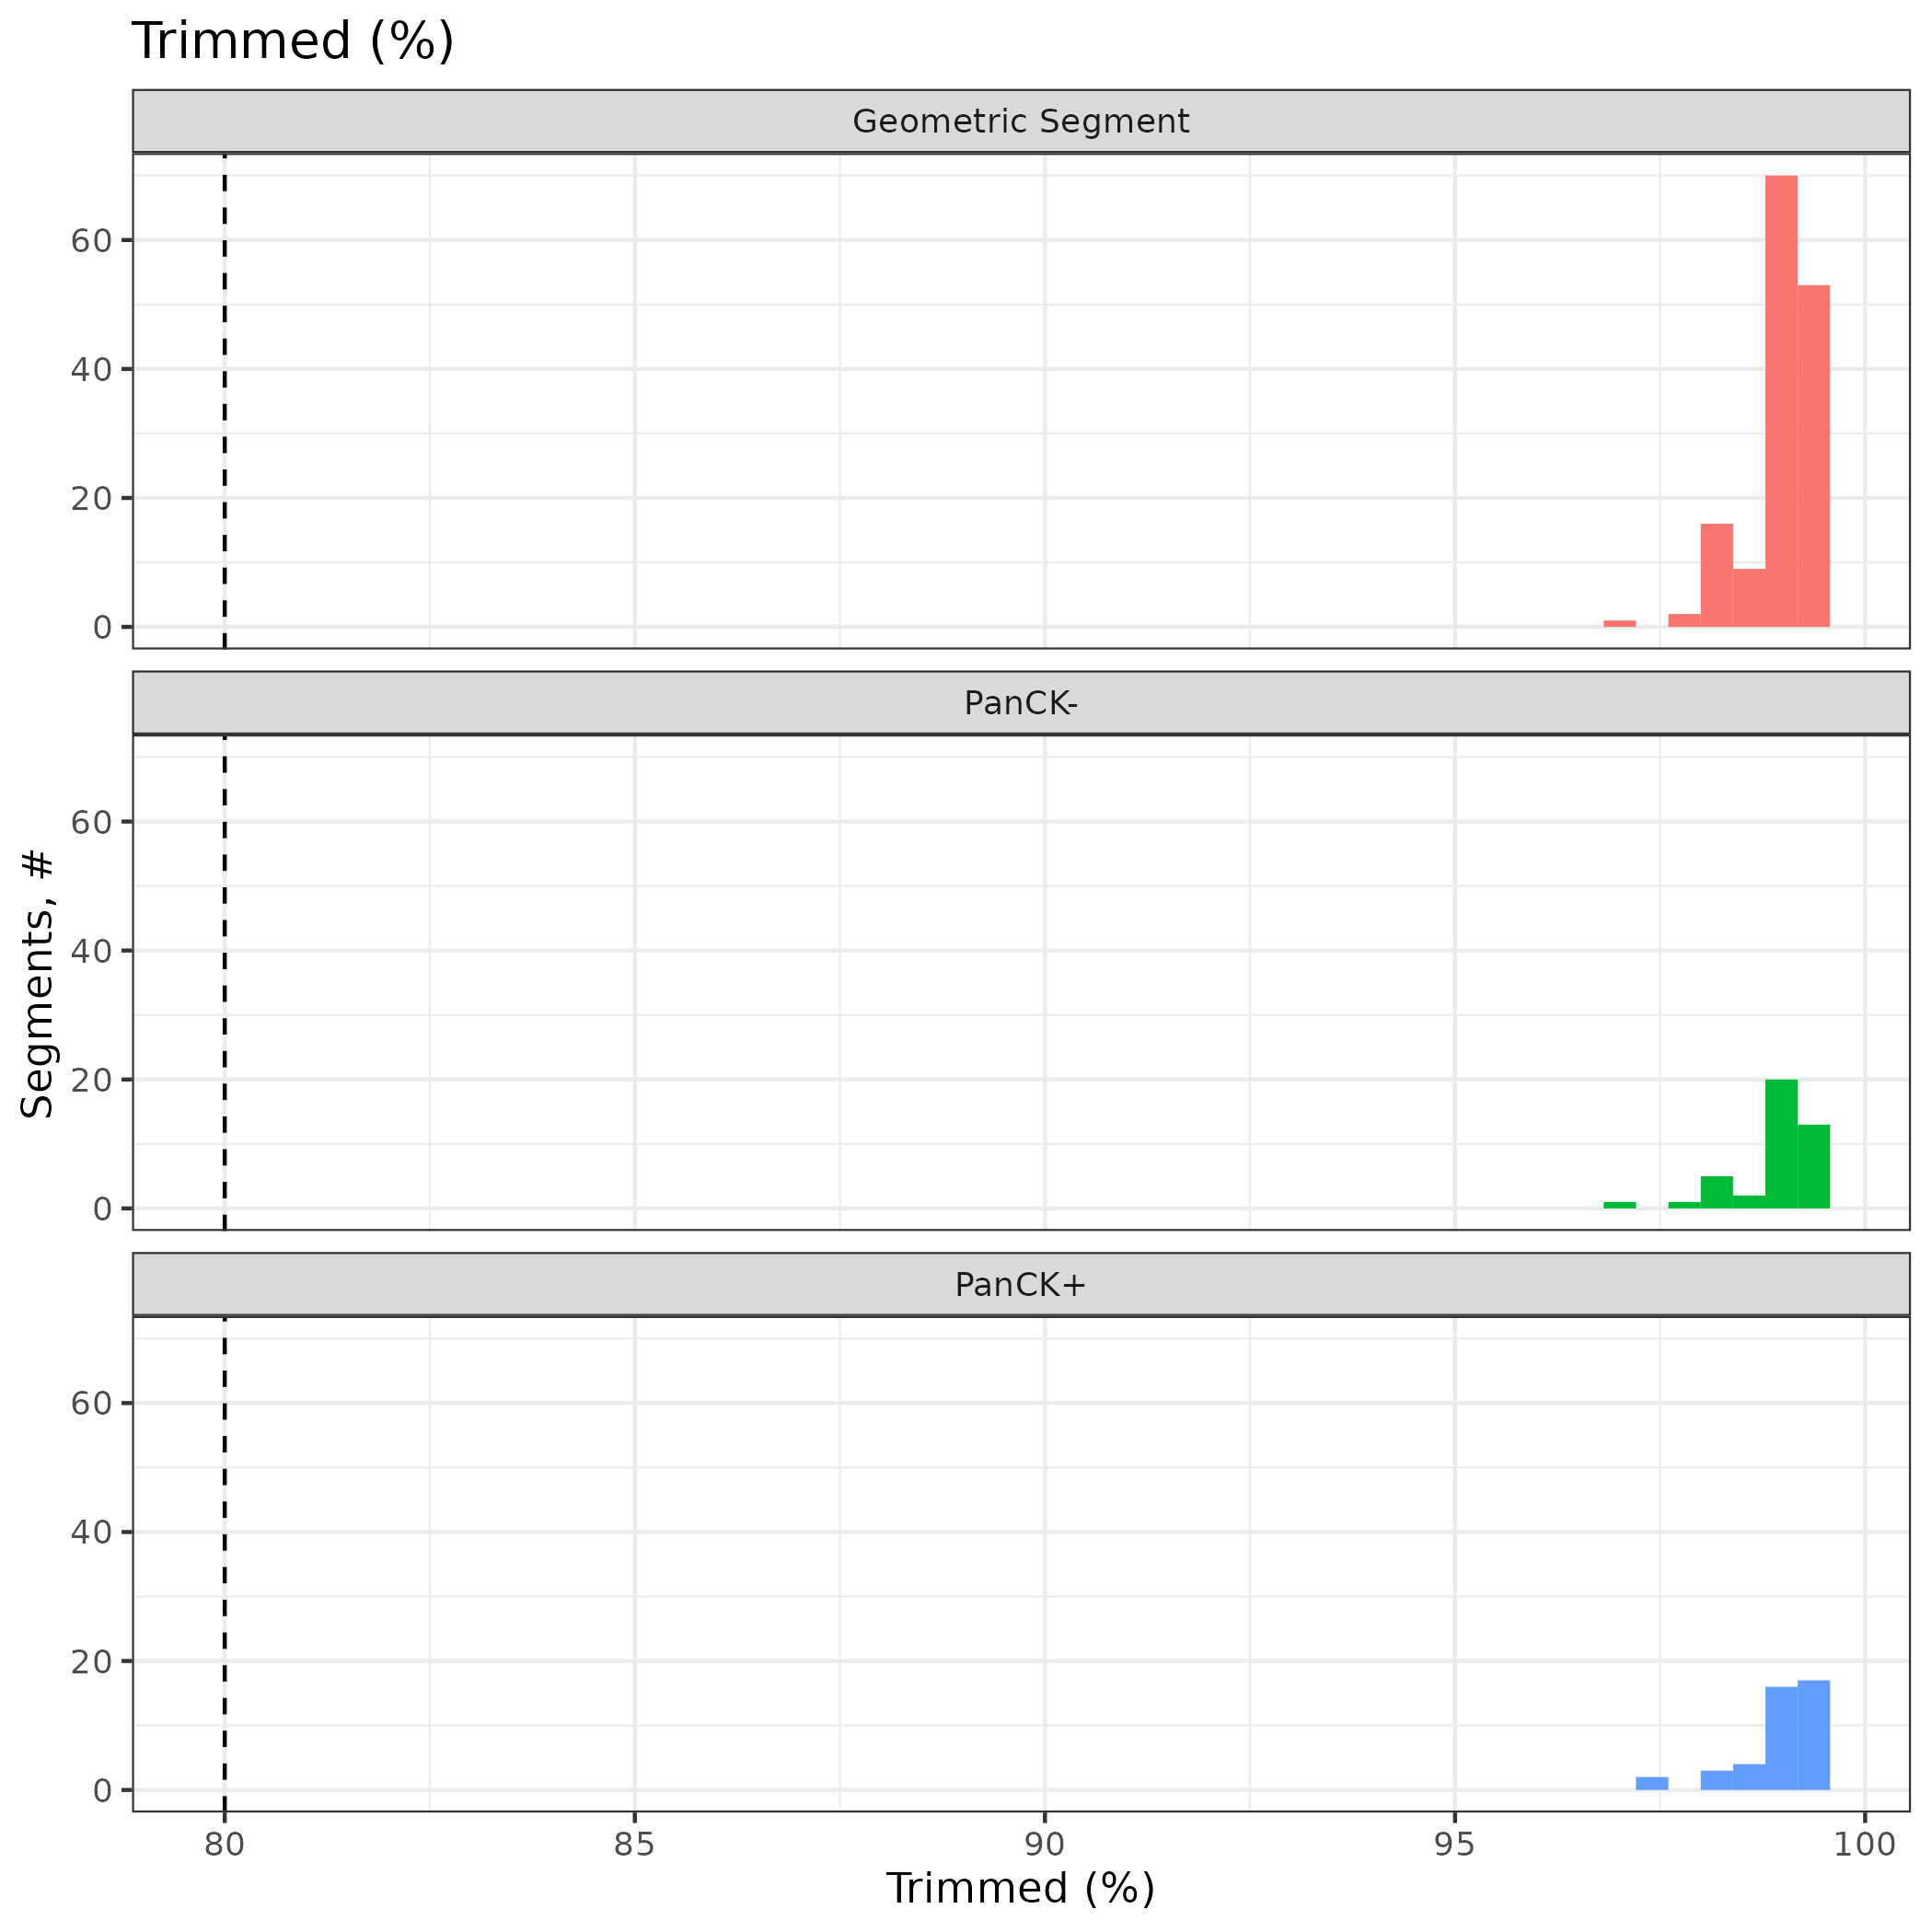
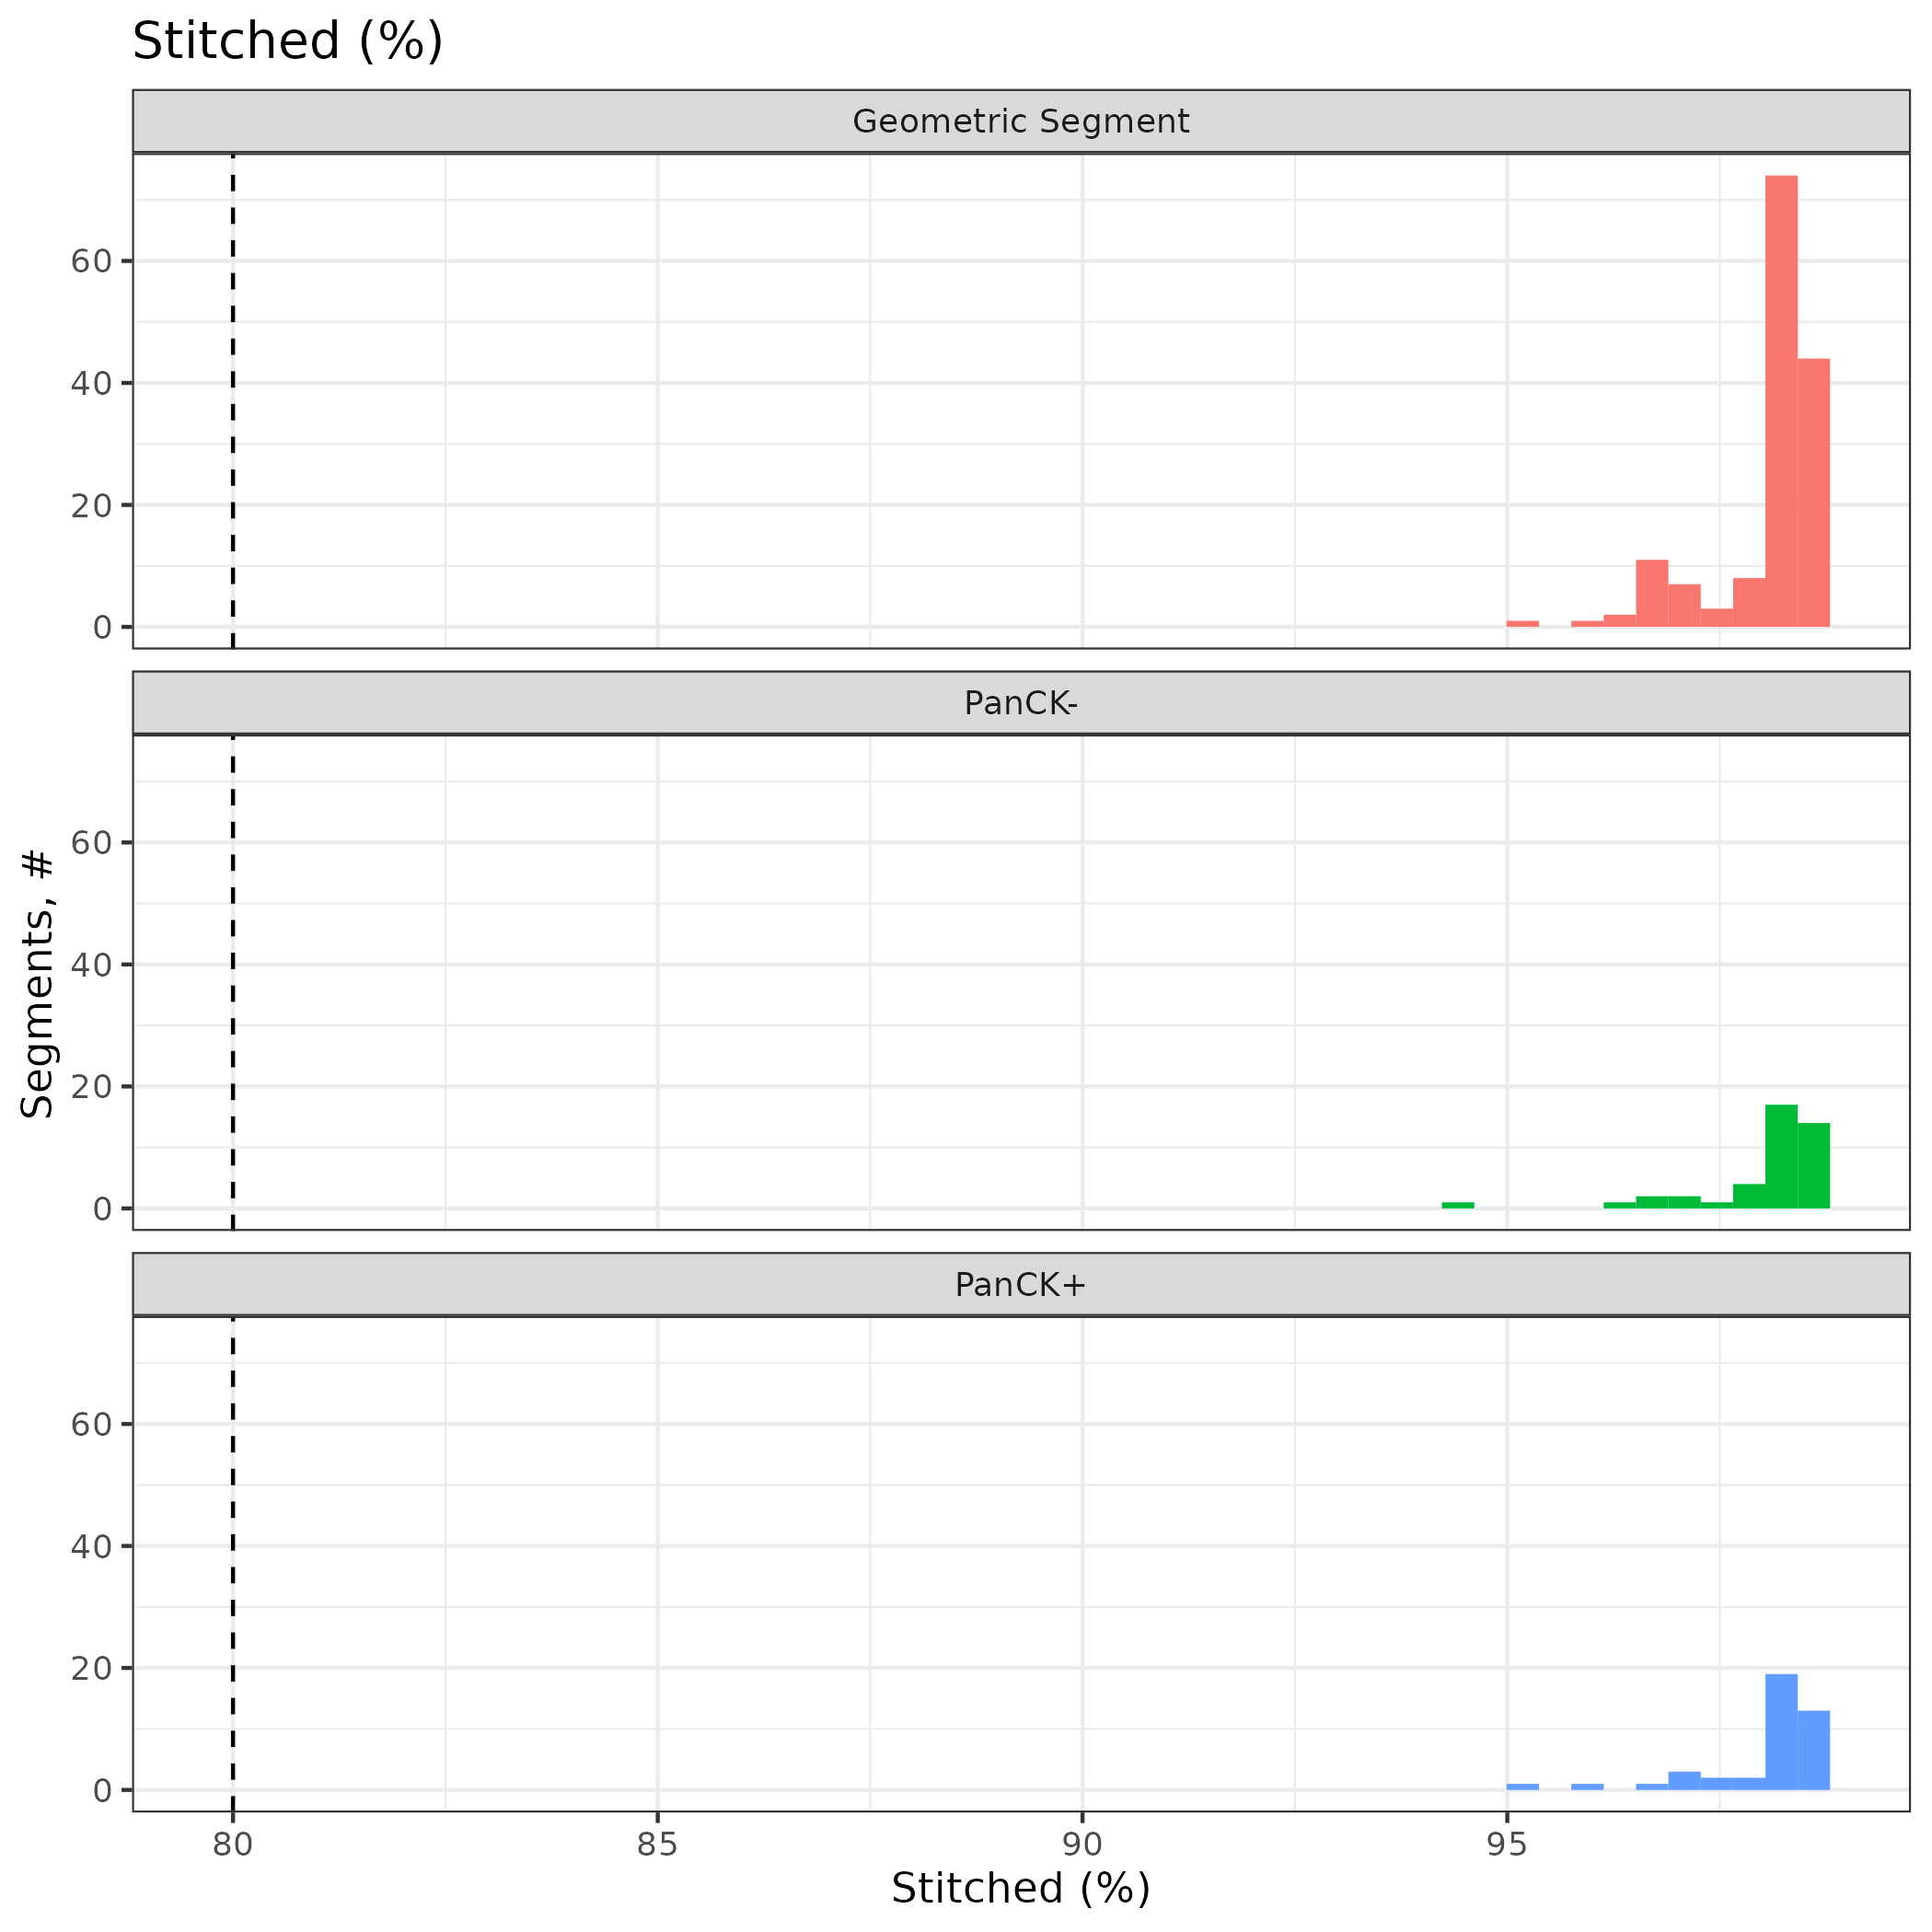
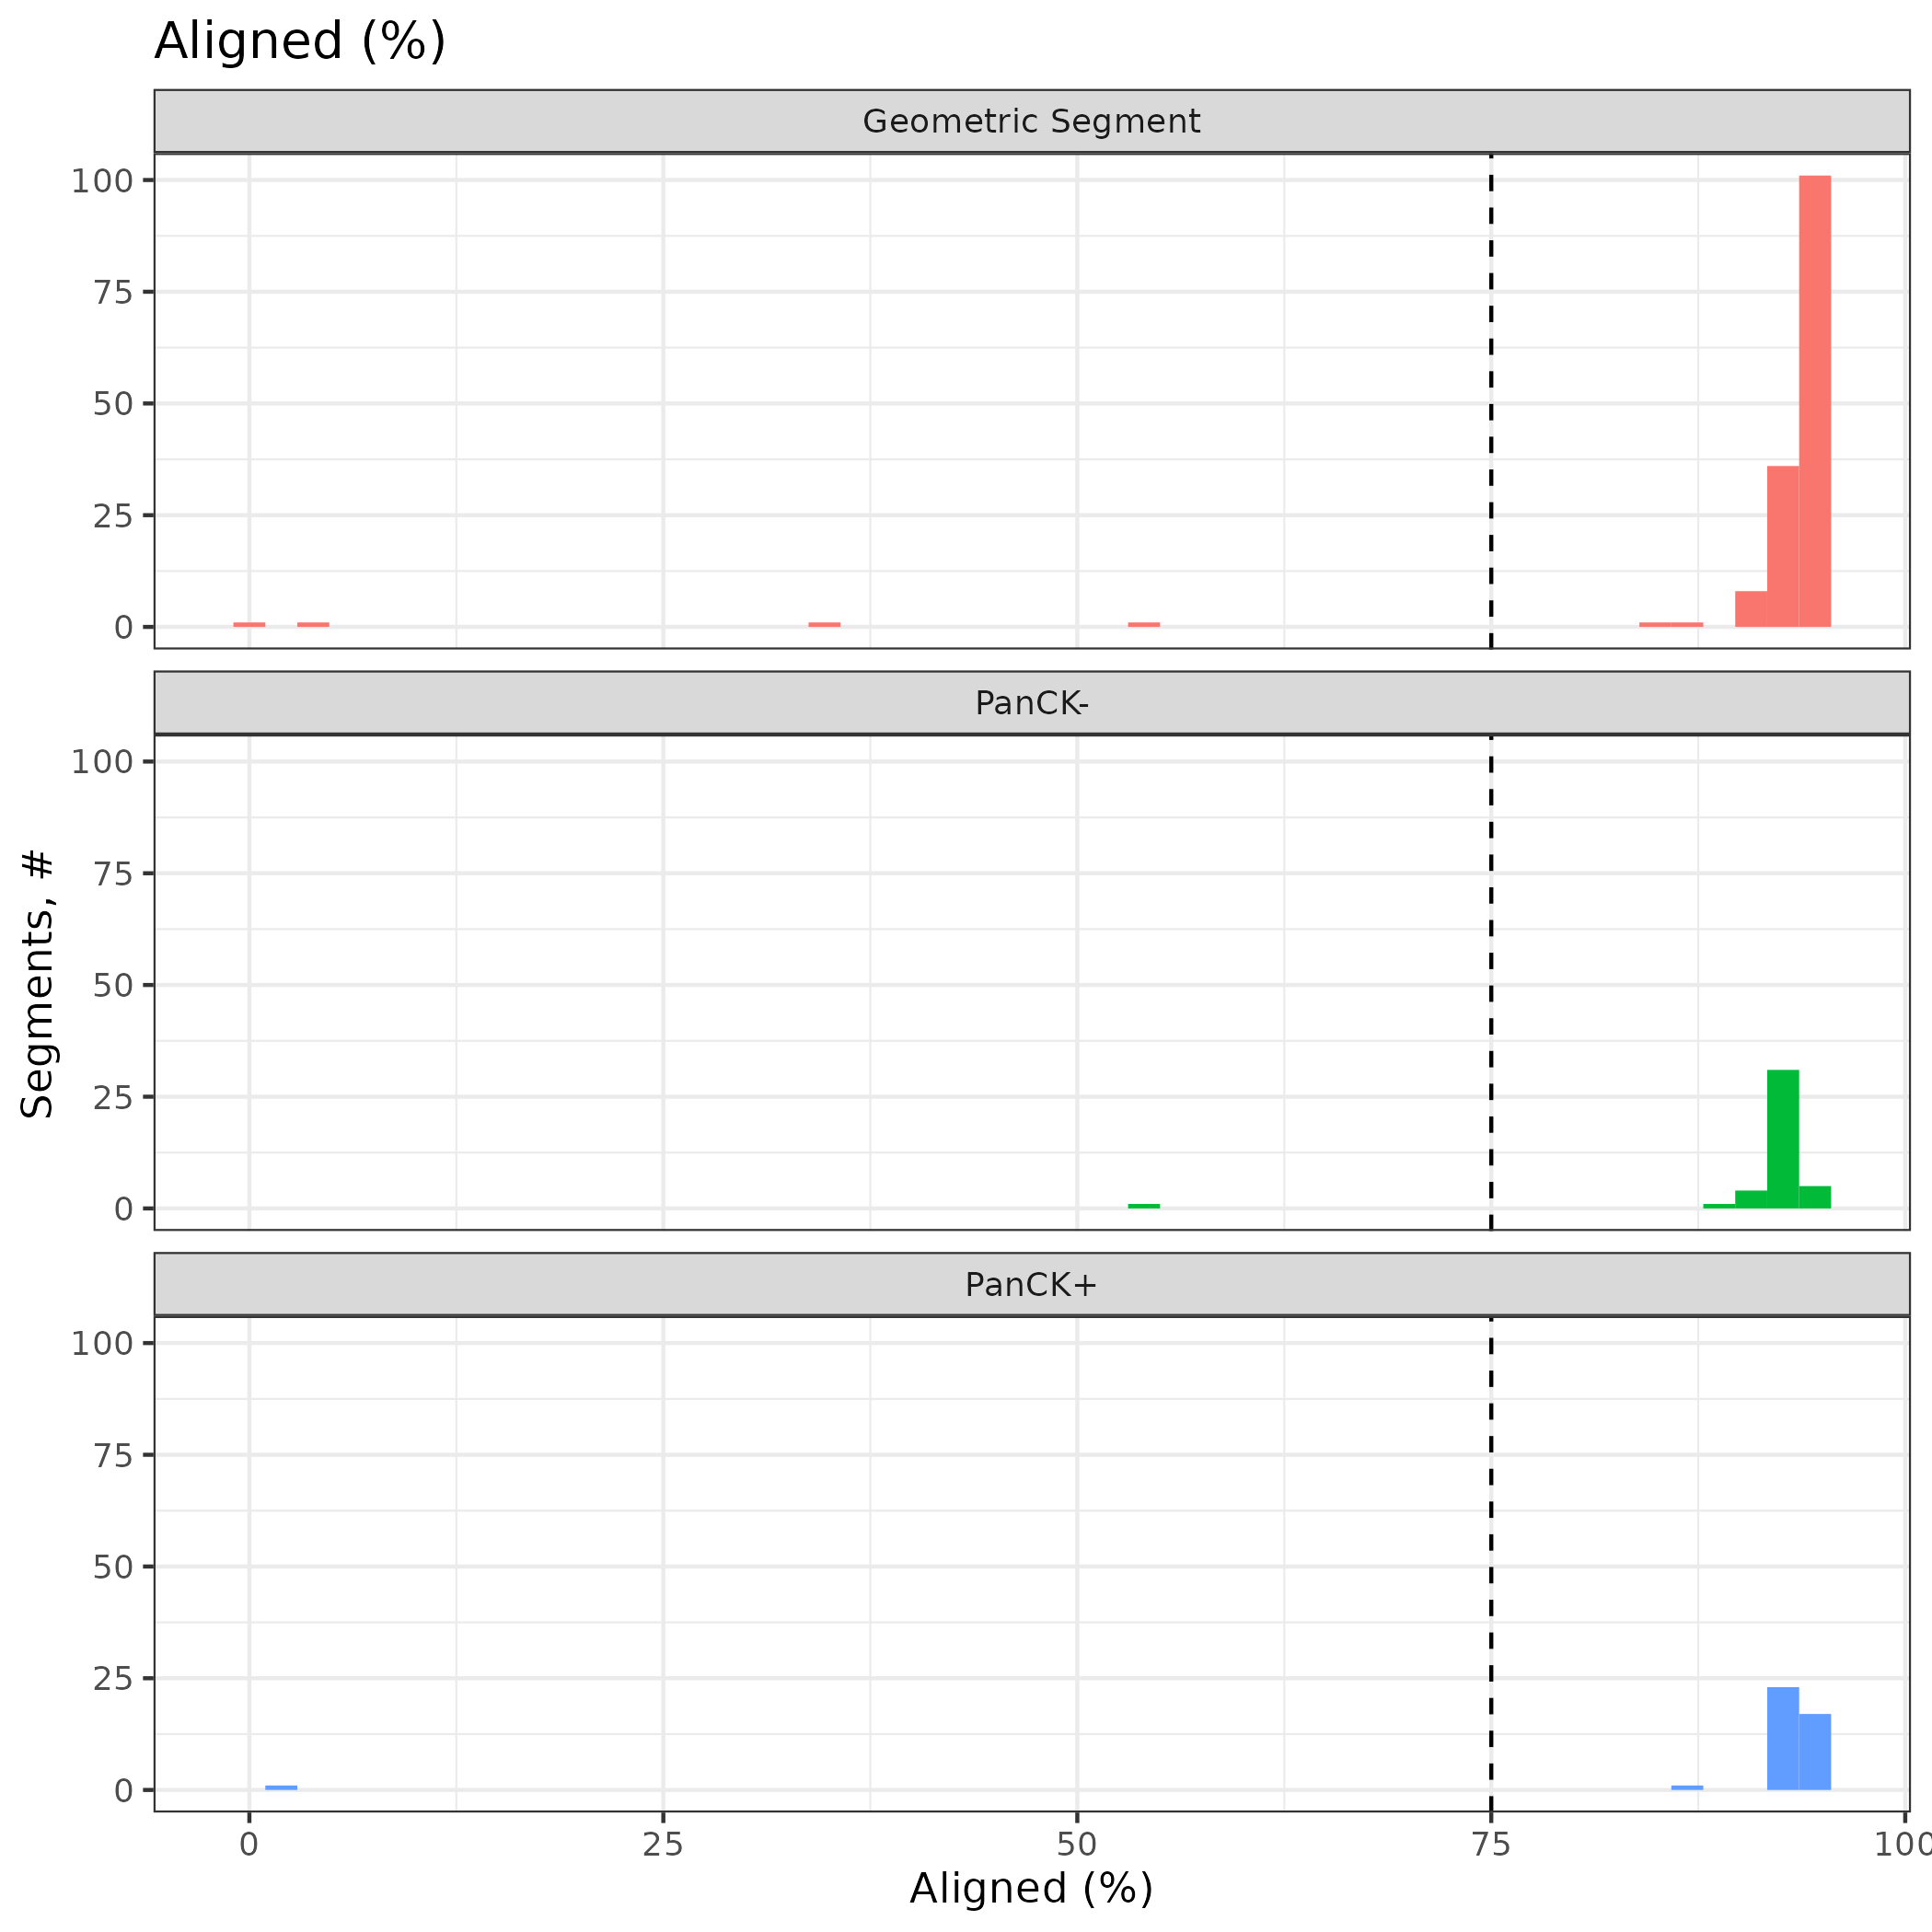
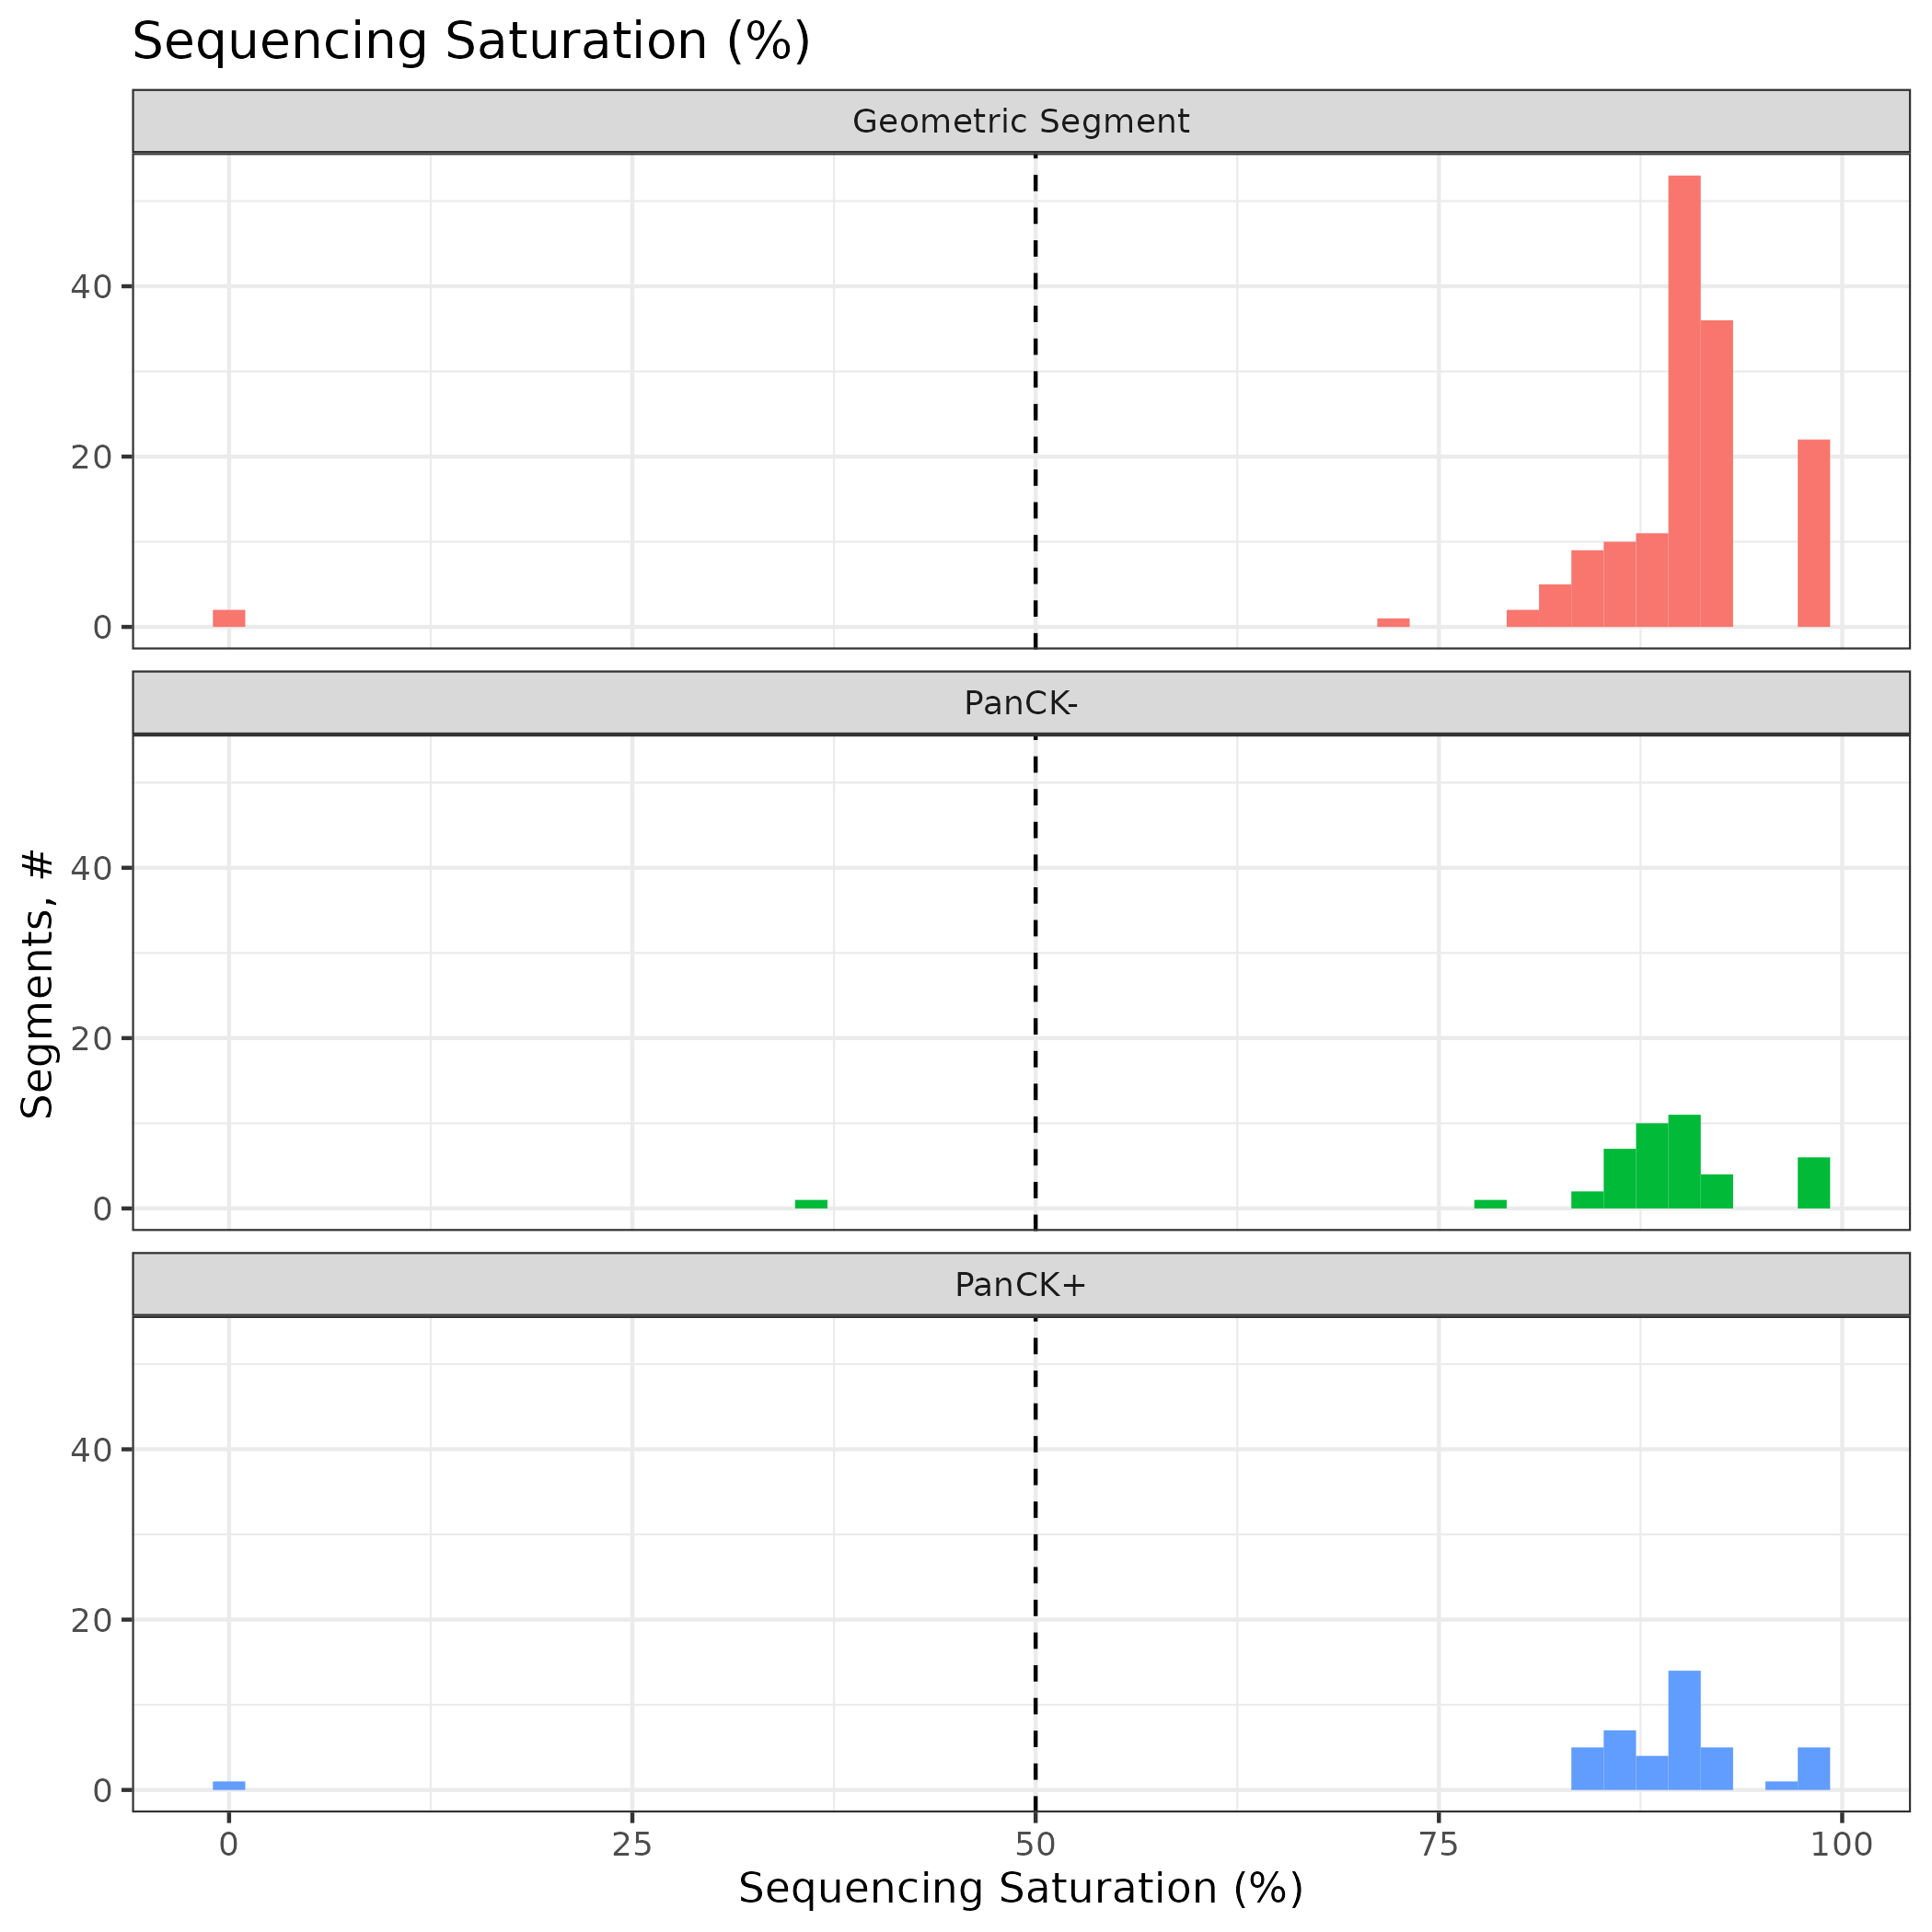
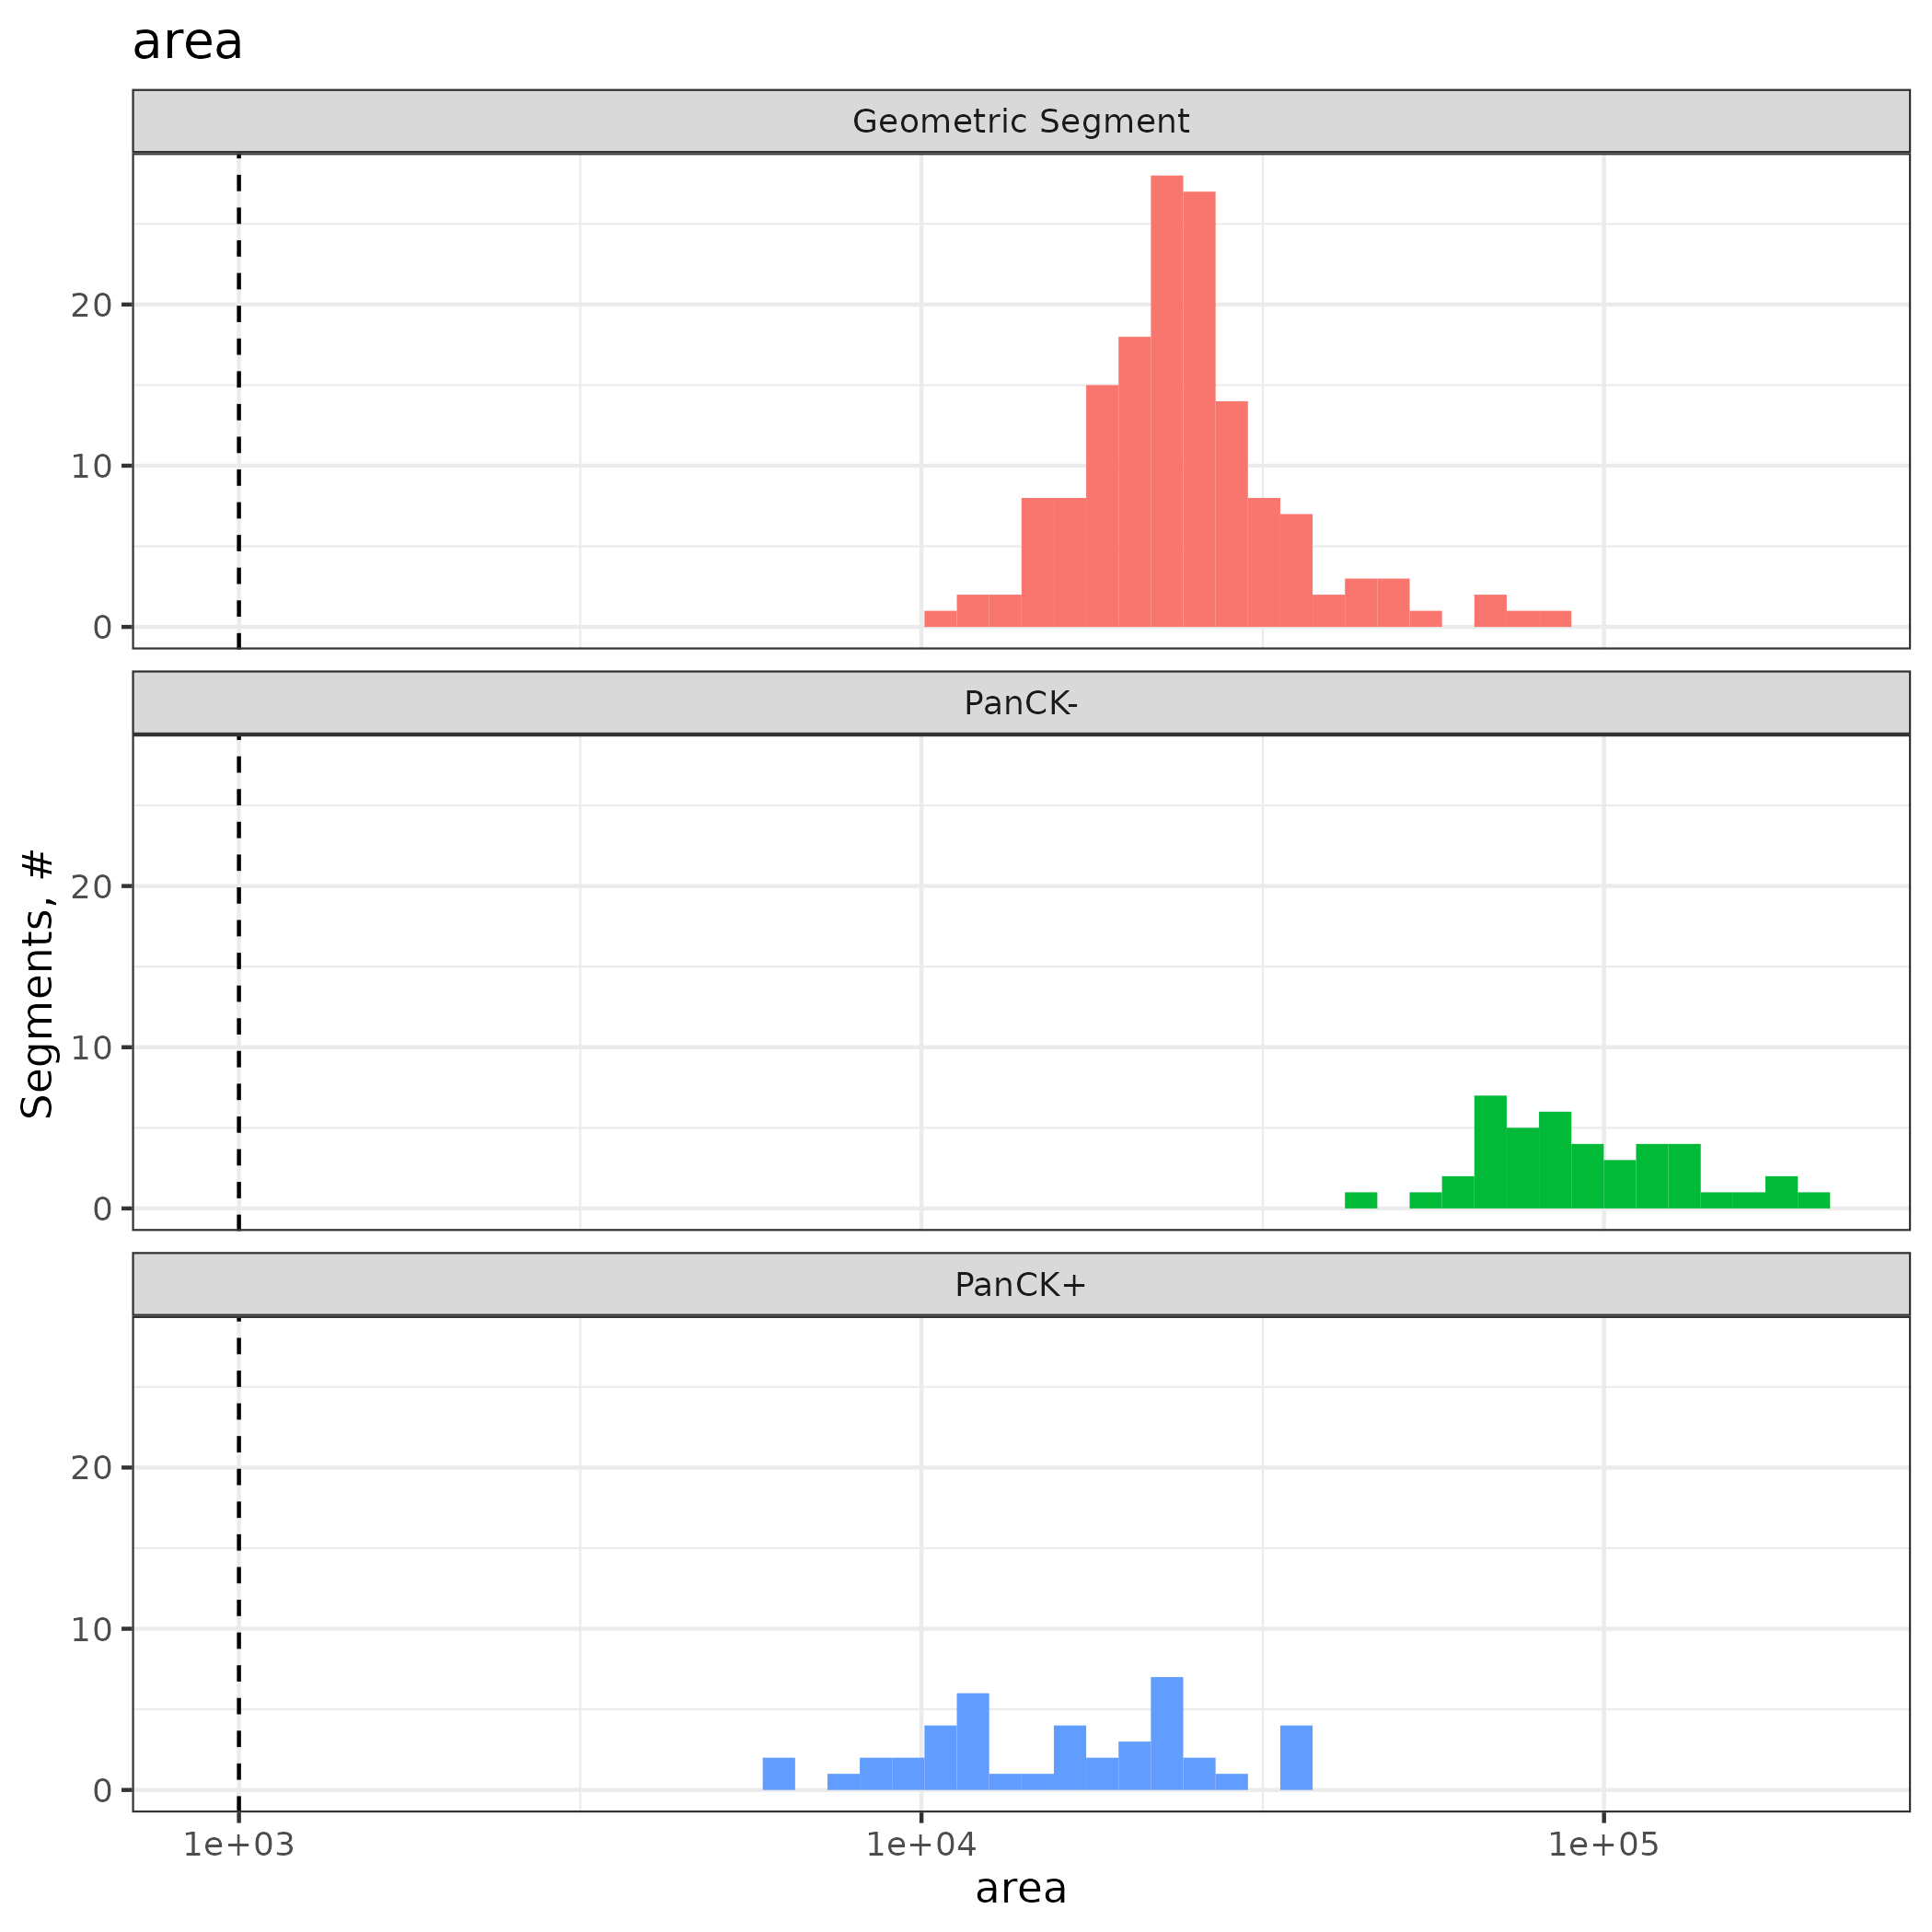
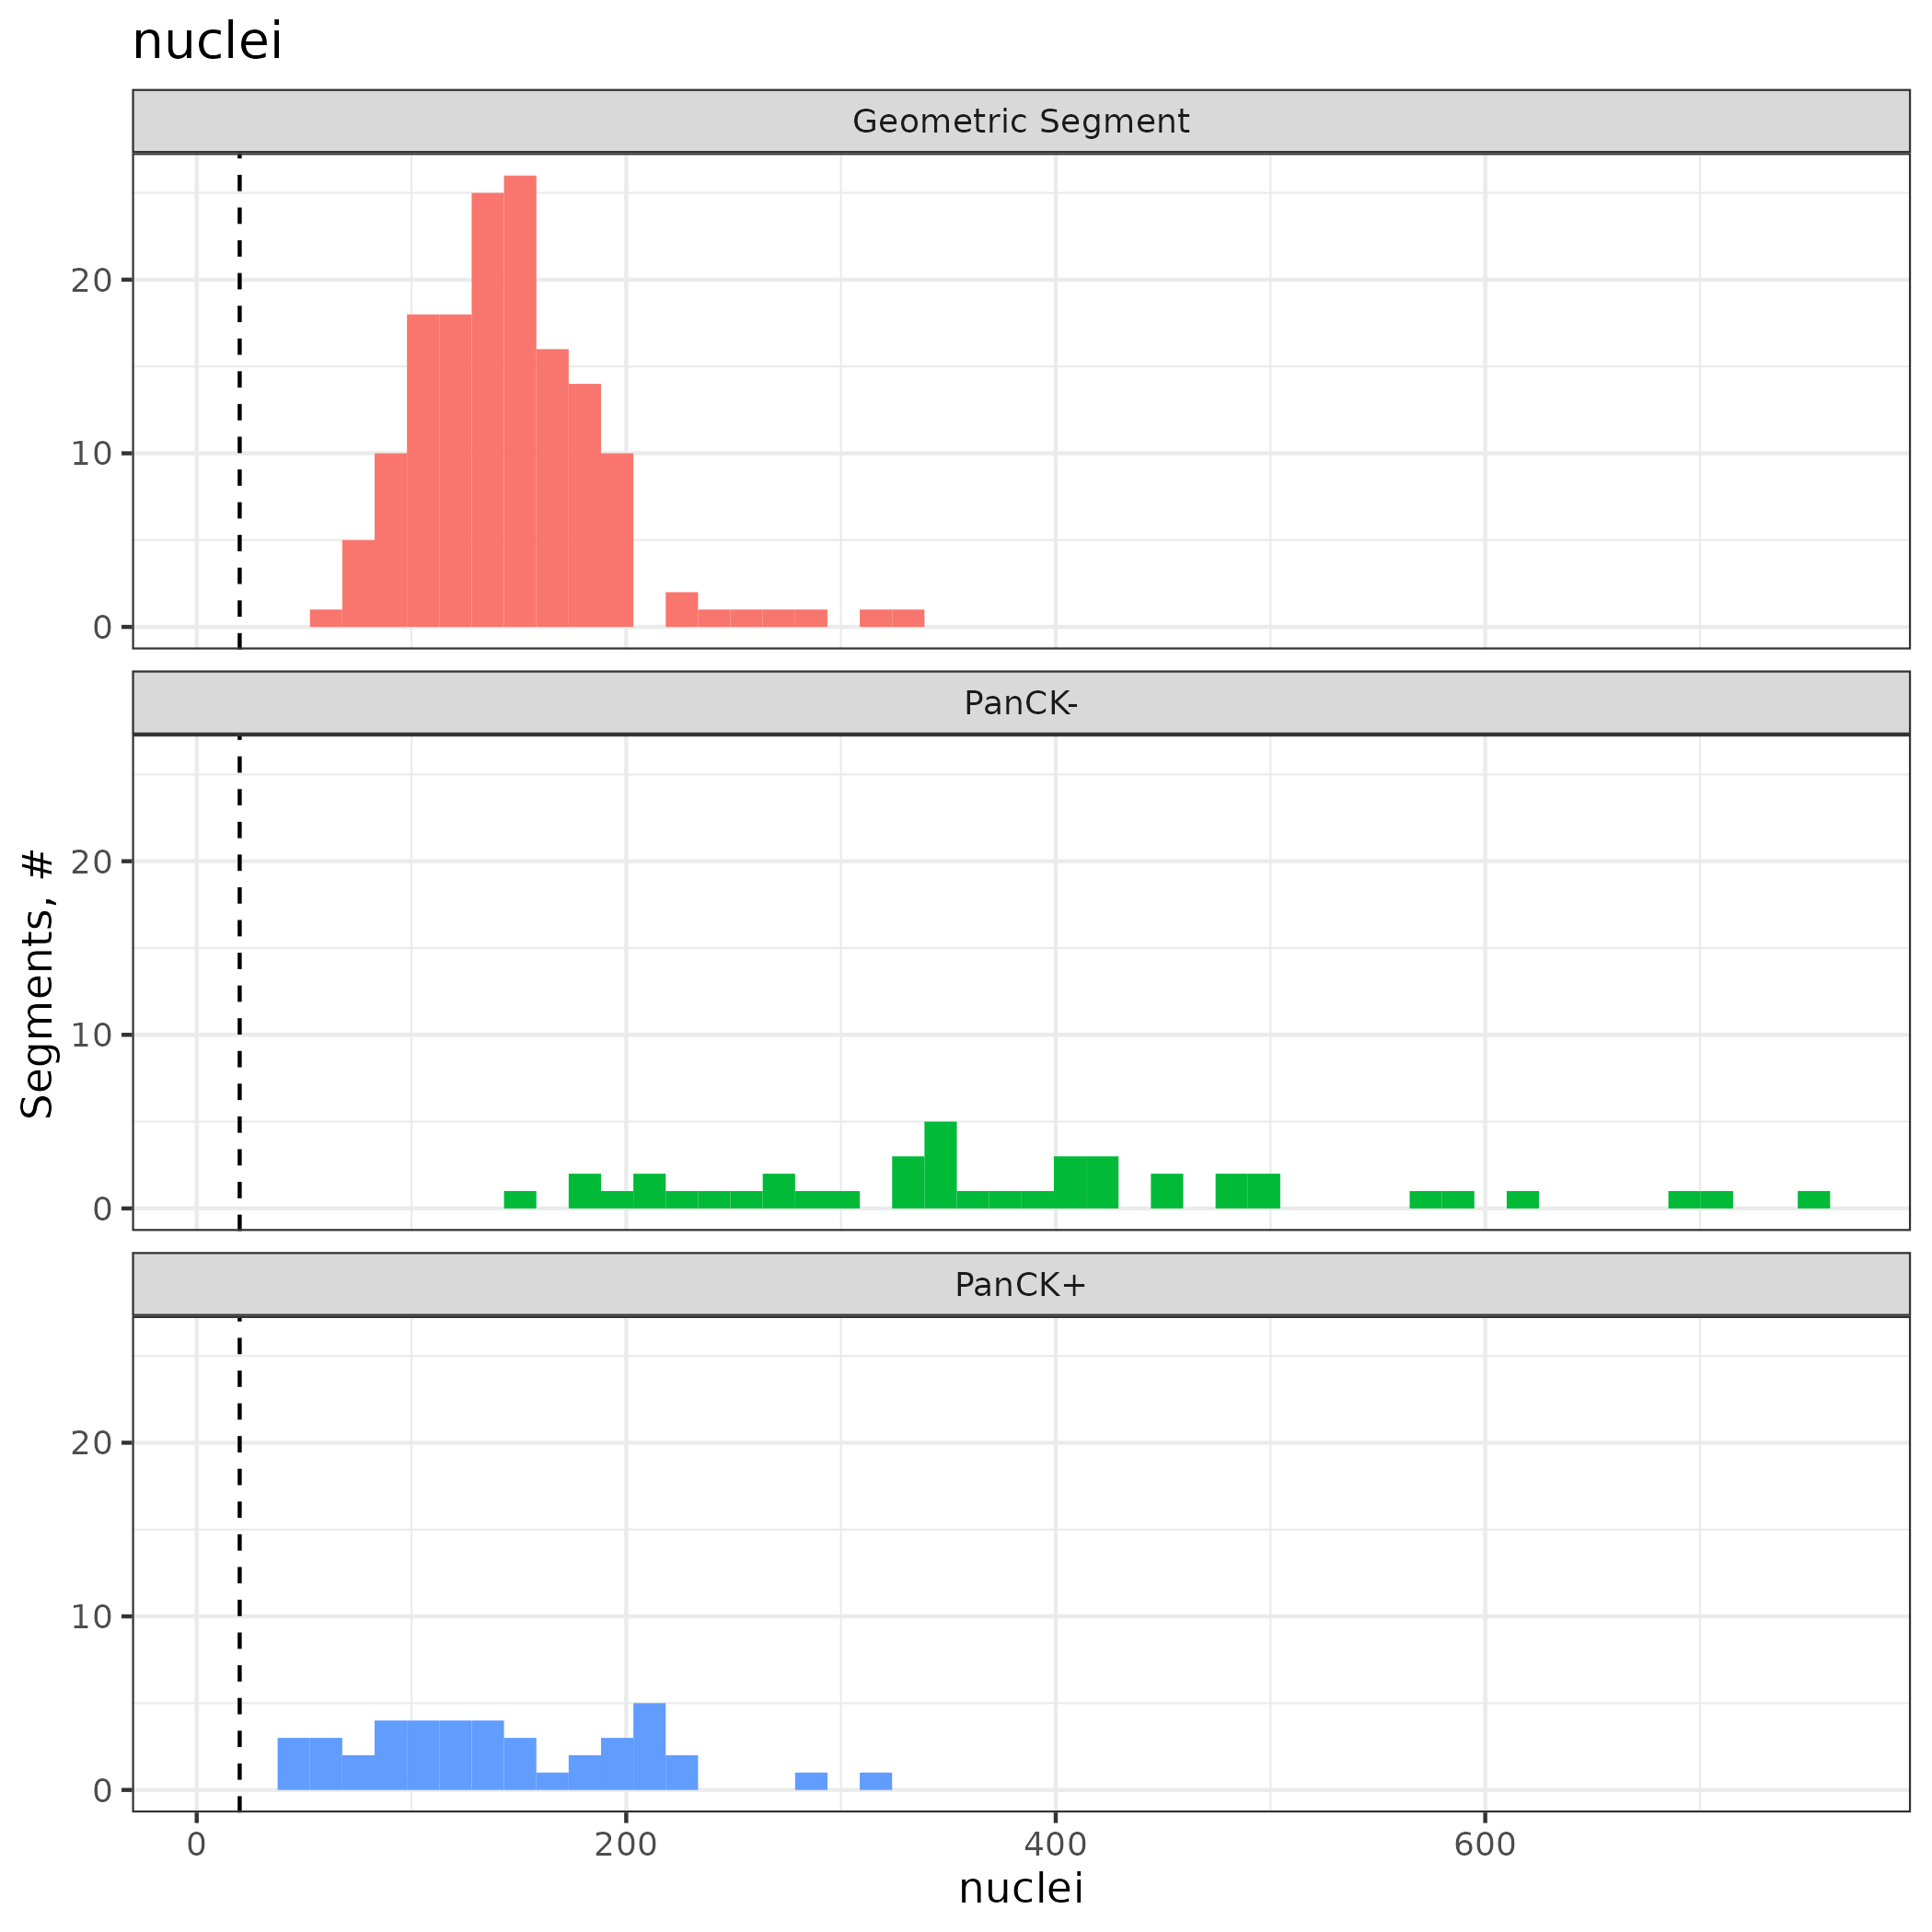
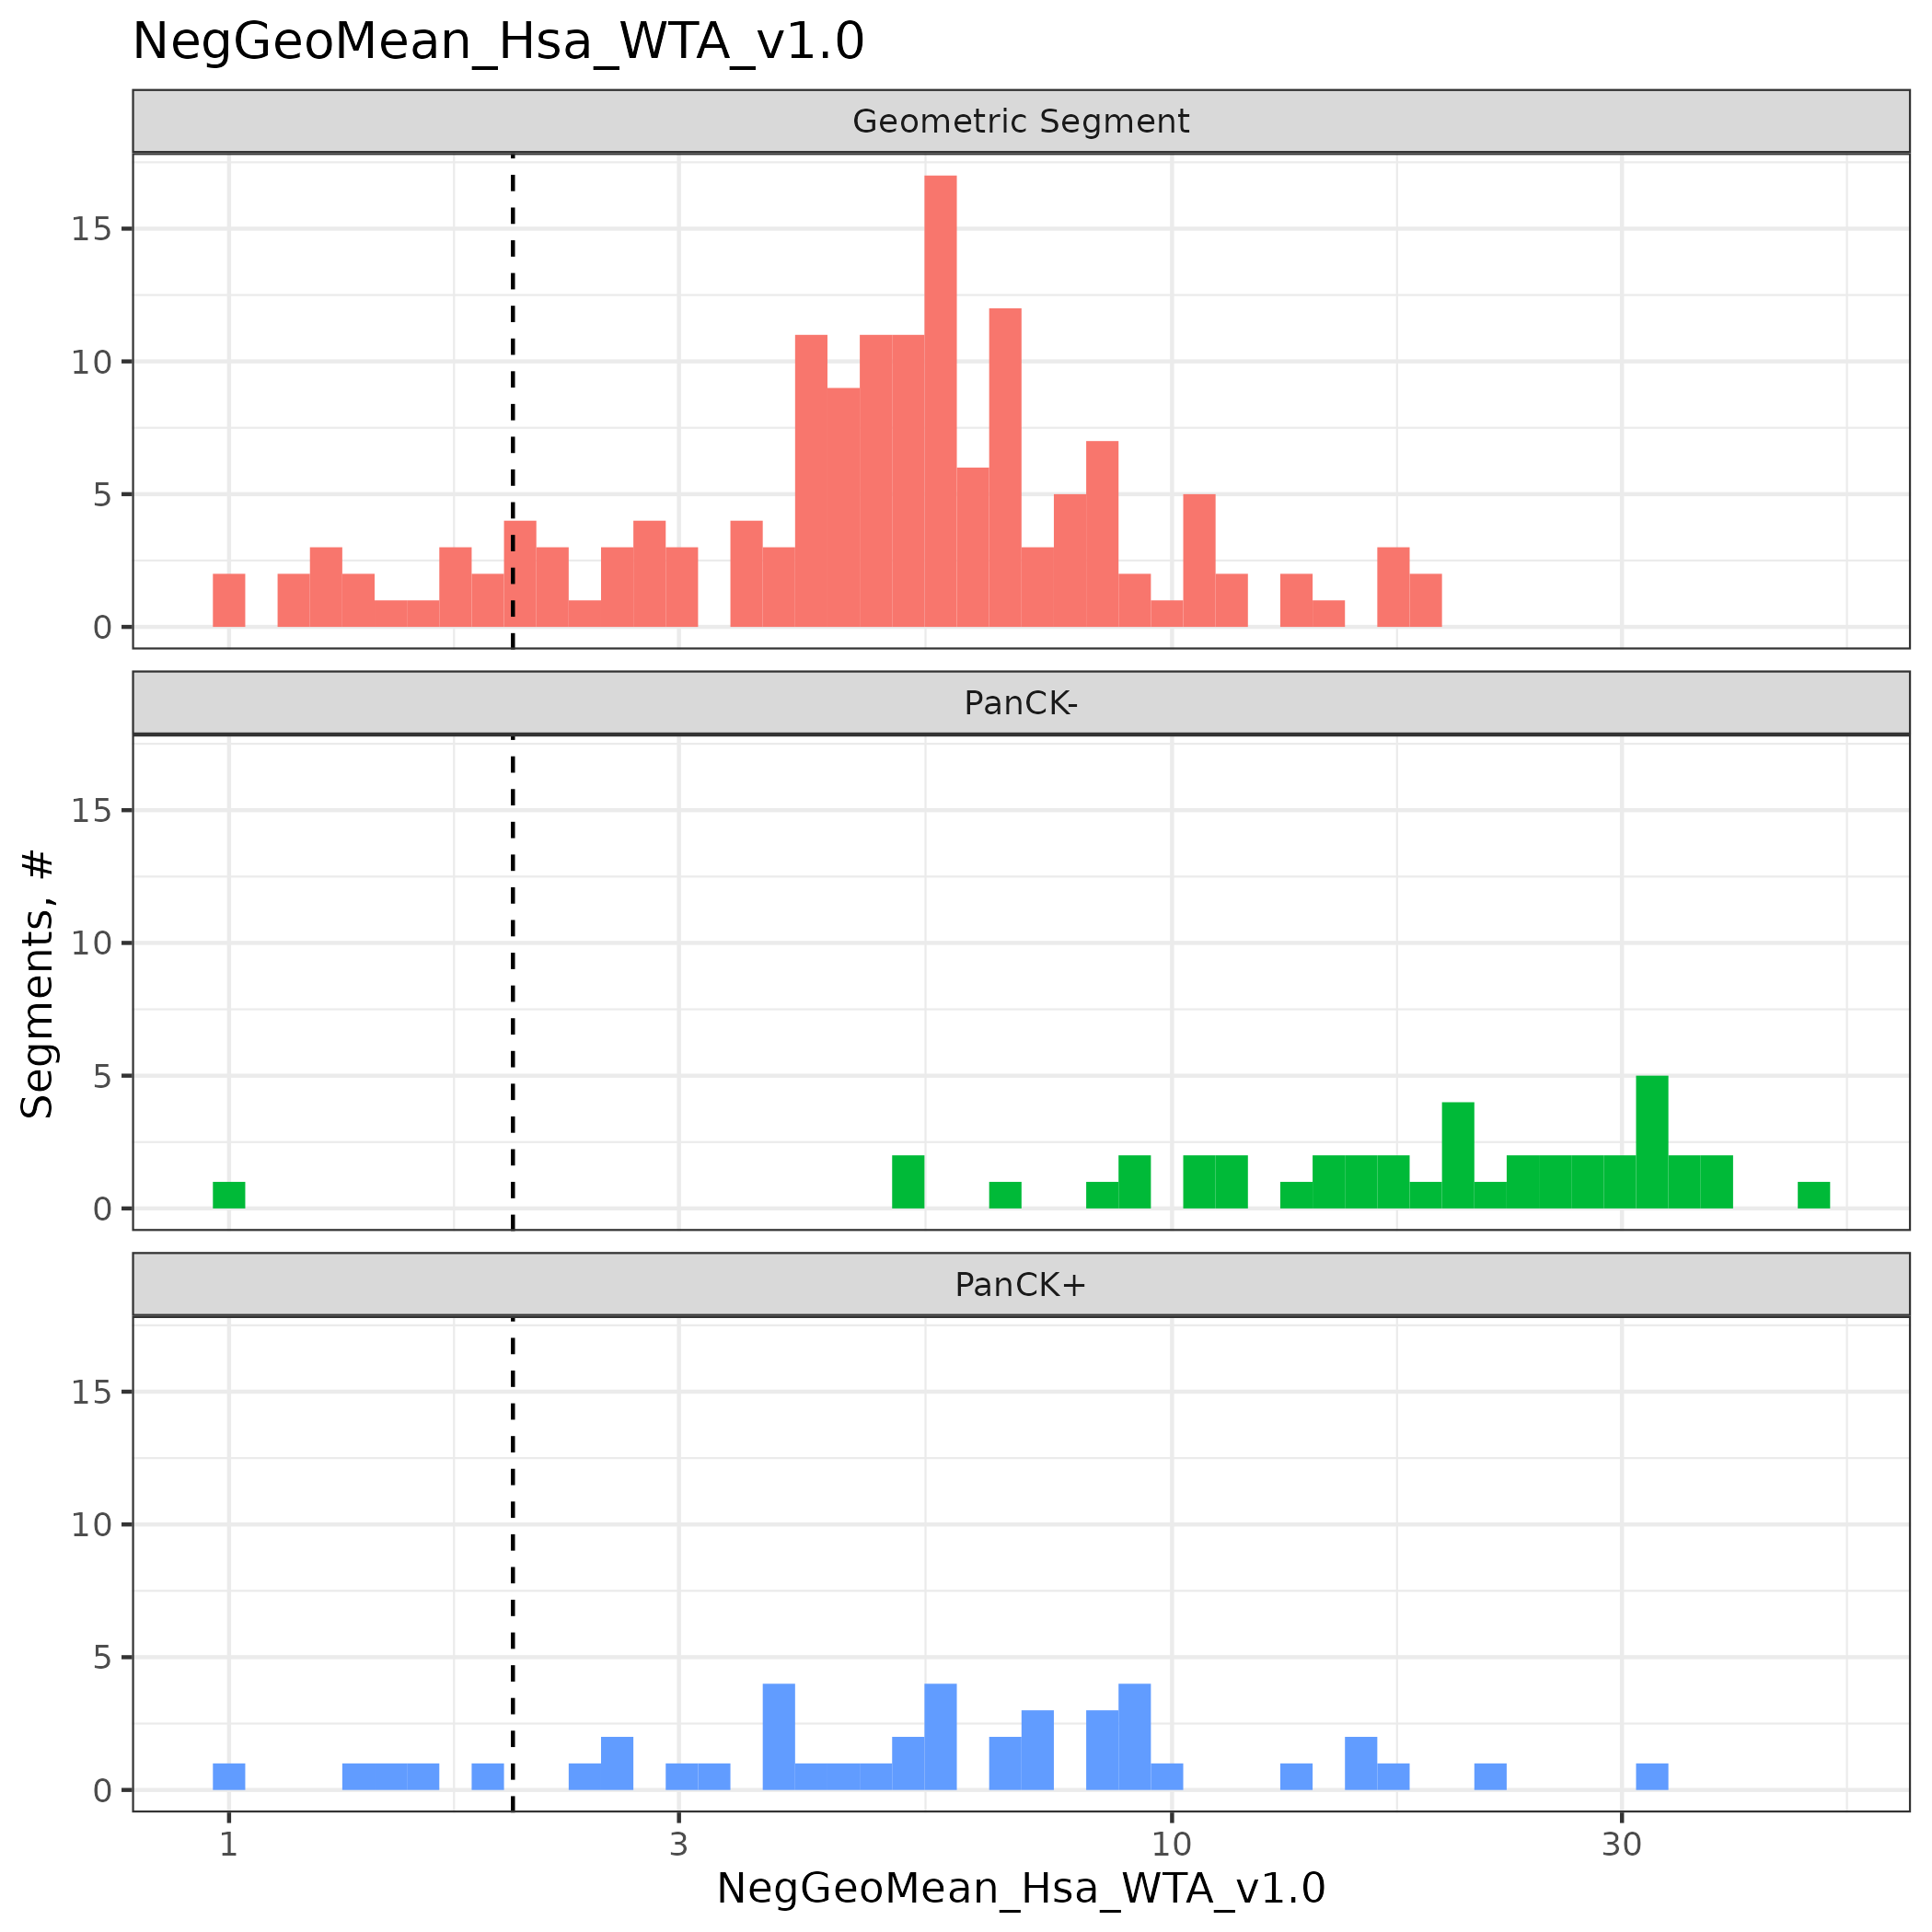

In [146]:
ipyplot.plot_images(histograms, img_width=400, labels=['' for i in histograms])

Number of segments with a given no template control (NTC) count.

In [147]:
pd.read_csv('data/2_1_2_table_ntc_count.csv')

NTC Count  # of Segments
0          3             36
1        113             71
2        397             34
3       8704             94

Quality control summary table for each segment.

In [153]:
pd.read_csv('data/2_1_2_table_qc_summary.csv', index_col=0)

Pass  Warning
LowReads        231        4
LowTrimmed      235        0
LowStitched     235        0
LowAligned      229        6
LowSaturation   231        4
LowNegatives    235        0
HighNTC         235        0
LowNuclei       235        0
LowArea         235        0
TOTAL FLAGS     229        6

Dimensions of the data after performing quality control on the segments.

In [187]:
pd.read_csv('data/2_1_3_dimensions_after_segment_qc.csv', index_col=0)

dim.data.
Features      18642
Samples         229

### 2.2 Probe quality control
Dimensions of the data after removing outlier probes.

In [155]:
pd.read_csv('data/2_2_2_dimensions_after_probe_qc.csv', index_col=0)

dim.ProbeQCPassed.
Features               18641
Samples                  229

### 2.5 Filtering
#### 2.5.1 Segment Gene Detection

The proportion of segments with a given gene detection rate. This is helps to guide how many segments will be filtered out depending on the desired detection rate.

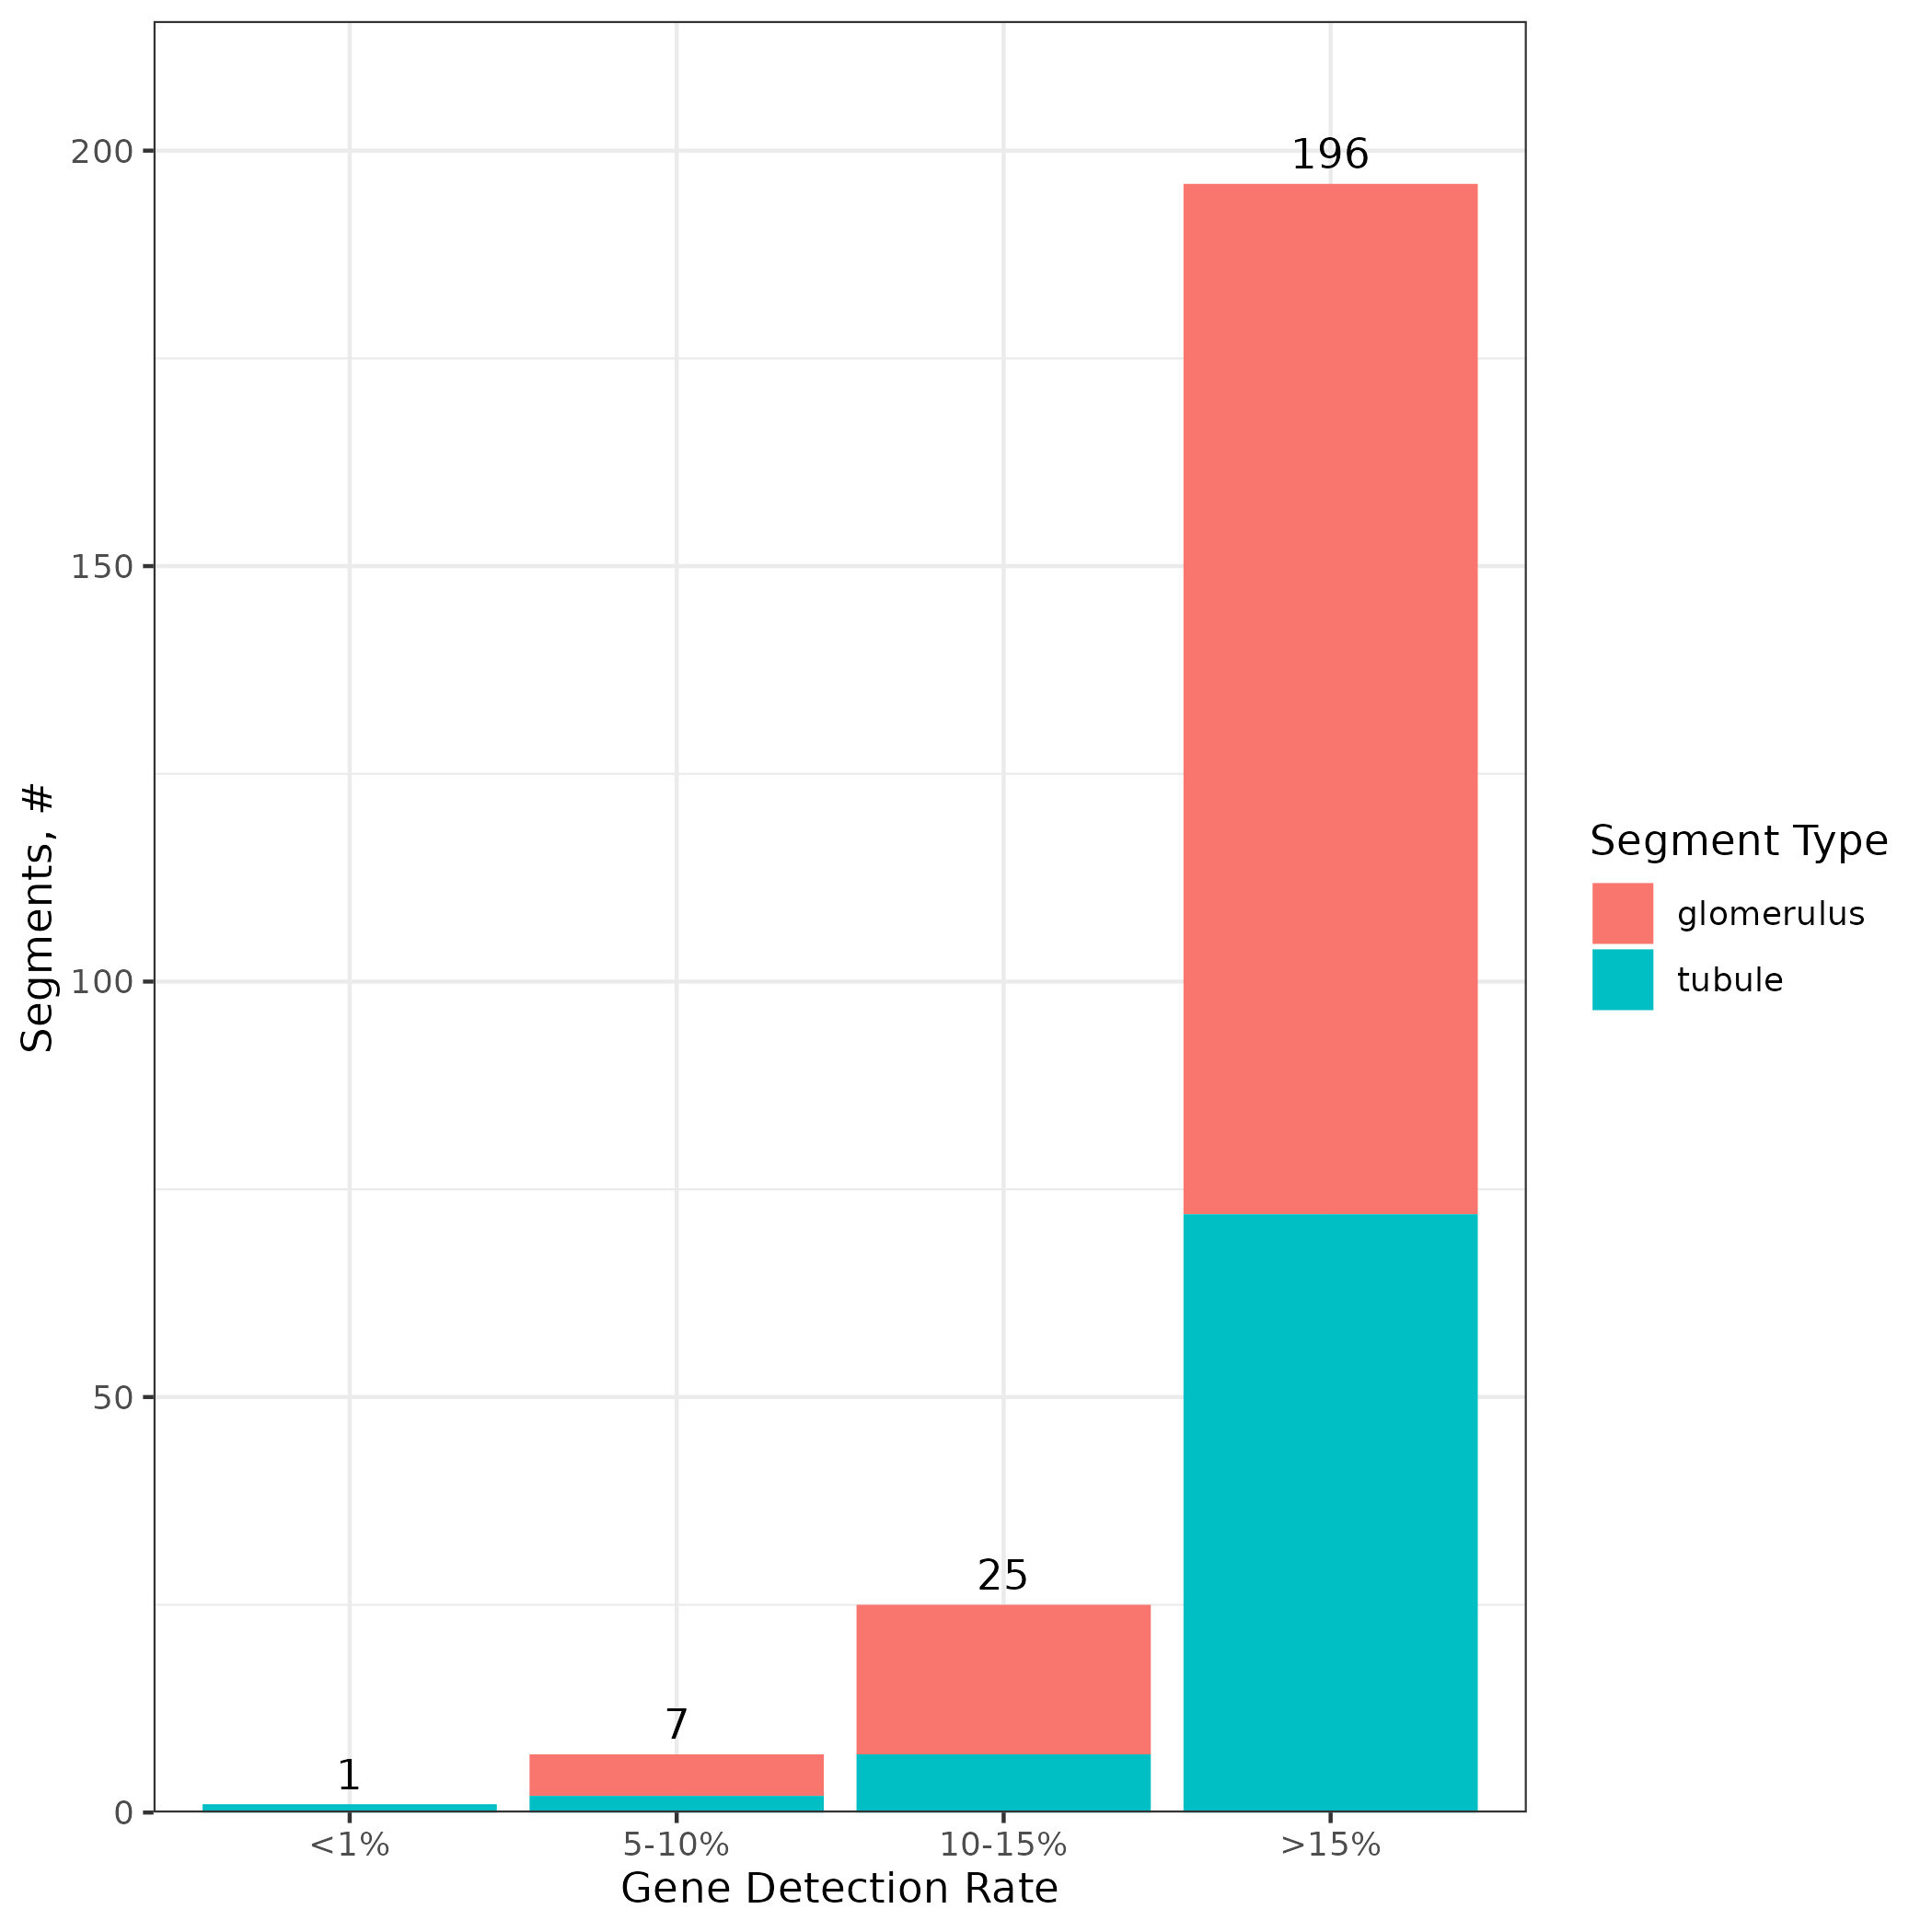

In [156]:
Image(filename='plots/2_5_1_gene_detection_rate_by_segment.png', width=500)

Same information as the plot above, but in tabular format.

In [157]:
pd.read_csv('data/2_5_1_table_gene_detection_rate_by_kidney_tissue_type.csv')

Gene detection rate  DKD  normal
0                 <1%    0       1
1                1-5%    0       0
2               5-10%    6       1
3              10-15%   21       4
4                >15%  102      94

Dimensions of the data after filtering out segments with too low of a gene detection rate.

In [161]:
pd.read_csv('data/2_5_1_dimensions_target_data_after_gene_detection_rate_filter.csv', index_col=0)

dim.target_data.
Features             18504
Samples                221

Replot the Sankey diagram after filtering for segments flagged by Segment QC and those with low gene detection rates.

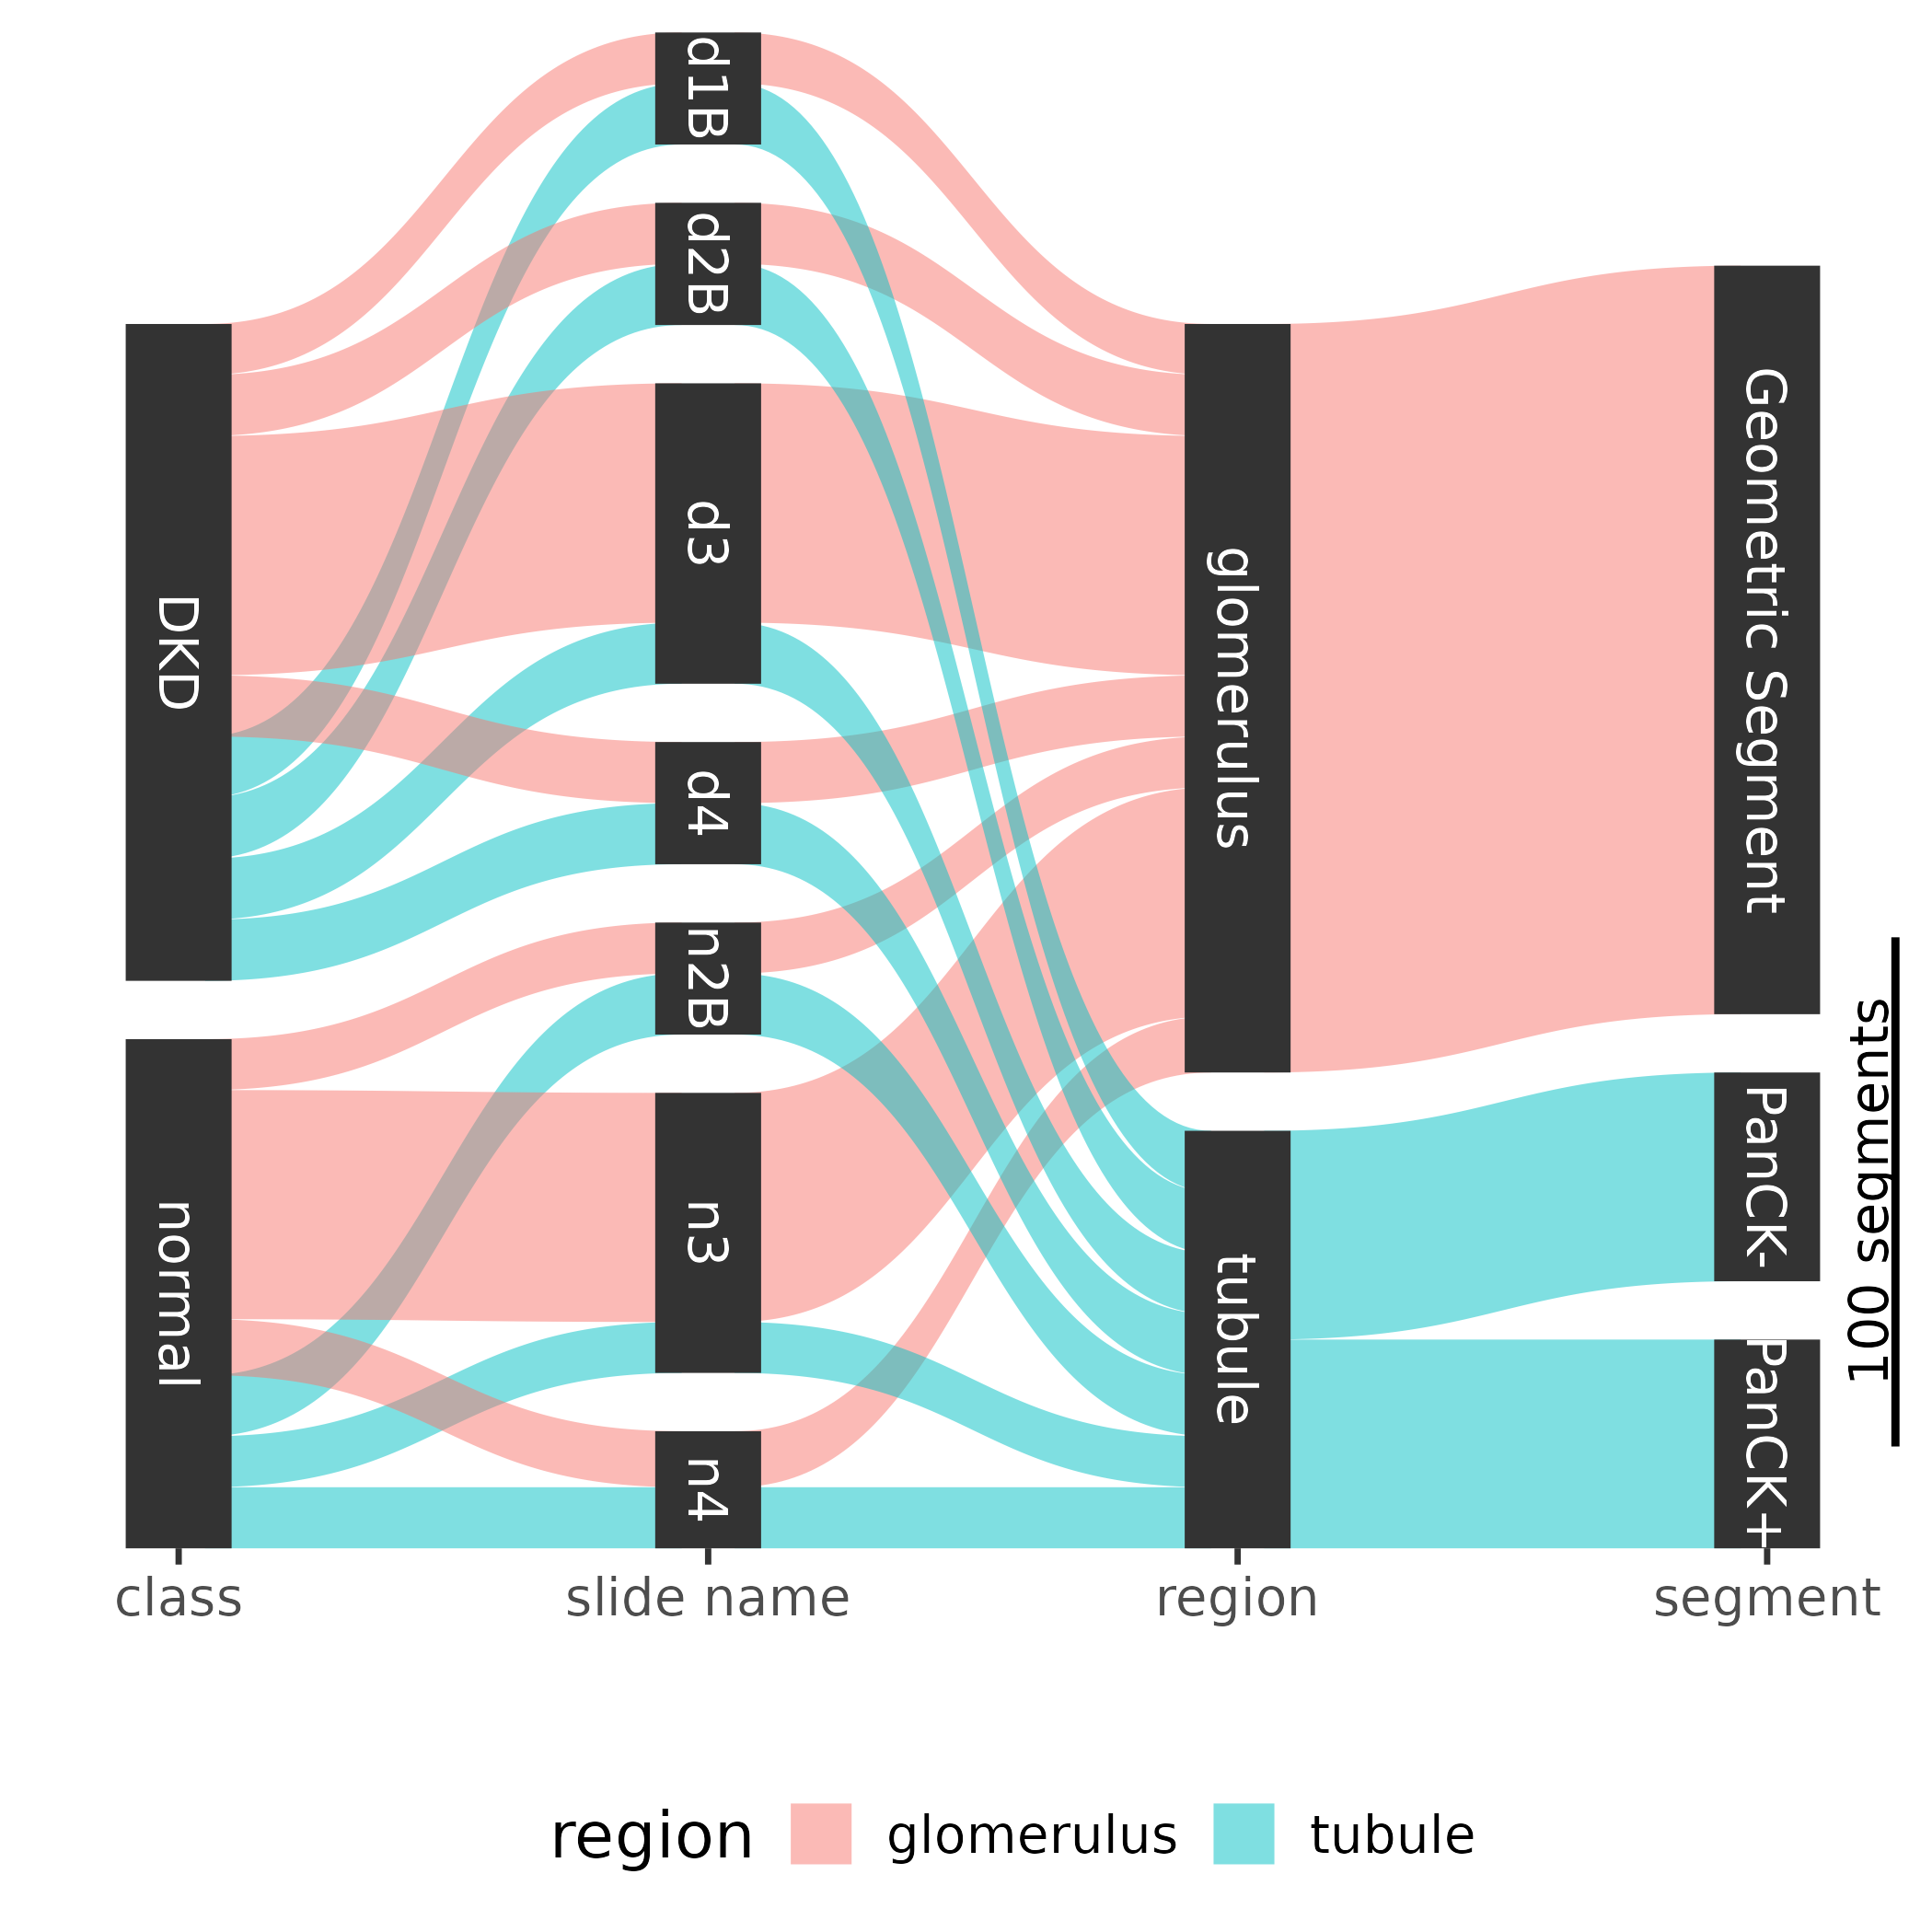

In [162]:
Image(filename='plots/2_5_1_sample_overview_sankey_after_gene_detection_rate_filter.png', width=500)

#### 2.5.2 Gene detection rate
Compare the gene detection rate for genes of interest.

In [165]:
pd.read_csv('data/2_5_2_detection_rate_for_genes_of_interest.csv')

Gene  Number DetectionRate
0   PDCD1       1          0.5%
1   CD274      75         33.9%
2    IFNG       9          4.1%
3    CD8A      33         14.9%
4    CD68     160         72.4%
5   EPCAM      64         29.0%
6   KRT18     217         98.2%
7   NPHS1     142         64.3%
8   NPHS2     142         64.3%
9   CALB1      41         18.6%
10  CLDN8      47         21.3%

#### 2.5.3 Gene Filtering

Number of genes detected in different percentages of segments. This helps to understand how many low-detected genes will be filtered out of the dataset. Gene filtering increases performance of downstream statistical tests and improves interpretation of true biological signal.

Typically, the cutoff range is form 5-20%, but this can be lowered if a key gene is represented in only a small number of segments due to biological diversity.

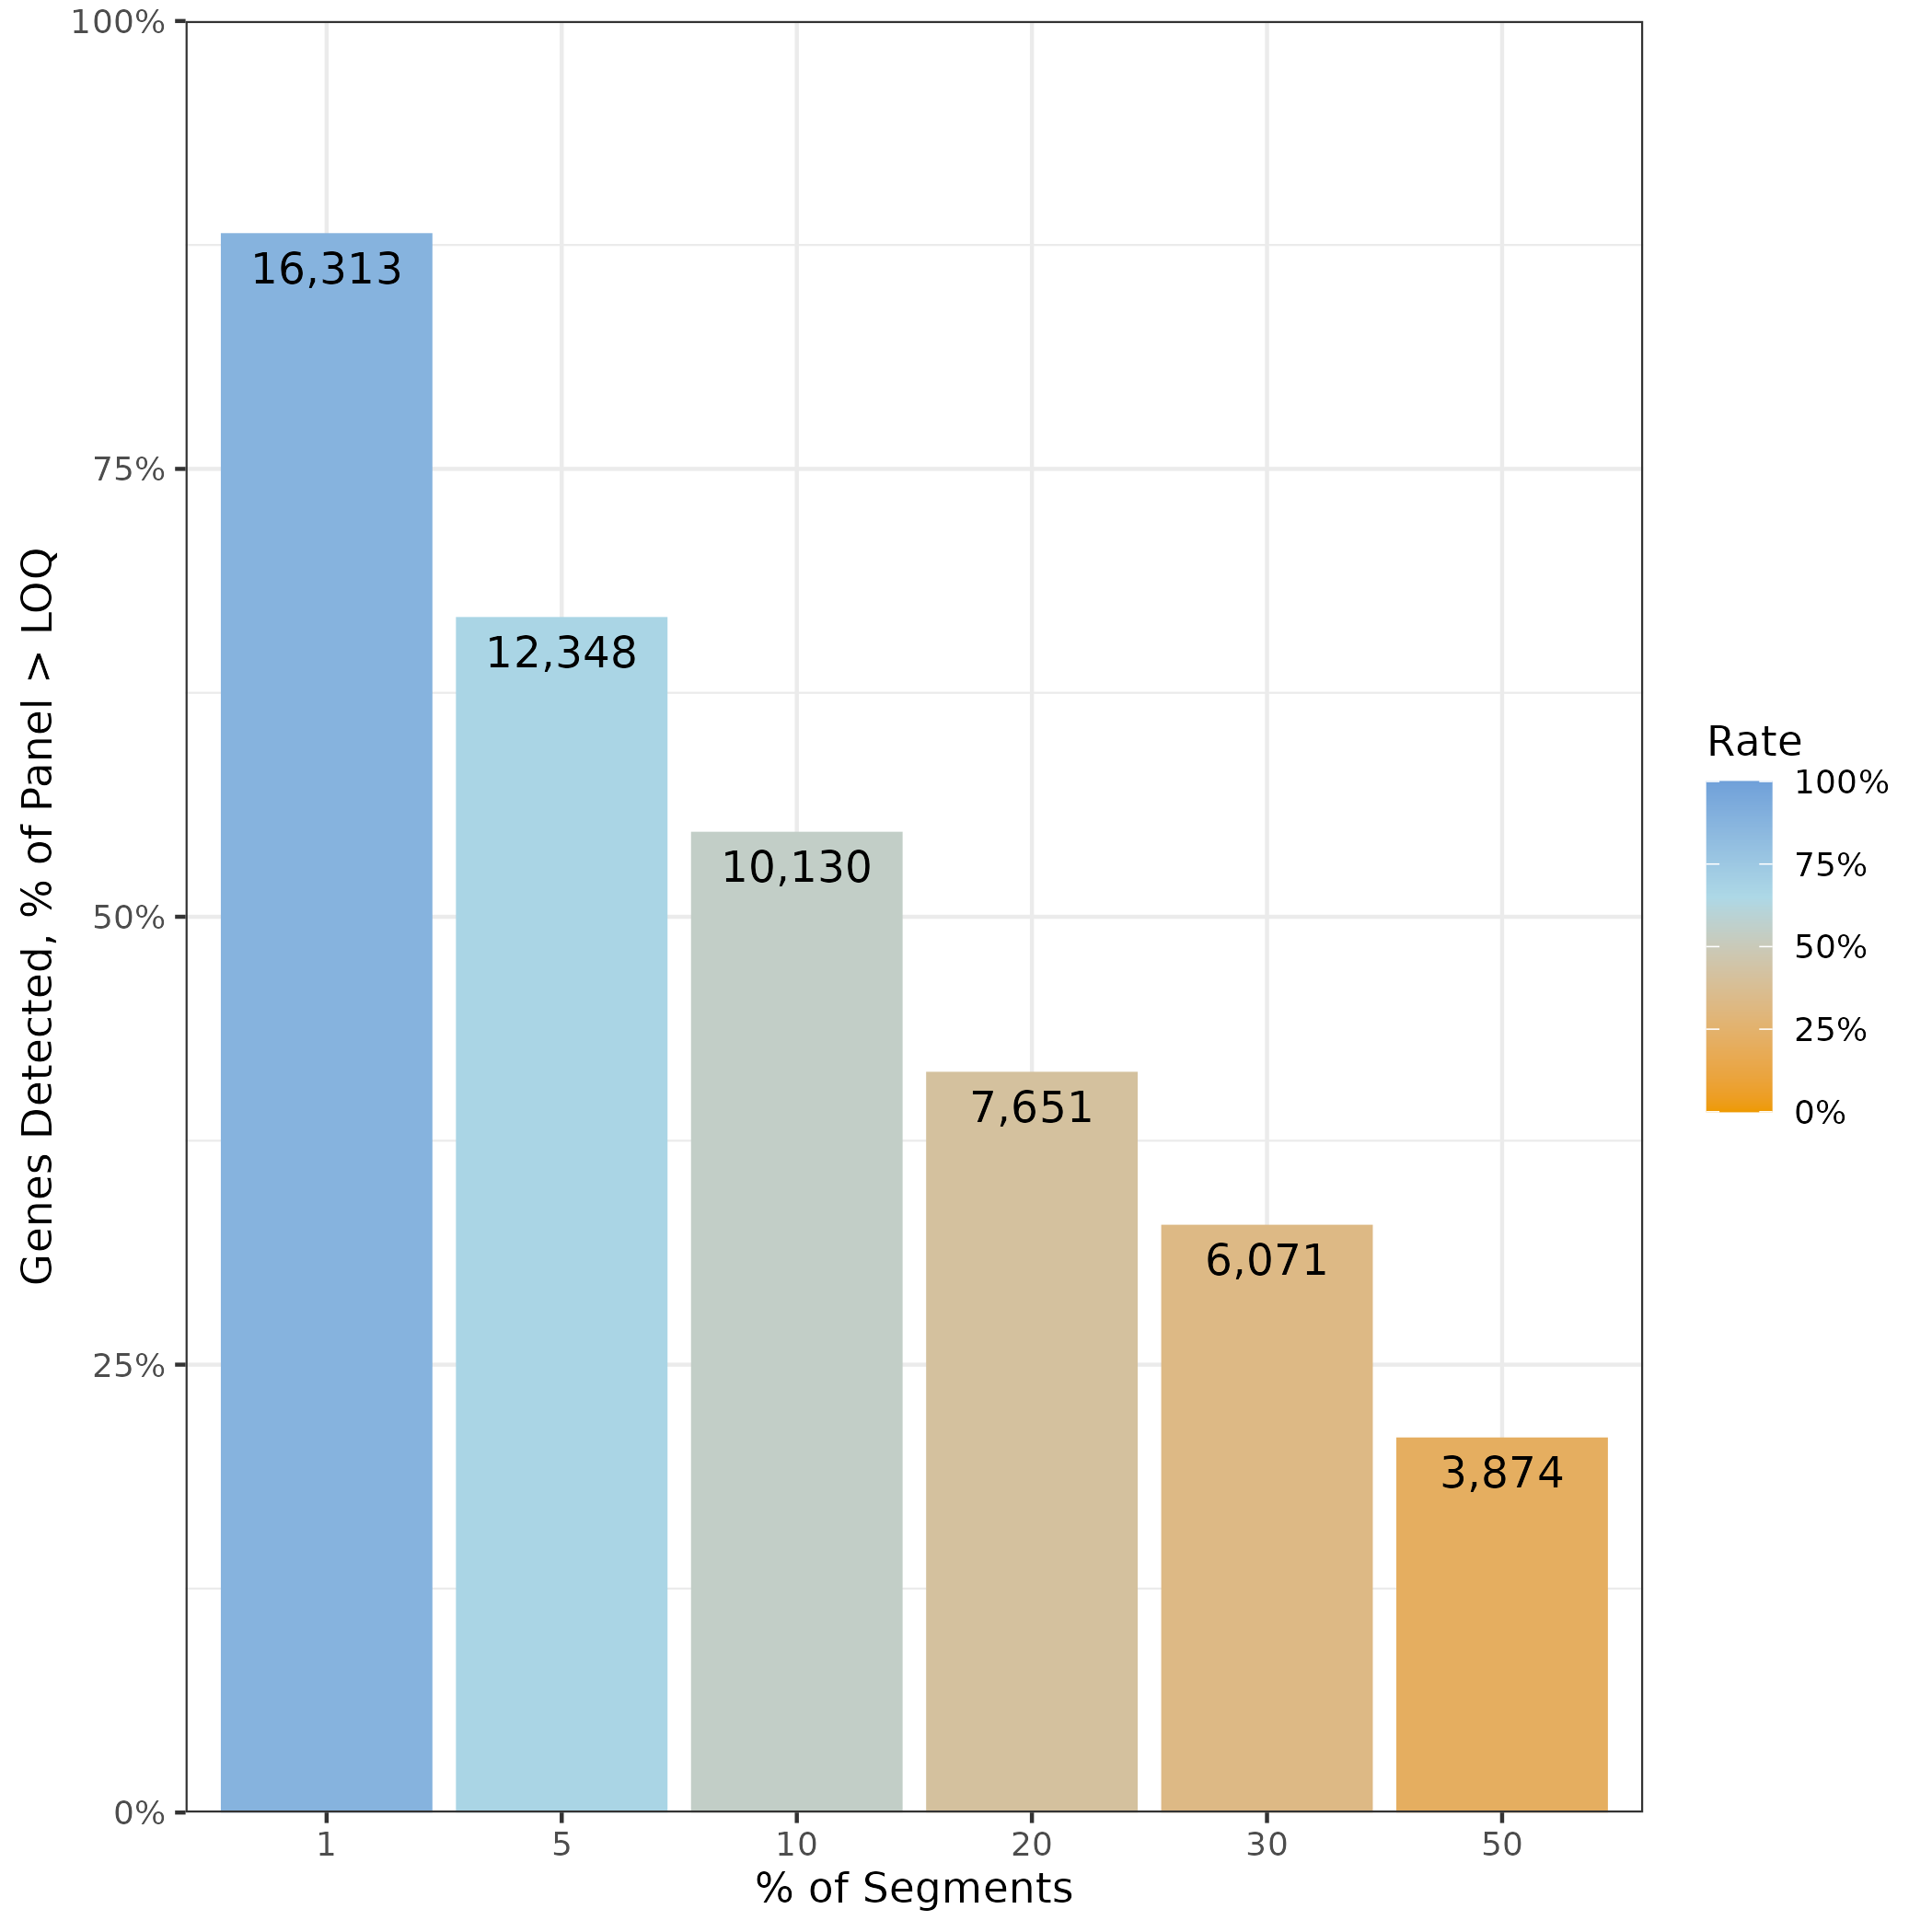

In [166]:
Image(filename='plots/2_5_3_genes_detected_per_percentage_of_segments.png', width=500)

Dimensions of the data after filtering out genes that were detected in too few segments.

In [168]:
pd.read_csv('data/2_5_3_dimensions_target_data_after_gene_detection_filter.csv', index_col=0)

dim.target_data.
Features             10131
Samples                221

## 3 Normalization

Before normalising the data, plot the relationship between the upper quartile (Q3) of the counts in each segment with the geometric mean of the negative control probes. There should be a separation between these two clusters to ensure there is a stable measure of Q3 signal. If there is not sufficient separation between these clusters, consider more aggressive filtering of low signal segments/genes.

**A:** Distribution of Q3 and negative probe counts

**B:** Scatter plot of Q3 and negative probe counts per segment

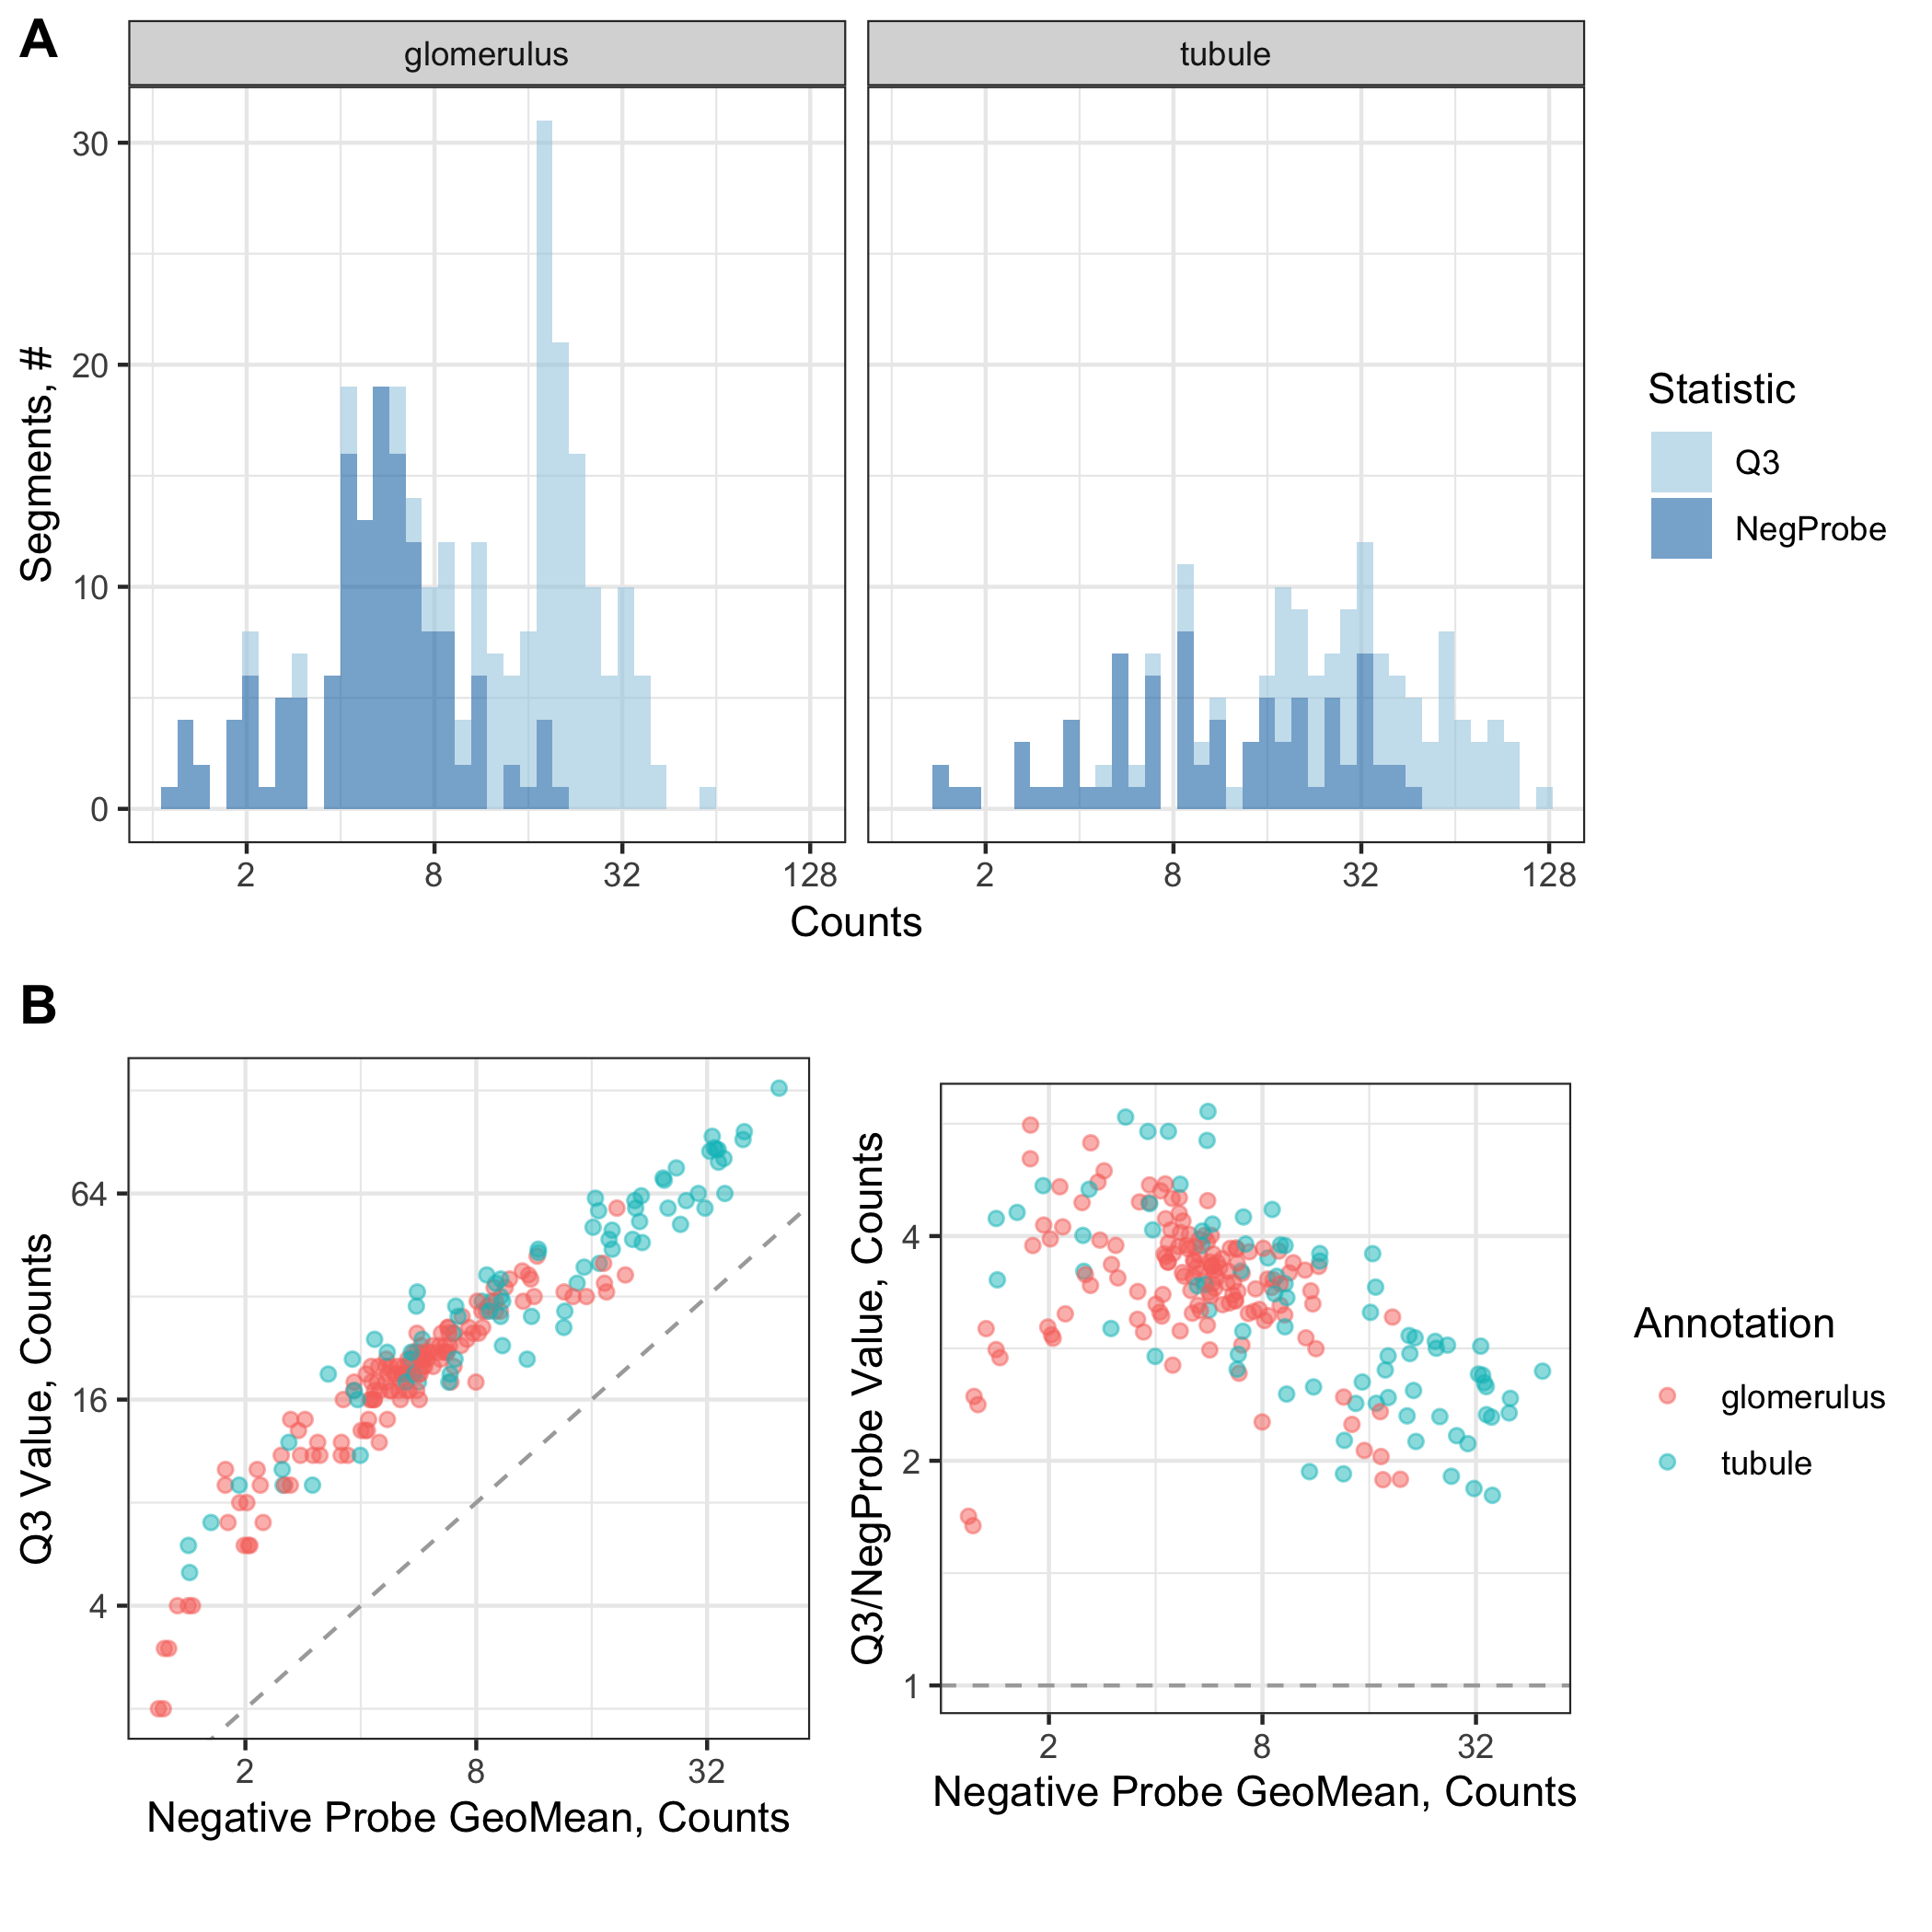

In [189]:
Image(filename='plots/3_q3_values_vs_neg_geo_mean_of_neg_probes.png', width=600)

After normalising the data using Q3 normalisation, plot representative box plots of the data for individual segments before and after normalization.

In [170]:
counts_raw = mpimg.imread('plots/3_segment_counts_raw.png')
counts_normalised = mpimg.imread('plots/3_segment_counts_normalised.png')
counts_neg_norm = mpimg.imread('plots/3_segment_counts_neg_norm.png')

boxplots = [counts_raw, counts_normalised, counts_neg_norm]


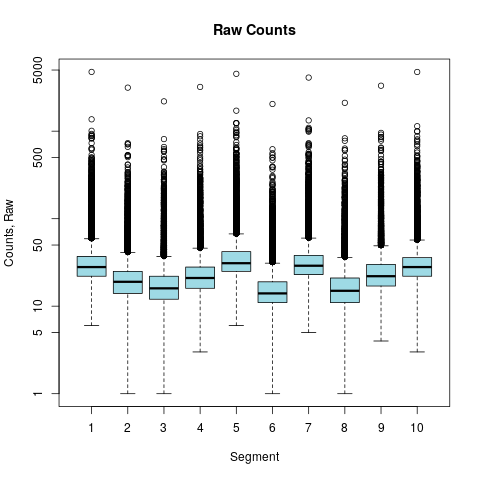
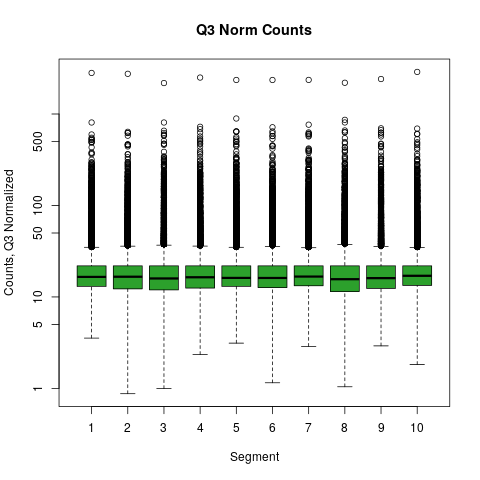
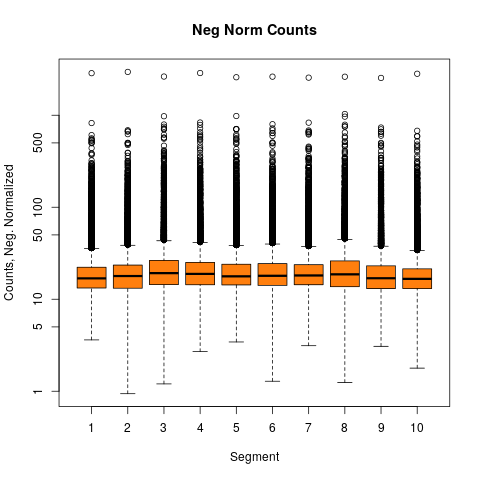


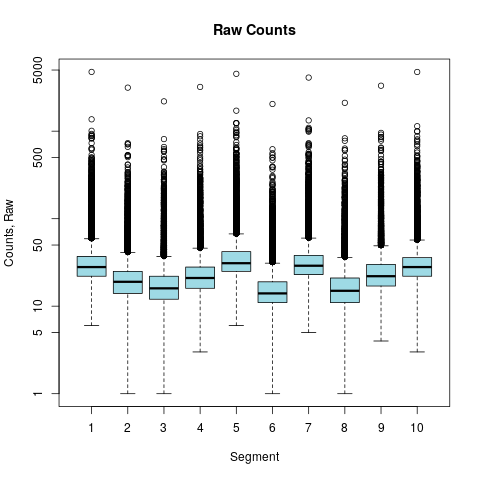
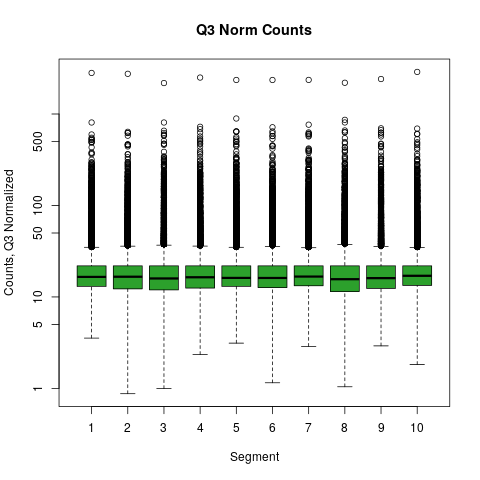
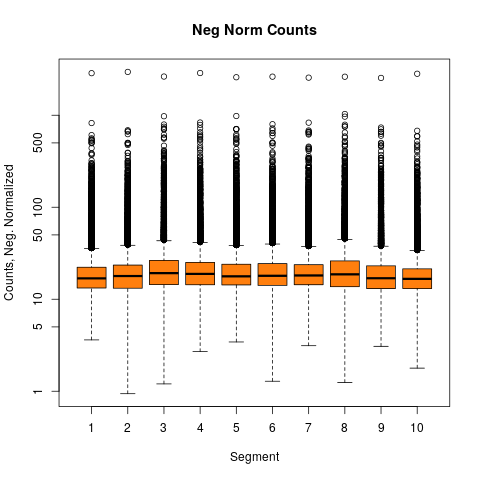

In [171]:
ipyplot.plot_images(boxplots, img_width=315, labels=['' for i in boxplots])

## 4 Unsupervised Analysis

### 4.1 UMAP & t-SNE

Using two dimension reduction techniques to plot clusters of segments related to structure (glomeruli or tubules) and disease status (normal or diabetic kidney disease).

In [192]:
umap = mpimg.imread('plots/4_1_unsupervised_analysis_umap.png')
tsne = mpimg.imread('plots/4_1_unsupervised_analysis_tsne.png')

clusters = [umap, tsne]


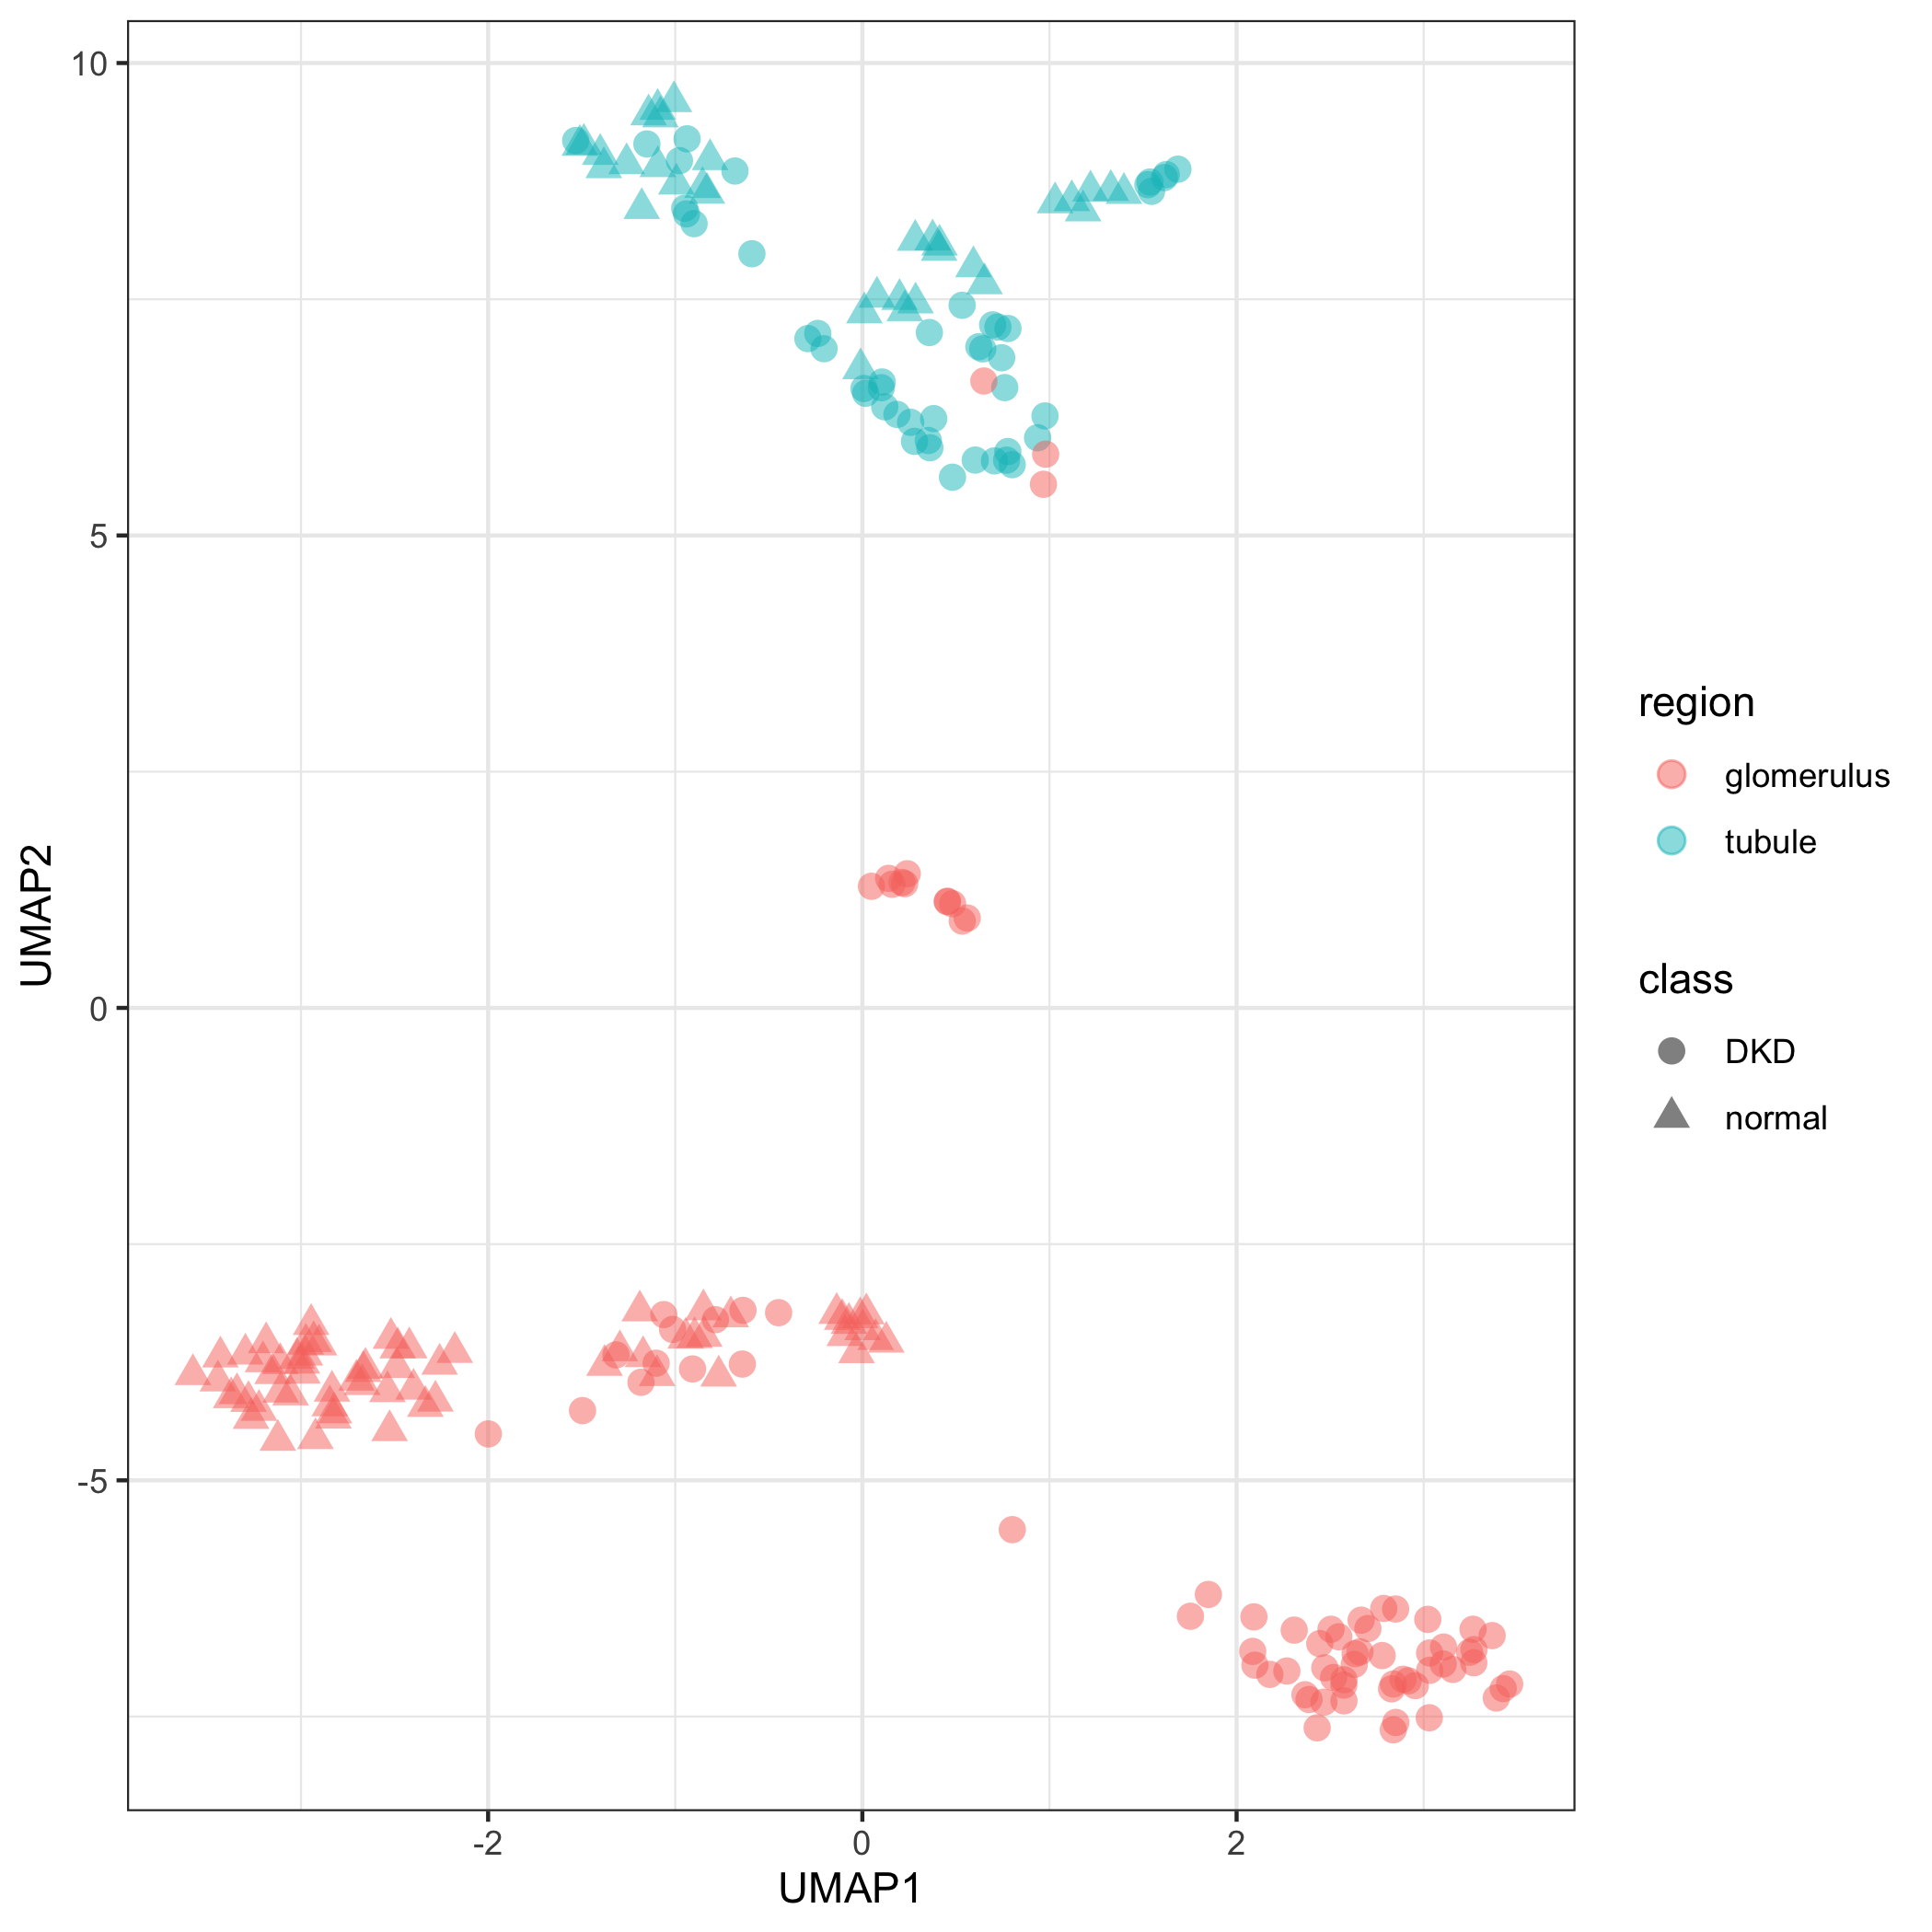
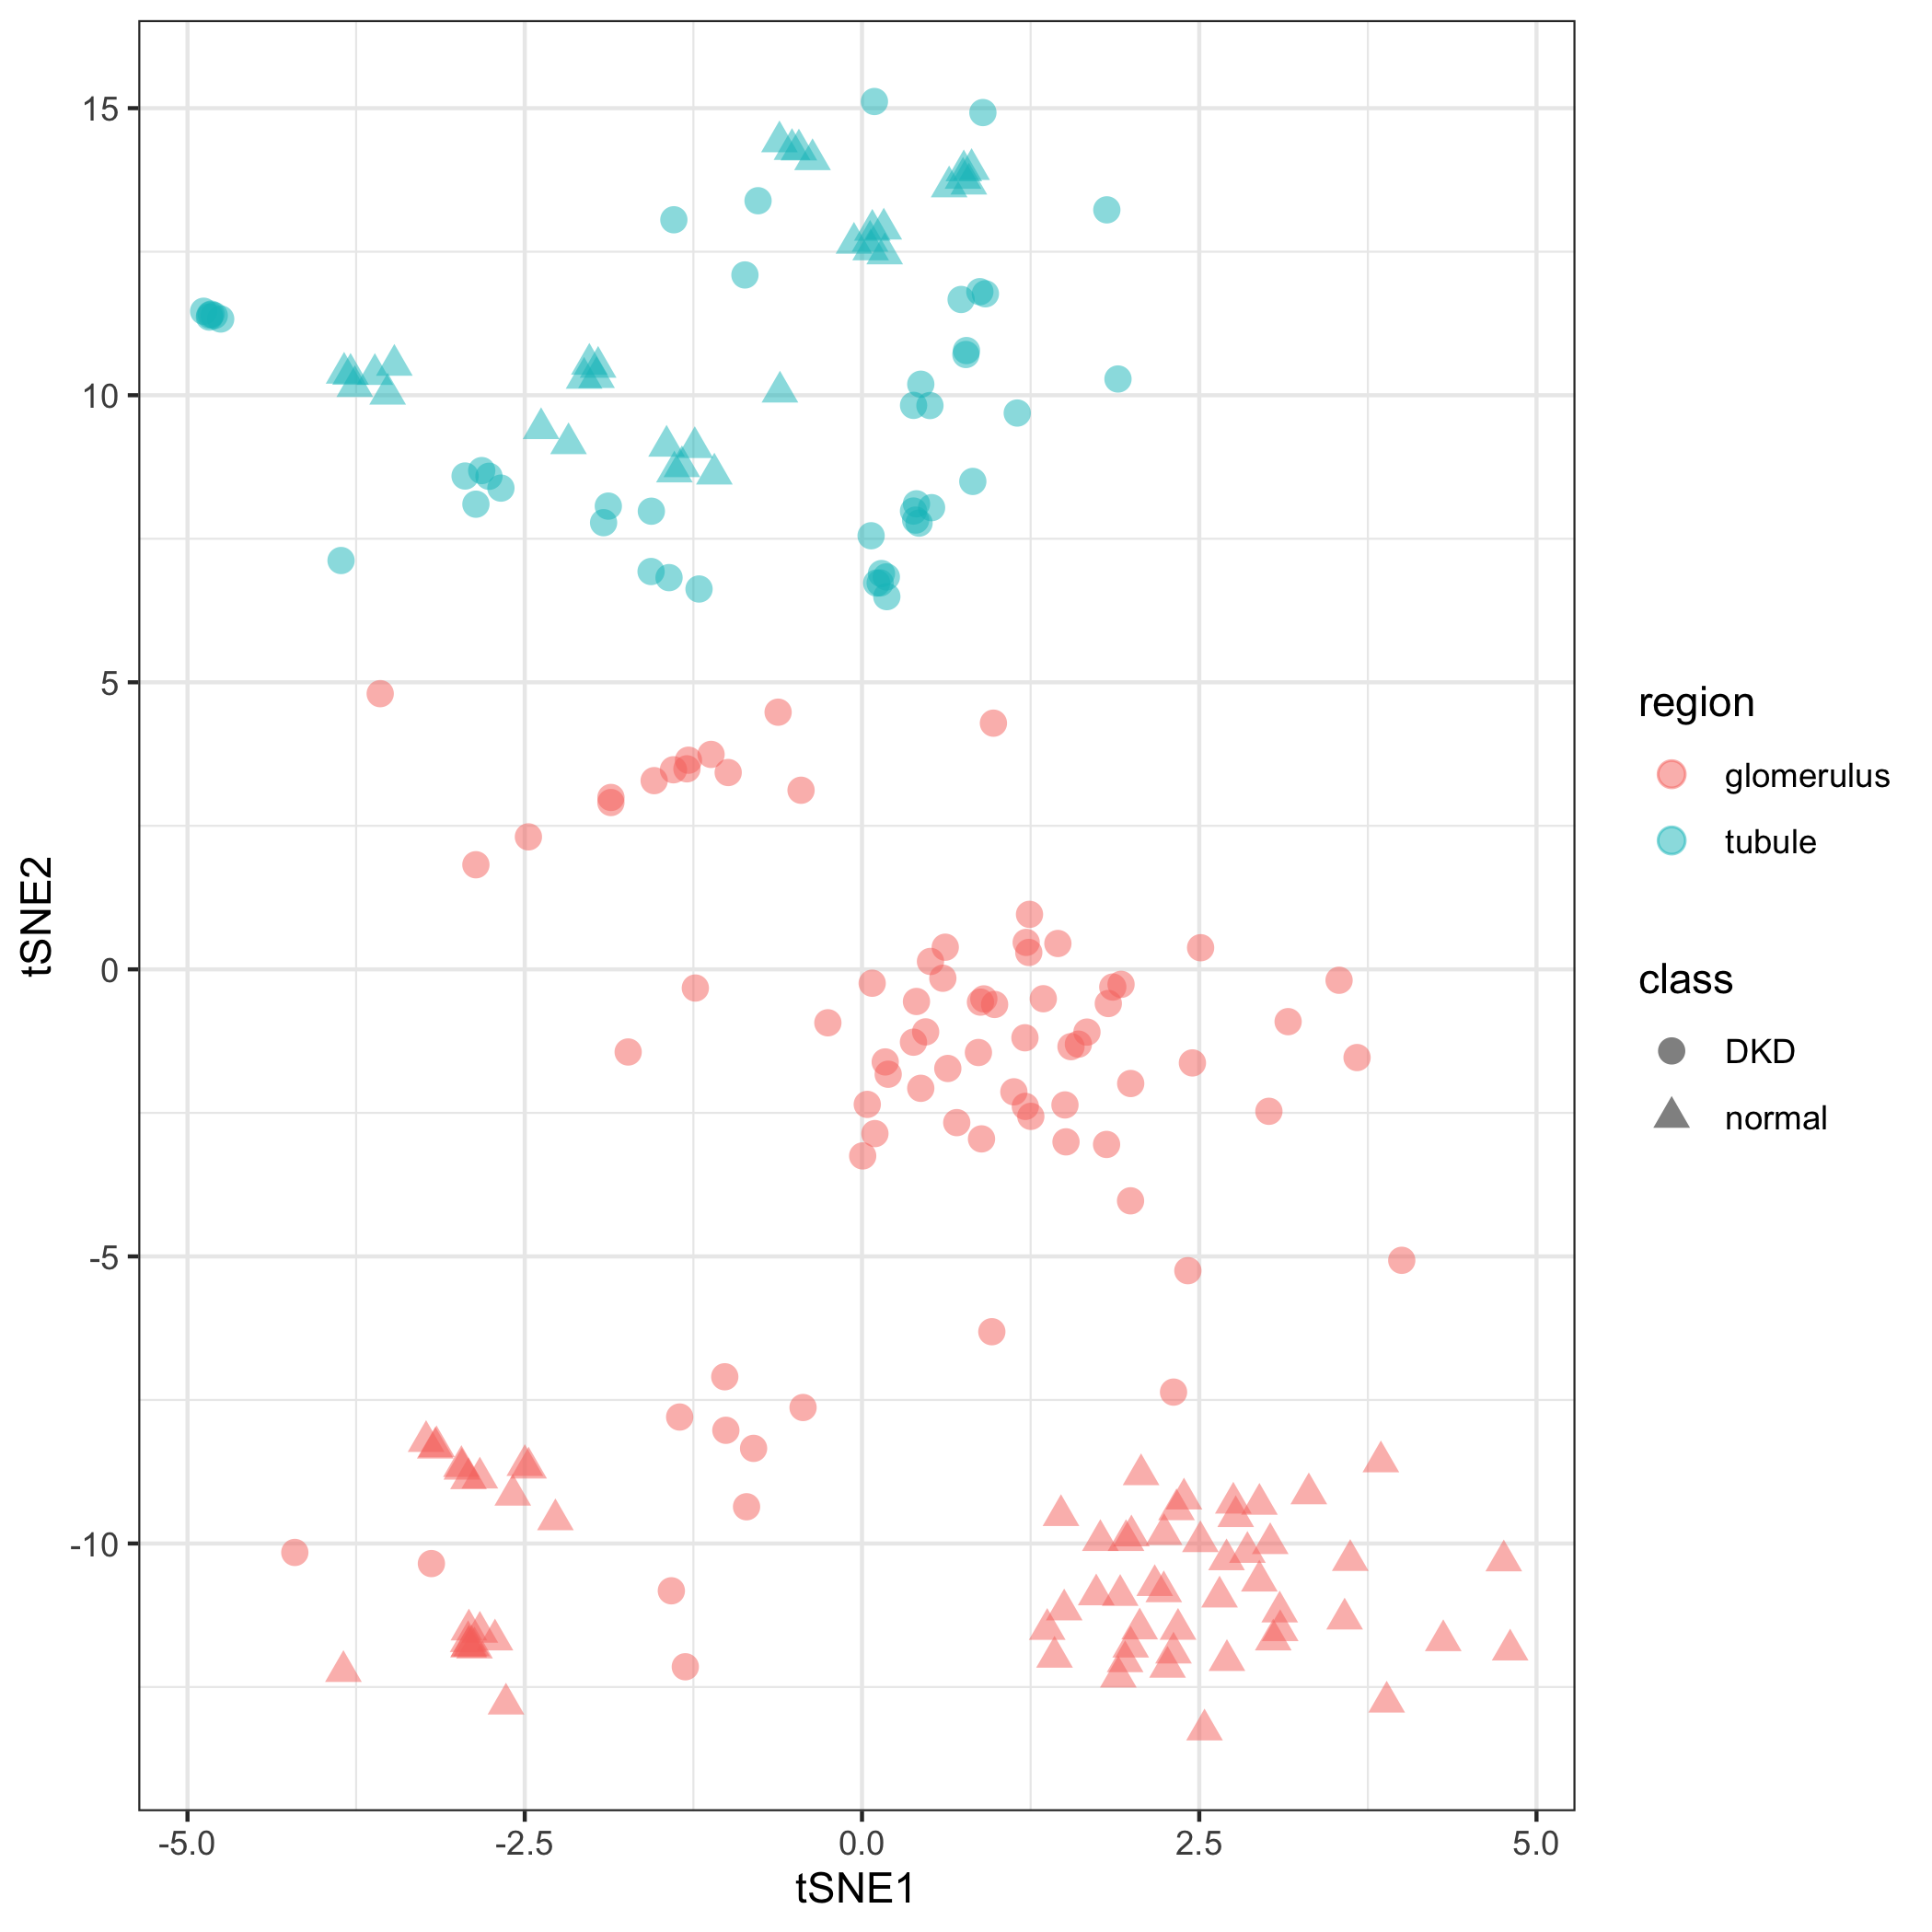


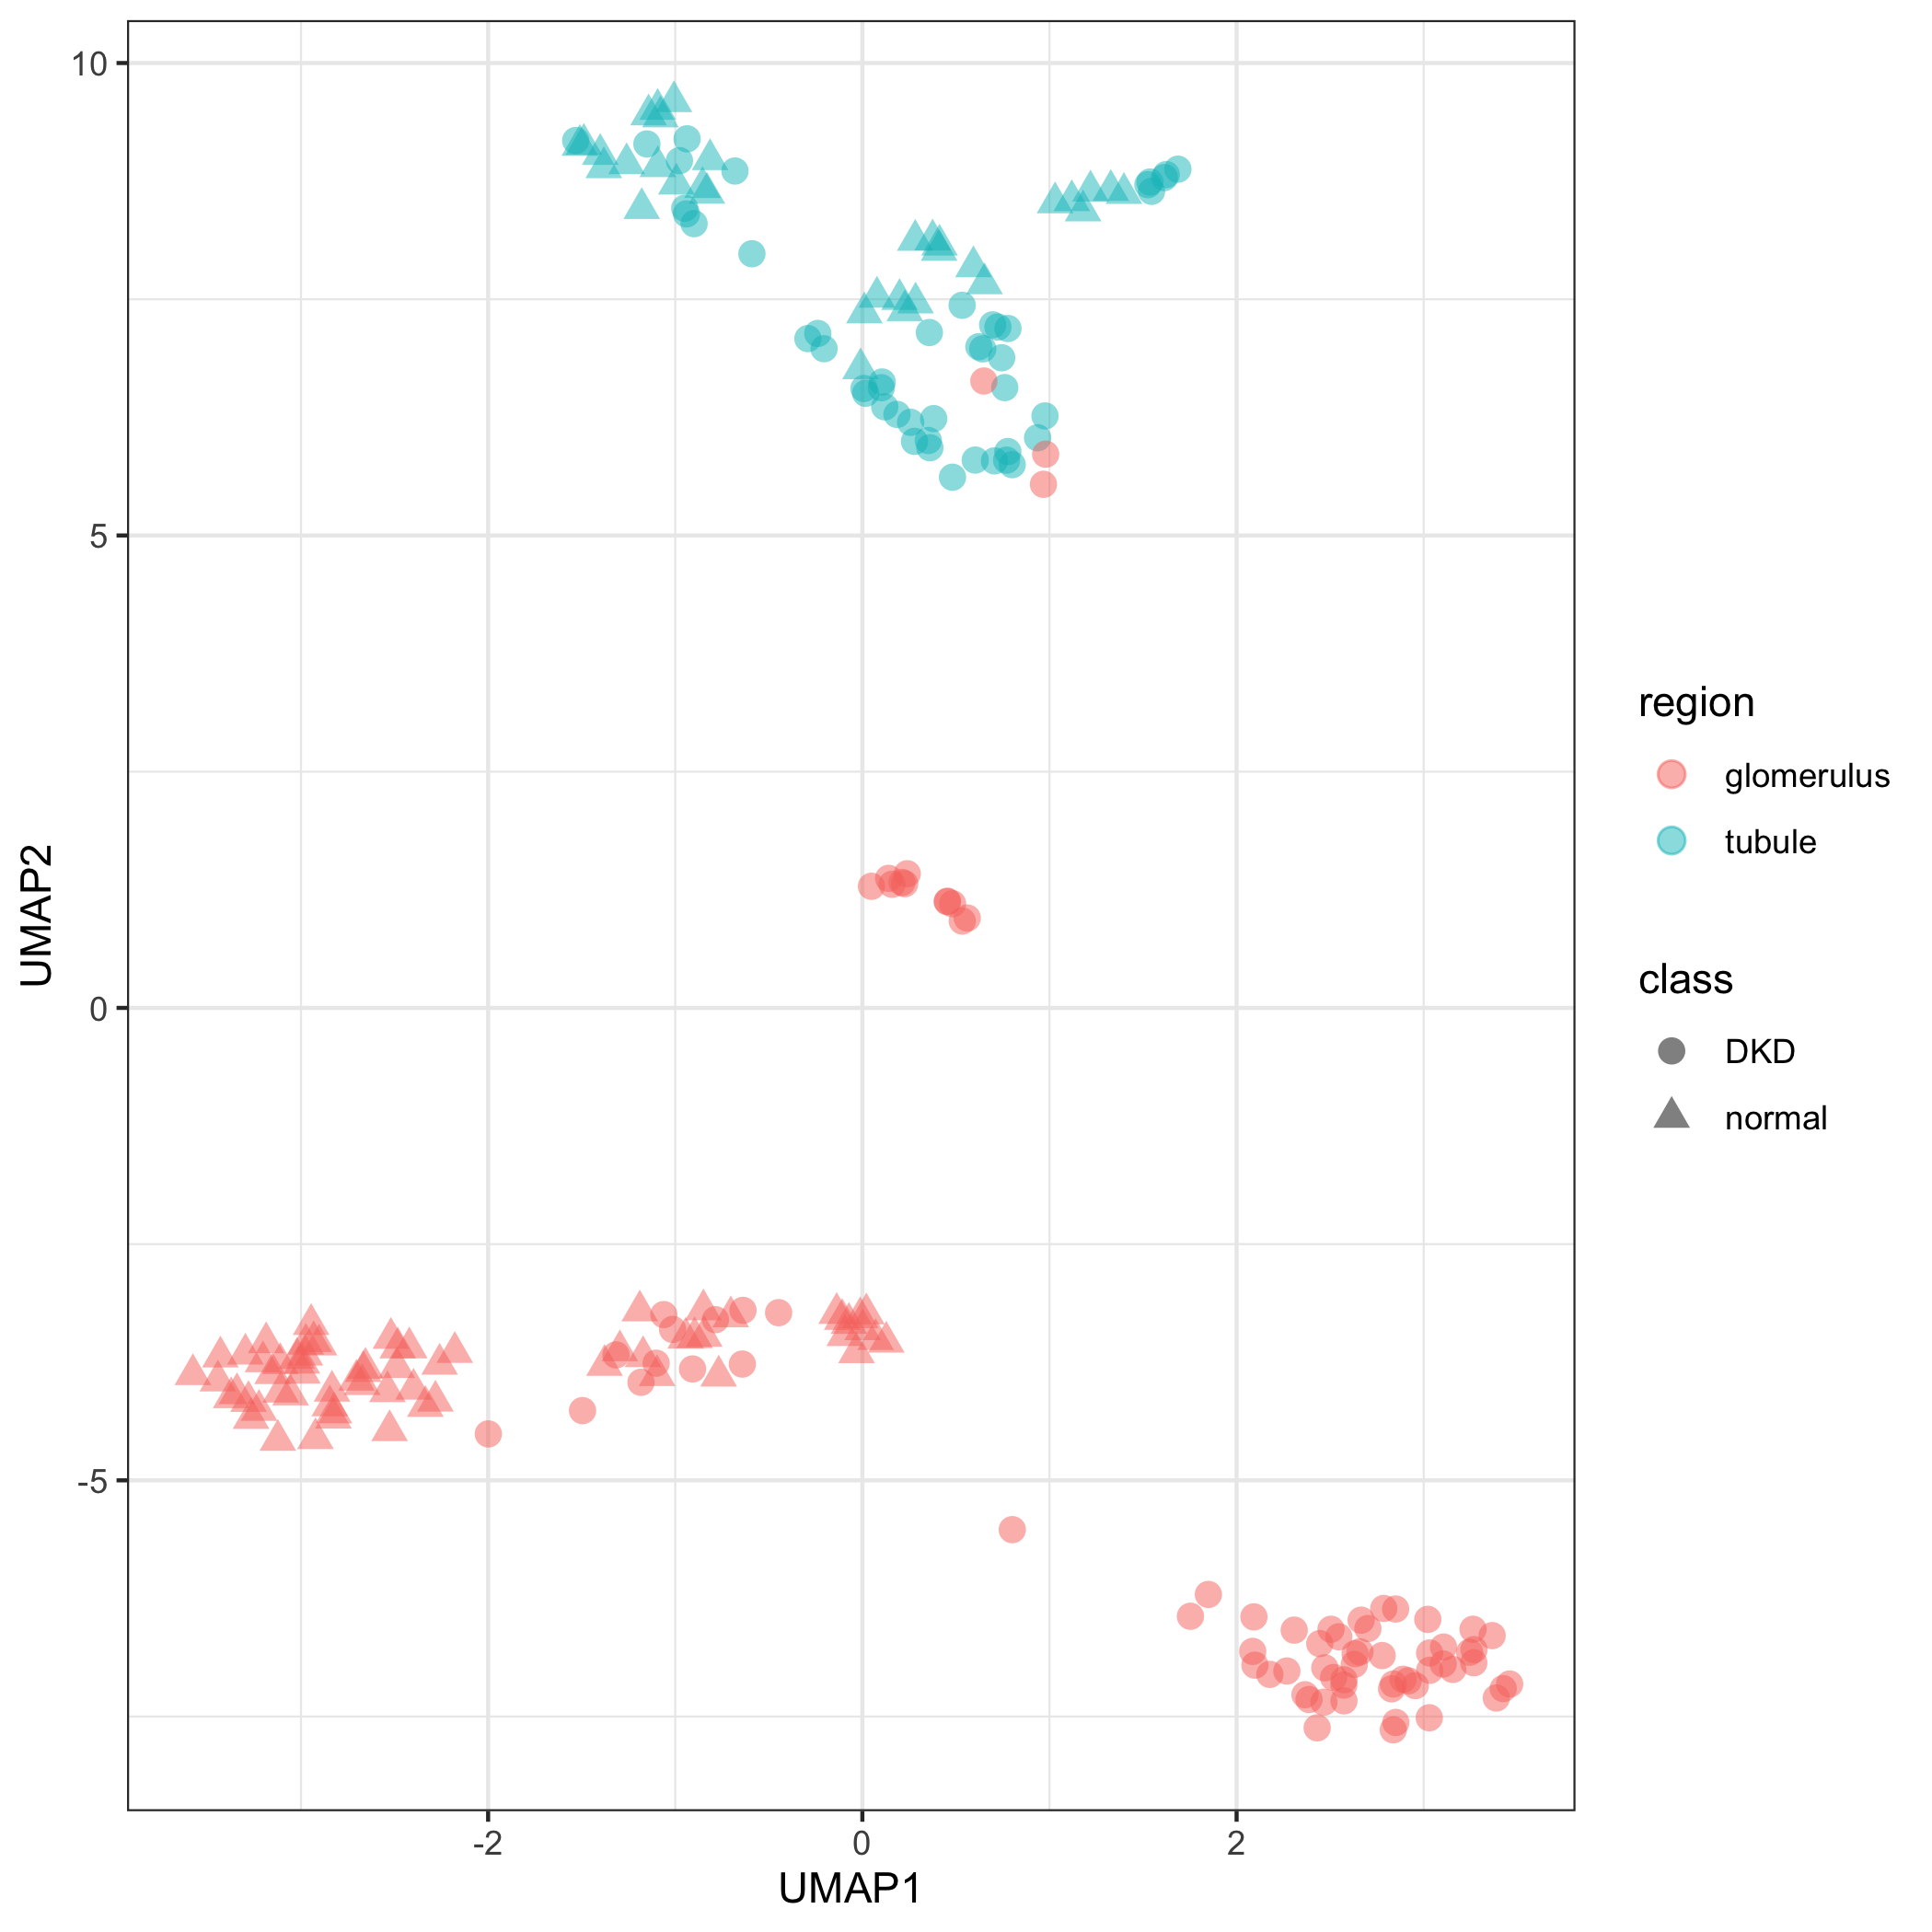
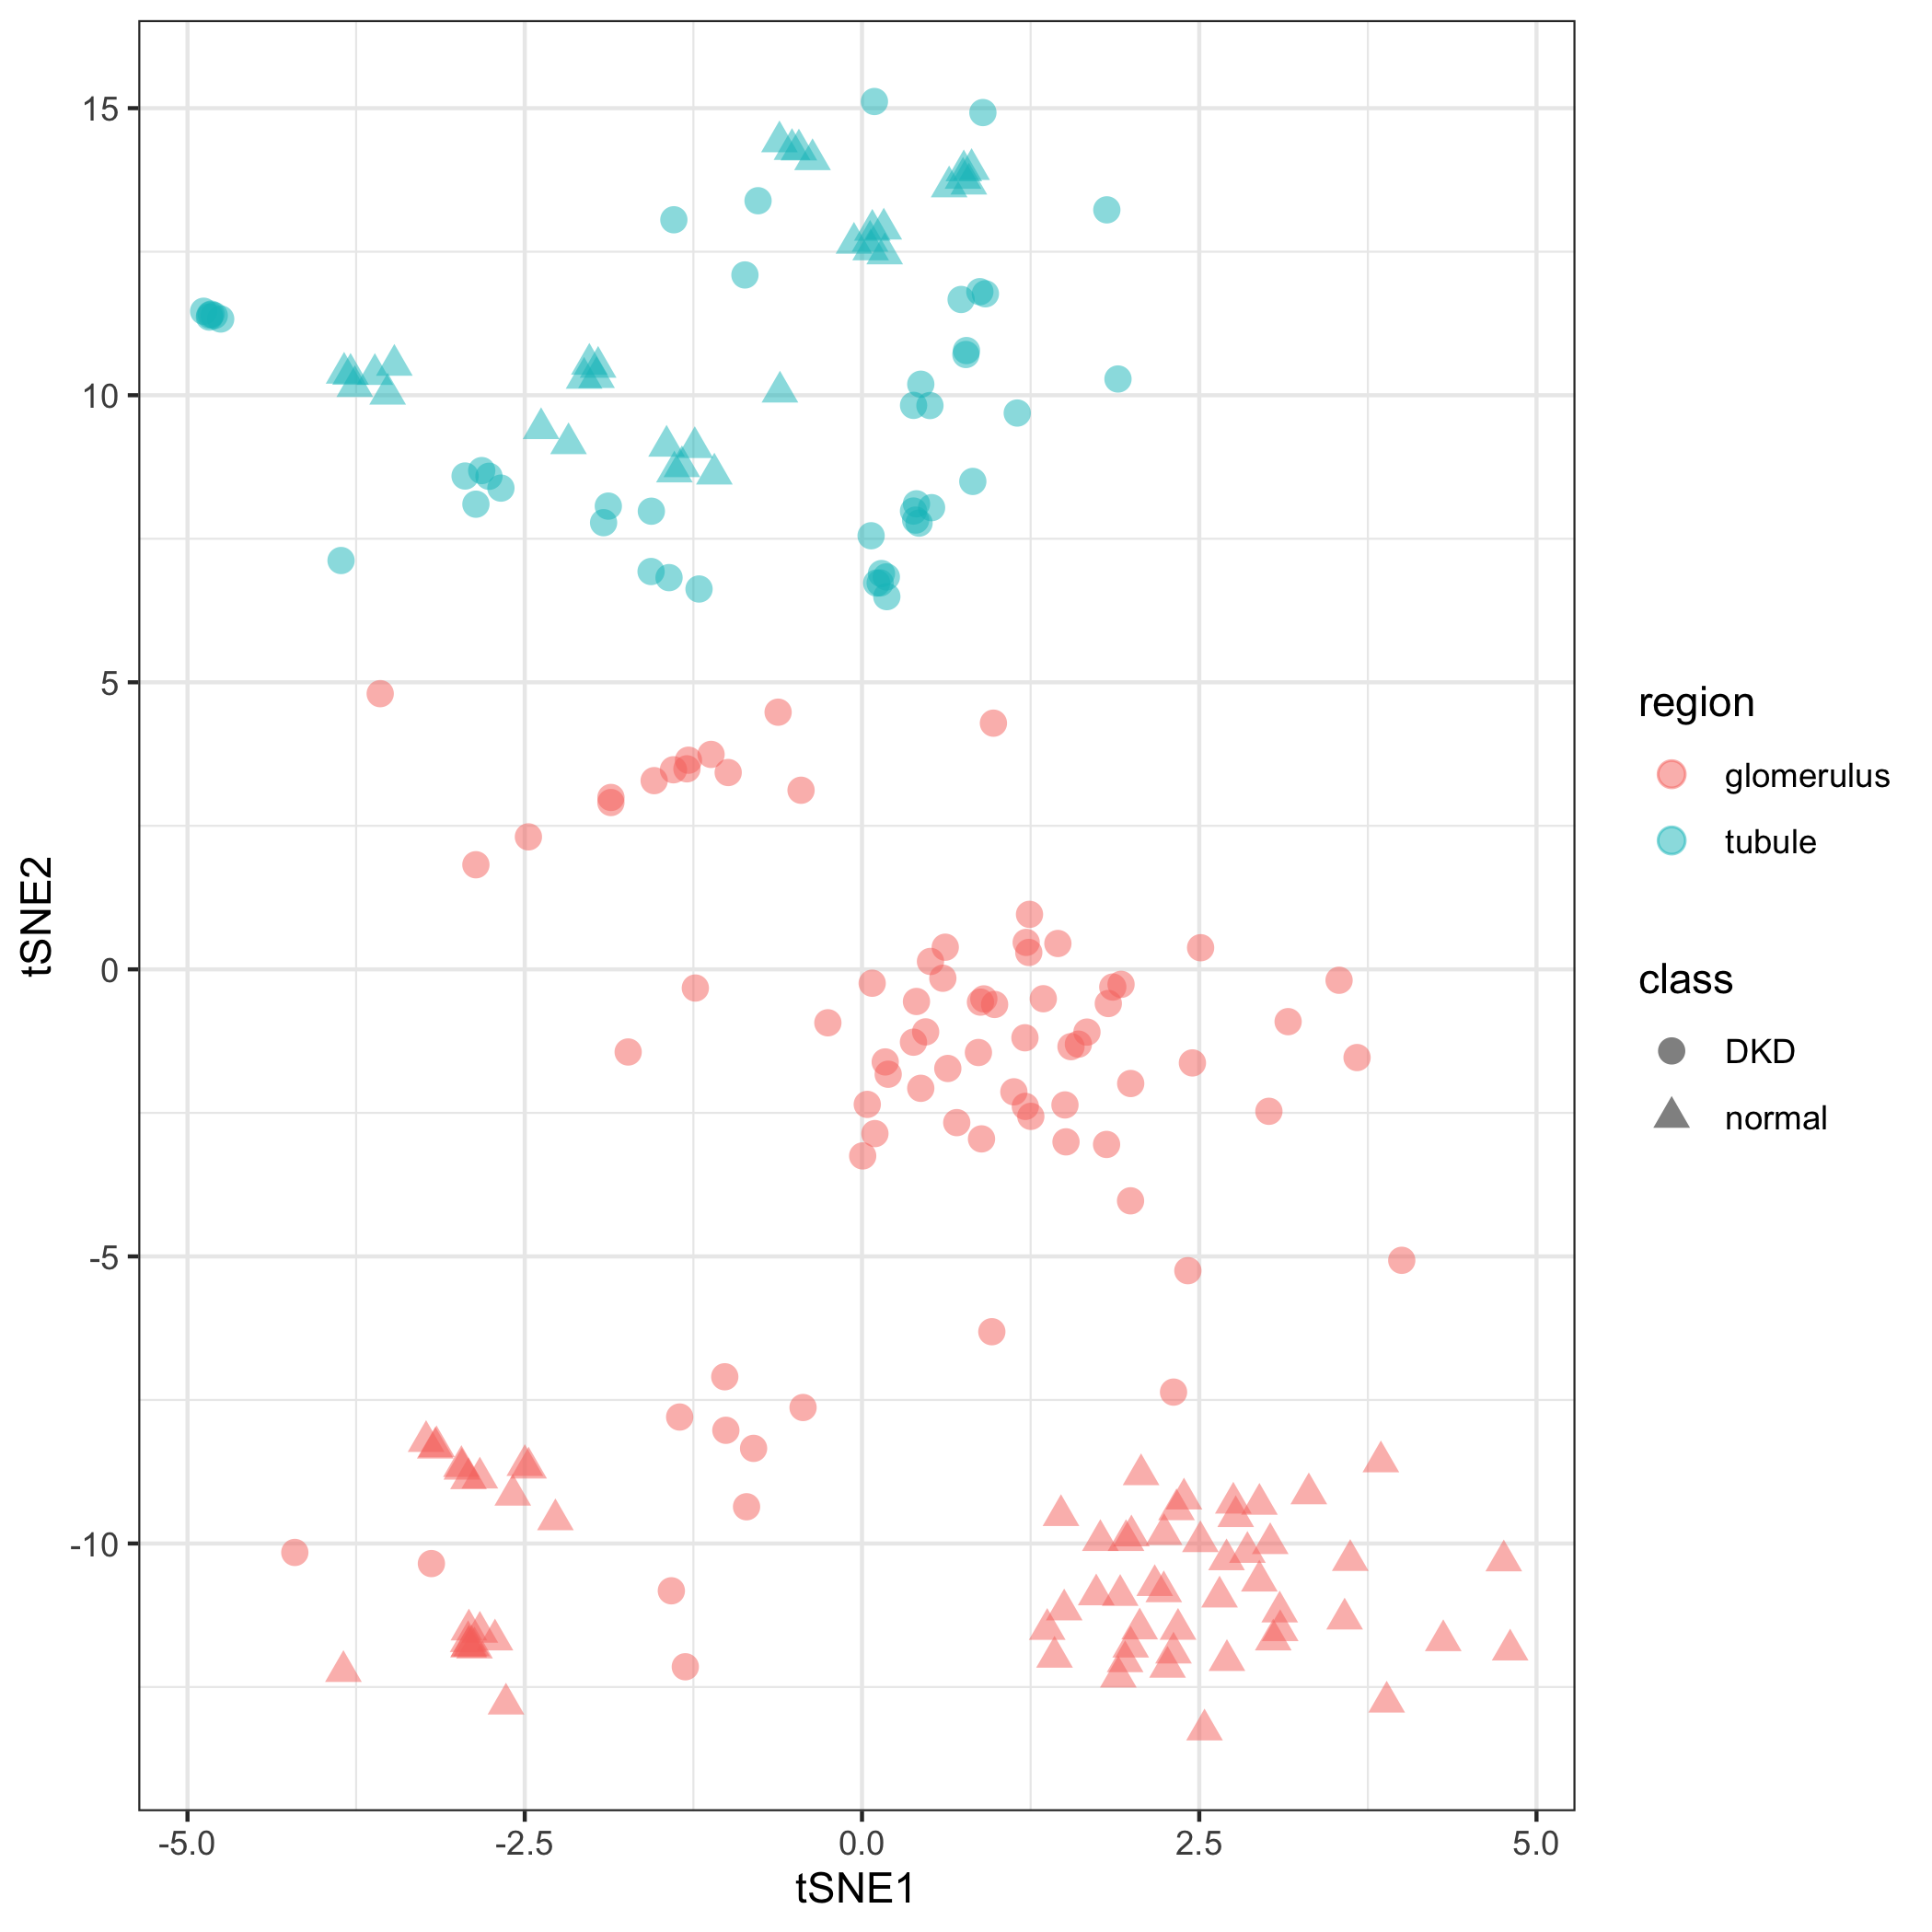

In [193]:
ipyplot.plot_images(clusters, img_width=450, labels=['UMAP', 'T-SNE'])

### 4.2 Clustering high Coefficient of Variation Genes

The coefficient of variation (CV) identifies genes that have large expression differences across the profiled segments.

$CV_g = \dfrac{SD_g}{mean_g}$

These are the genes with the highest CV.

In [178]:
pd.read_csv('data/4_2_table_highest_cd_genes.csv')

Coefficient of variation    Genes
0                  0.588601  CAMK2N1
1                  0.511497   AKR1C1
2                  0.460721     AQP2
3                  0.419647    GDF15
4                  0.419322      REN

Plot the CV of all genes using unsupervised hierarchical clustering, displayed as a heatmap.

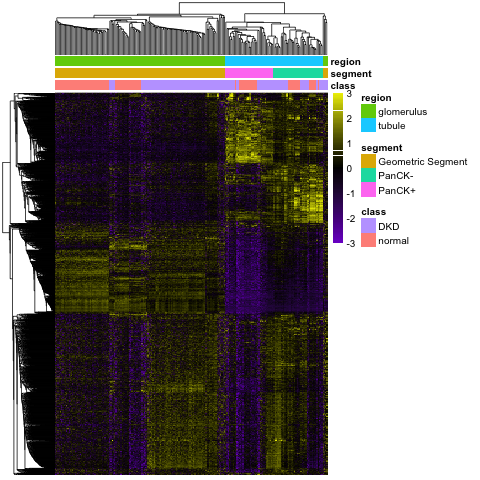

In [194]:
Image(filename='plots/4_2_clustering_genes_coefficient_of_variation.png', width=700)

## Differential Expression

### 5.2 Interpreting the results table

Review the results from building linear mixed-effect models (LMM) on some genes of interest. This model type is chosen to account for the subsampling per tissue. This is necessary since the samples from the ROI of the tissues are not independent observations. The constrast column identifies the structures being compared. Positive fold change values indicate an enrichment in the glomerulus, negative indicates enrichment in tubules. 

- **Estimate:** predicted log2 fold change value
- **P-value:** Pr(>|t|)
- **FDR:** false-discovery adjusted P-value

In [198]:
pd.read_csv('data/5_2_table_differential_expression_genes_of_interest_within_slide_analysis.csv')

Gene  Subset             Contrast  Estimate  P-value    FDR
0  KRT18  normal  glomerulus - tubule    -1.169    0.076  0.237
1   CD68  normal  glomerulus - tubule    -0.153    0.289  0.483
2   CD8A  normal  glomerulus - tubule    -0.227    0.147  0.332
3  NPHS1  normal  glomerulus - tubule     3.809    0.001  0.012
4  CALB1  normal  glomerulus - tubule    -2.014    0.027  0.138
5  CD274  normal  glomerulus - tubule     0.223    0.031  0.147
6  NPHS2  normal  glomerulus - tubule     5.430    0.002  0.025
7  CLDN8  normal  glomerulus - tubule    -1.961    0.001  0.011
8  EPCAM  normal  glomerulus - tubule    -2.297    0.000  0.006

### 5.3 Between Slide Analysis: Diabetic Kidney Disease vs Healthy

Further analyse the results by comparing diseased versus healthy kidneys within tubule tissue samples.

In [209]:
pd.read_csv('data/5_3_table_differential_expression_genes_of_interest_between_slide_analysis.csv')

Gene  Subset      Contrast  Estimate  P-value    FDR
0  KRT18  tubule  normal - DKD    -0.096    0.748  0.997
1   CD68  tubule  normal - DKD    -0.726    0.124  0.965
2   CD8A  tubule  normal - DKD    -0.057    0.826  0.998
3  NPHS1  tubule  normal - DKD    -0.131    0.624  0.997
4  CALB1  tubule  normal - DKD     1.408    0.013  0.652
5  CD274  tubule  normal - DKD    -0.252    0.522  0.997
6  NPHS2  tubule  normal - DKD    -0.128    0.730  0.997
7  CLDN8  tubule  normal - DKD     0.979    0.000  0.058
8  EPCAM  tubule  normal - DKD     0.339    0.382  0.997

## 6 Visualizing DE Genes

### 6.1 Volcano Plots

Use a volcano plot to visualise the LMM results from the diseased glomeruli versus tubules comparison. Since a LMM was used to account for tissue specific variation, the volcano plot shape may look less typical than one generated with a linear regression model. Some genes have a high fold change, but lower significance, because these genes seem to be behaving in a sample-specific manner rather than consistently across all kidney samples.

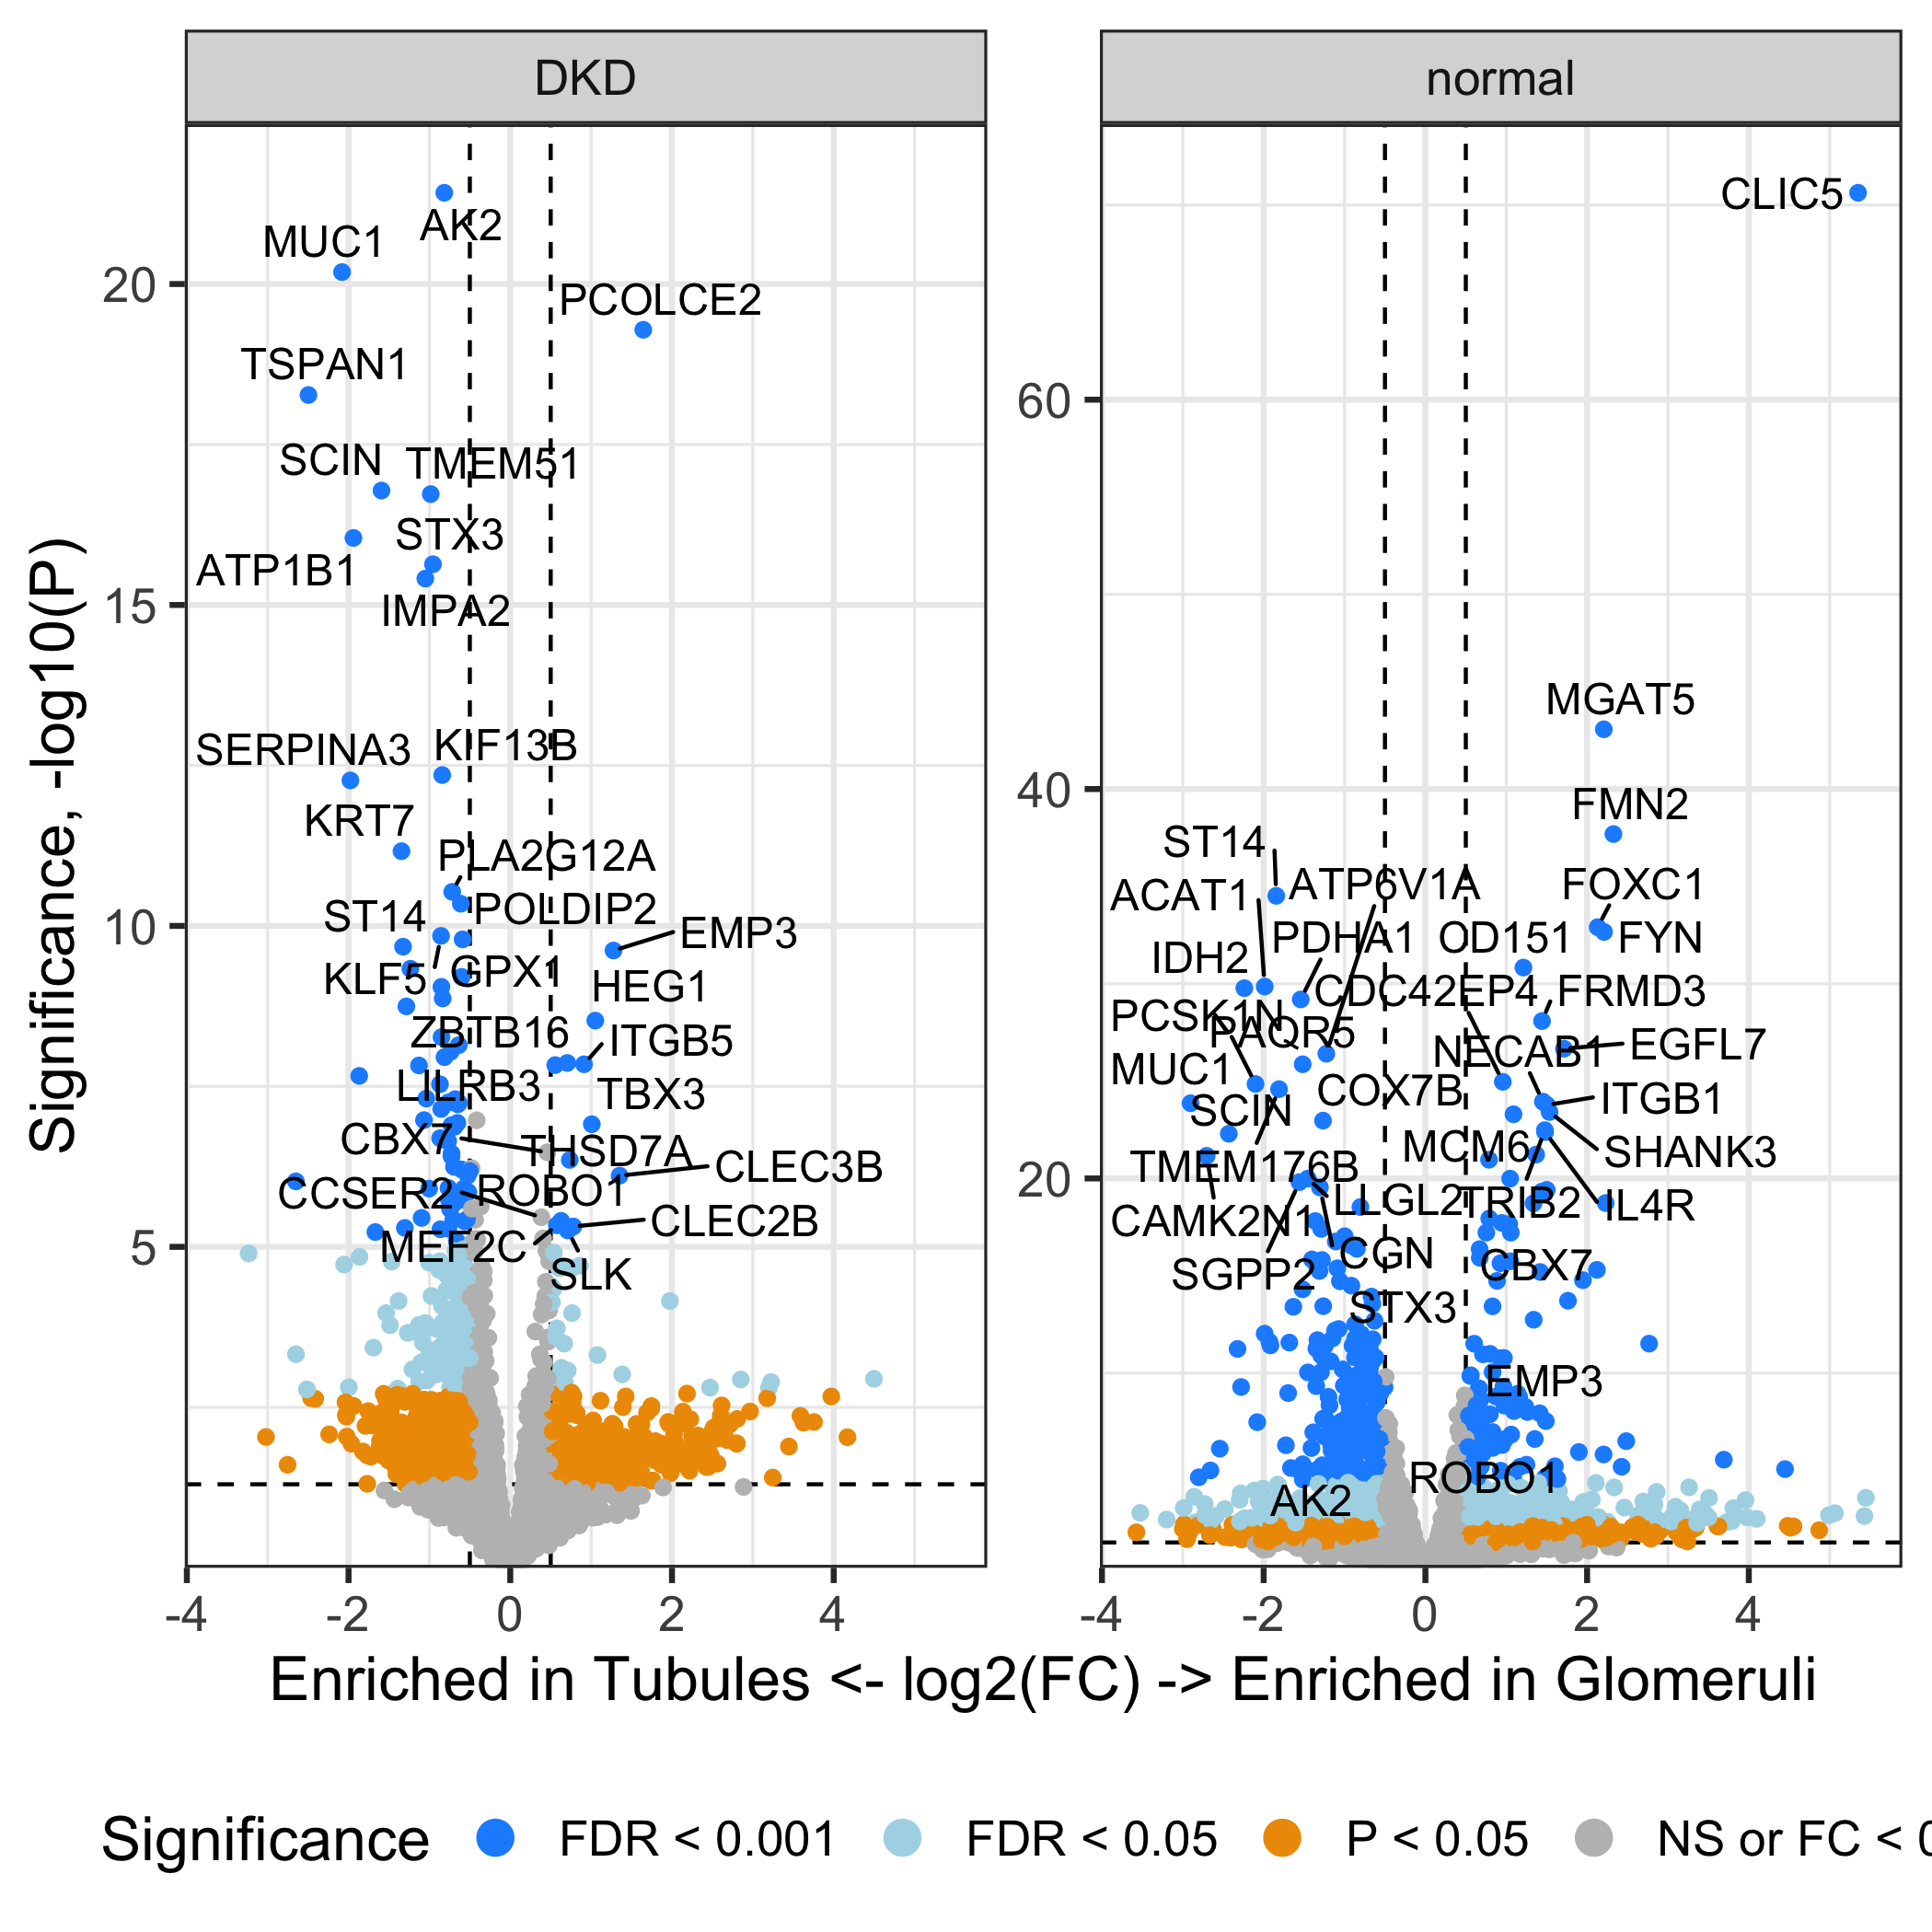

In [211]:
Image(filename='plots/6_1_volcano_plots.png', width=600)

### 6.2 Plotting Genes of Interest

Inspect the results of two genes of interest before plotting them to show their expression distribution.

In [203]:
pd.read_csv('data/6_2_model_results_genes_of_interest.csv')

Gene  Subset             Contrast  Estimate       P-value           FDR  \
0  PDHA1     DKD  glomerulus - tubule -1.065765  6.515855e-03  1.122655e-01   
1  ITGB1     DKD  glomerulus - tubule  0.676947  3.076876e-02  2.192658e-01   
2  PDHA1  normal  glomerulus - tubule -1.541631  6.425584e-30  6.509760e-27   
3  ITGB1  normal  glomerulus - tubule  1.504283  1.700611e-24  8.614447e-22   

         Color  
0     P < 0.05  
1     P < 0.05  
2  FDR < 0.001  
3  FDR < 0.001

Use a violin plot to show the range and shape of PDHA1 expression distribution as it differs across kidney structure and disease state.

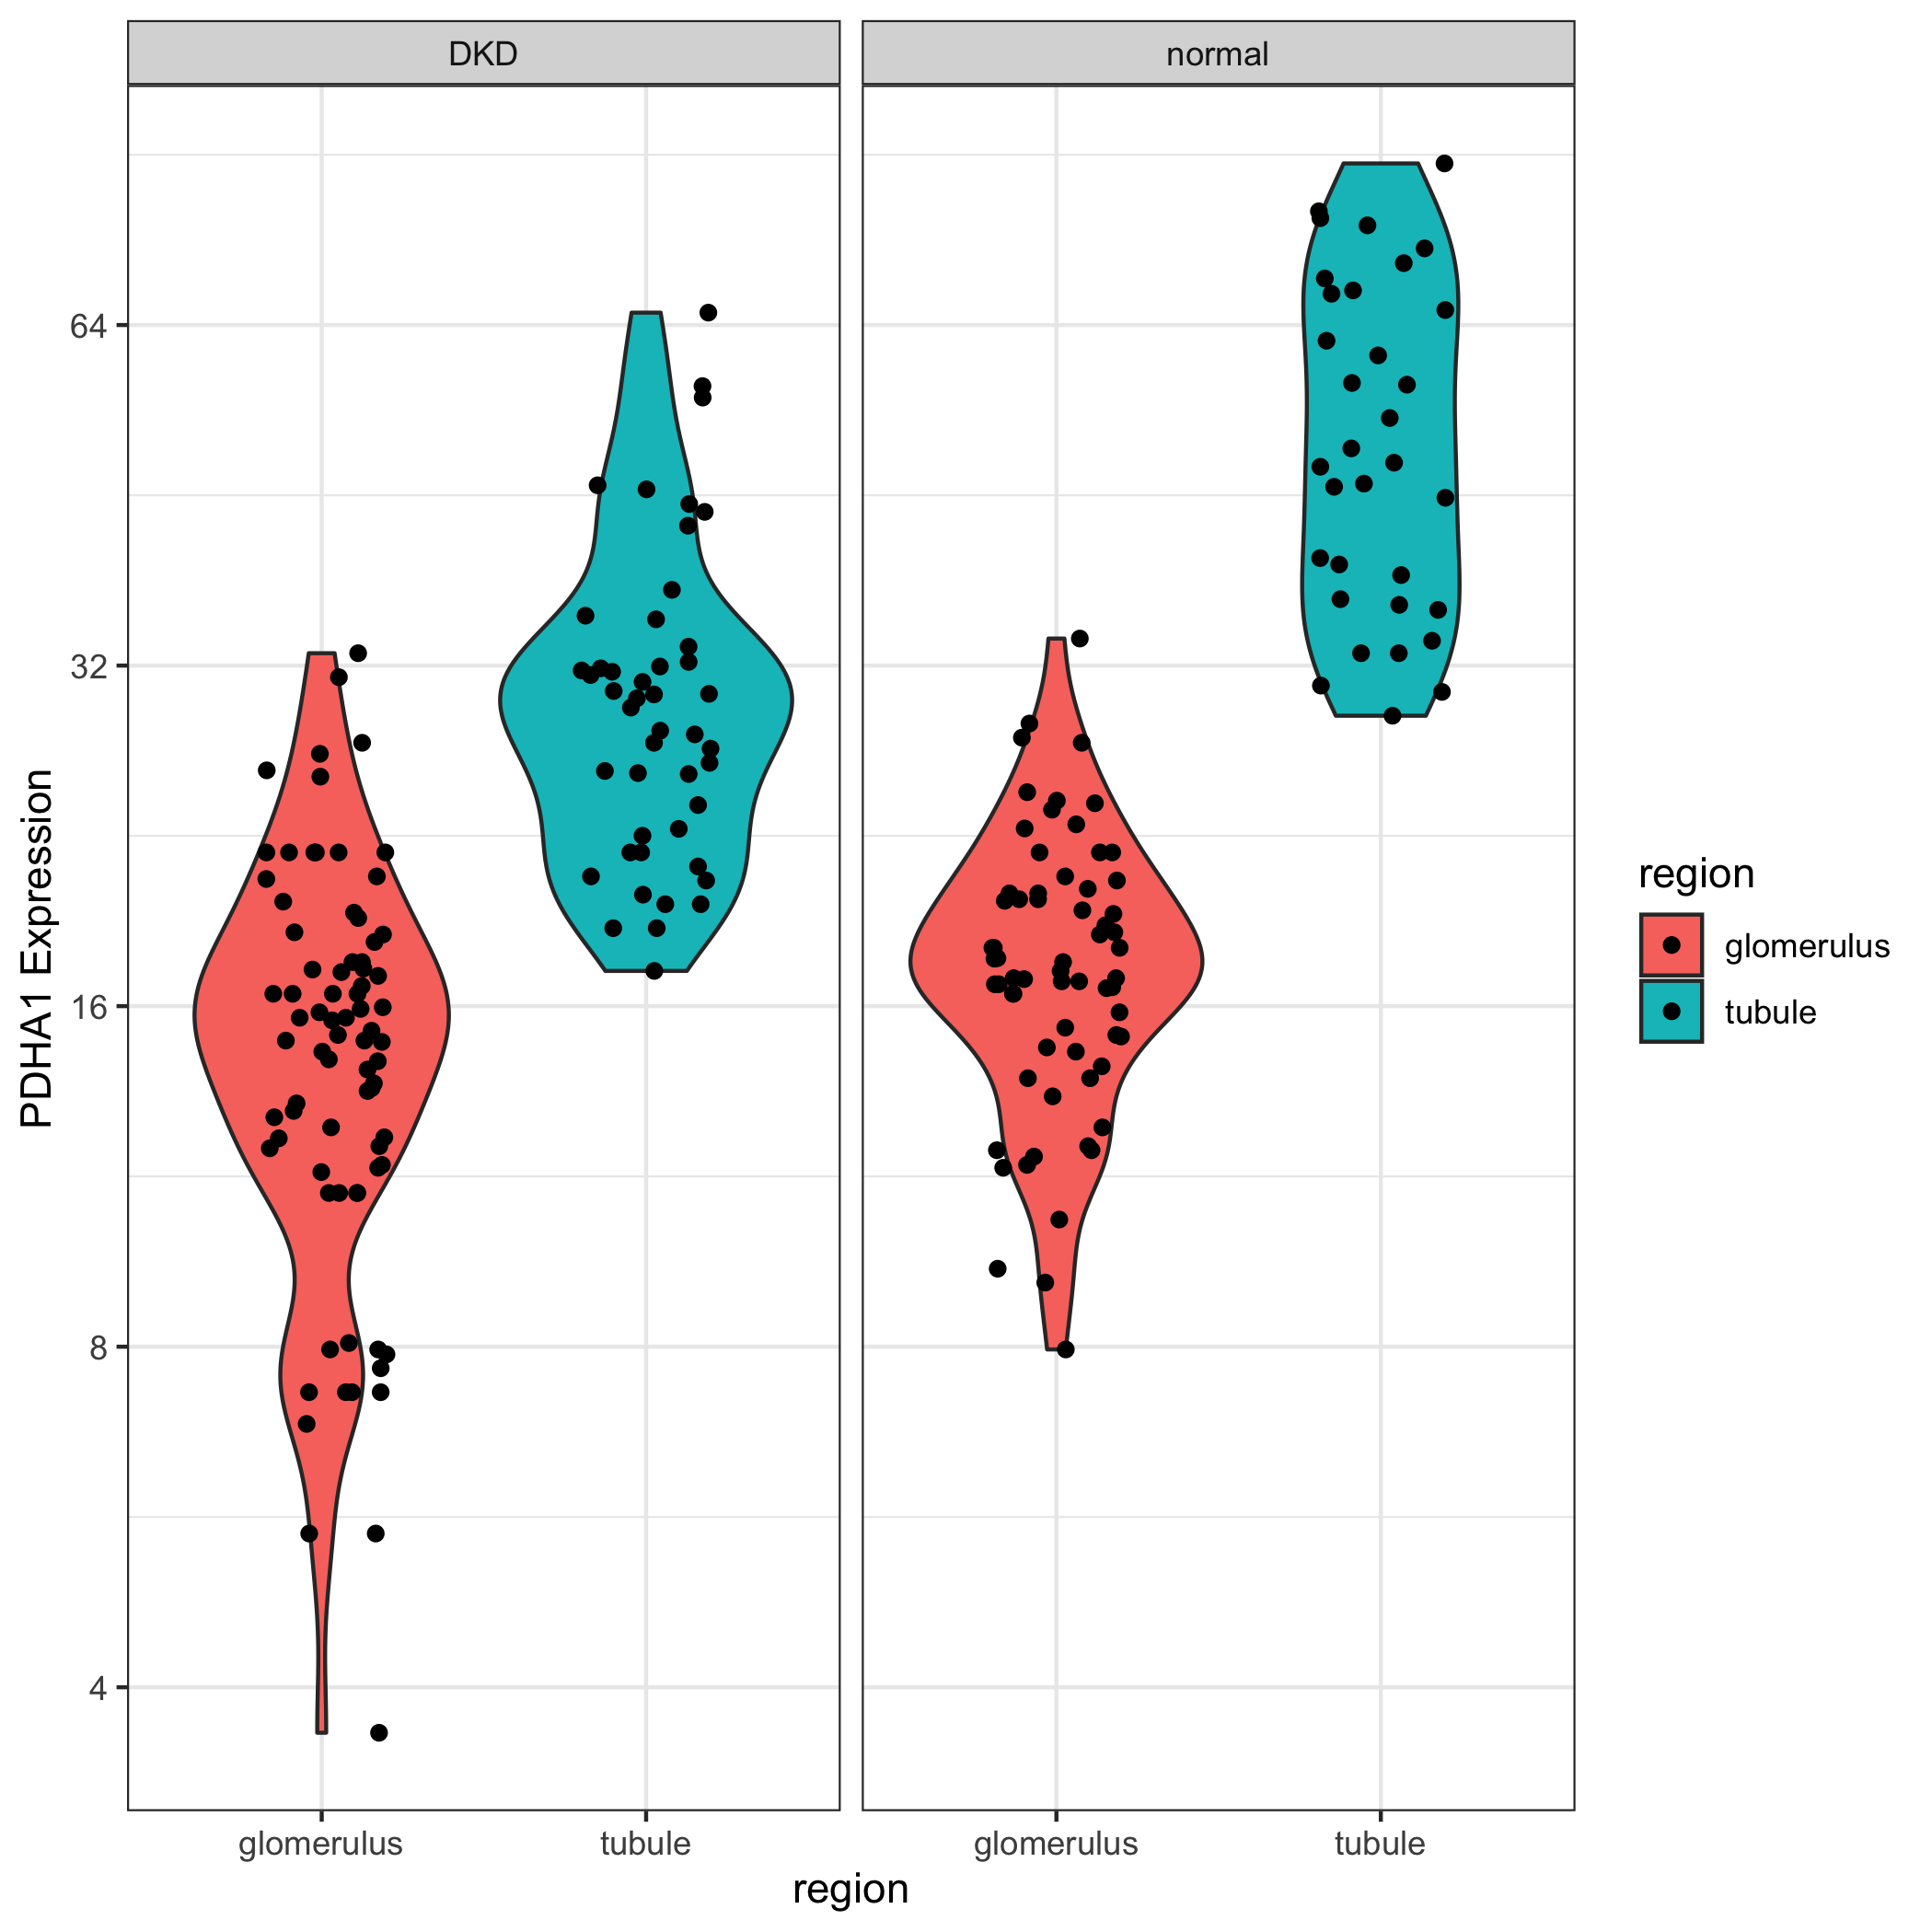

In [207]:
Image(filename='plots/6_2_violin_plot_gene_expression.png', width=500)

Plot the two gene targets against each other, which shows the difference in expression pattern between the diseased and normal states.

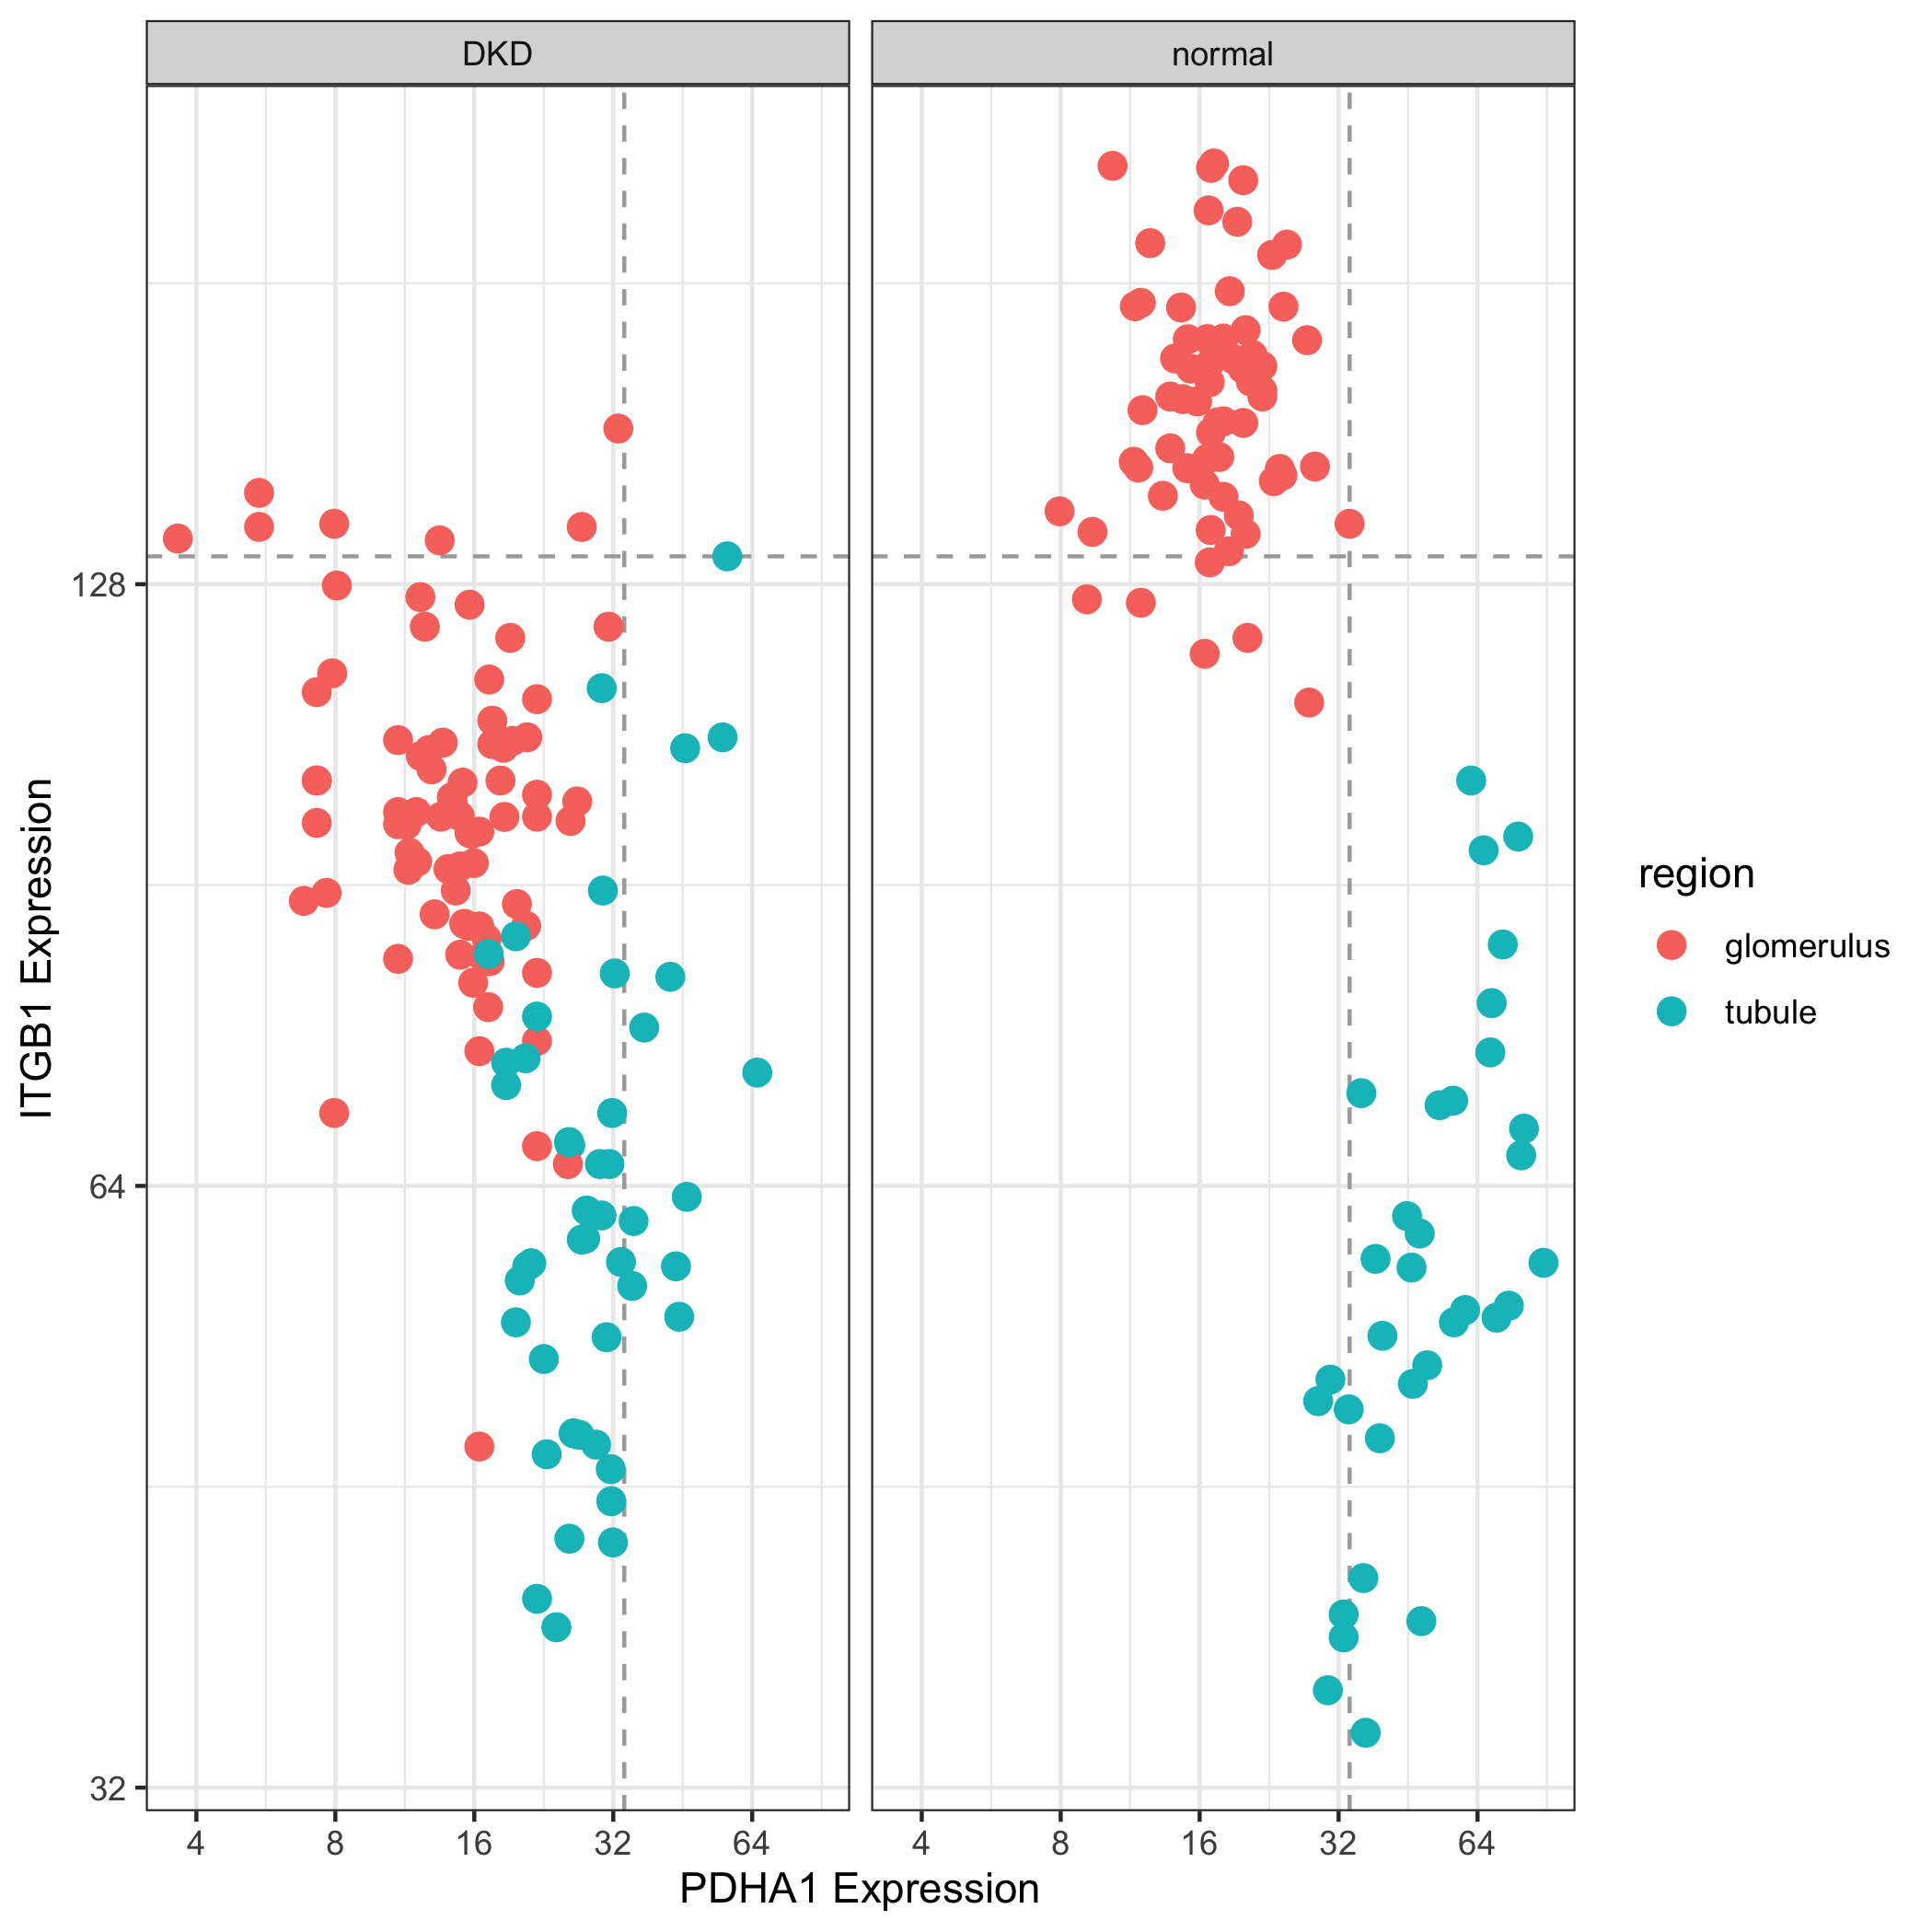

In [206]:
Image(filename='plots/6_2_expression_patterns.png', width=500)

### 6.3 Heatmap of Significant Genes

Create a heatmap using unsupervised hierarchical clustering after genes have been filtered for those with an FDR < 0.001.

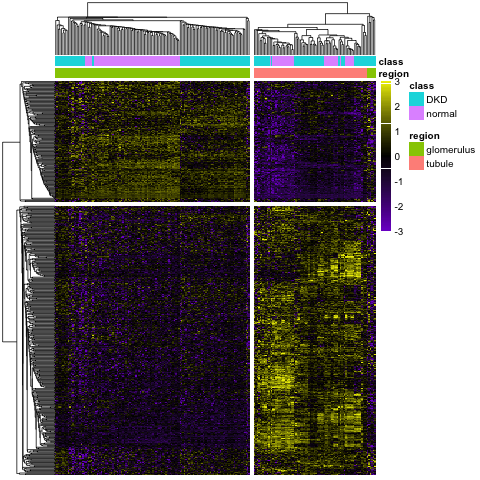

In [214]:
Image(filename='plots/6_3_heatmap_significant_genes.png', width=600)

### 6.4 MA Plot

Use an MA plot to look for statistically significant differences in expression across the disease states. Genes with low expression have been filtered out, so the MA plot will not have its traditional shape. This plot can be useful to identify targets with relatively high fold change and baseline expression. 

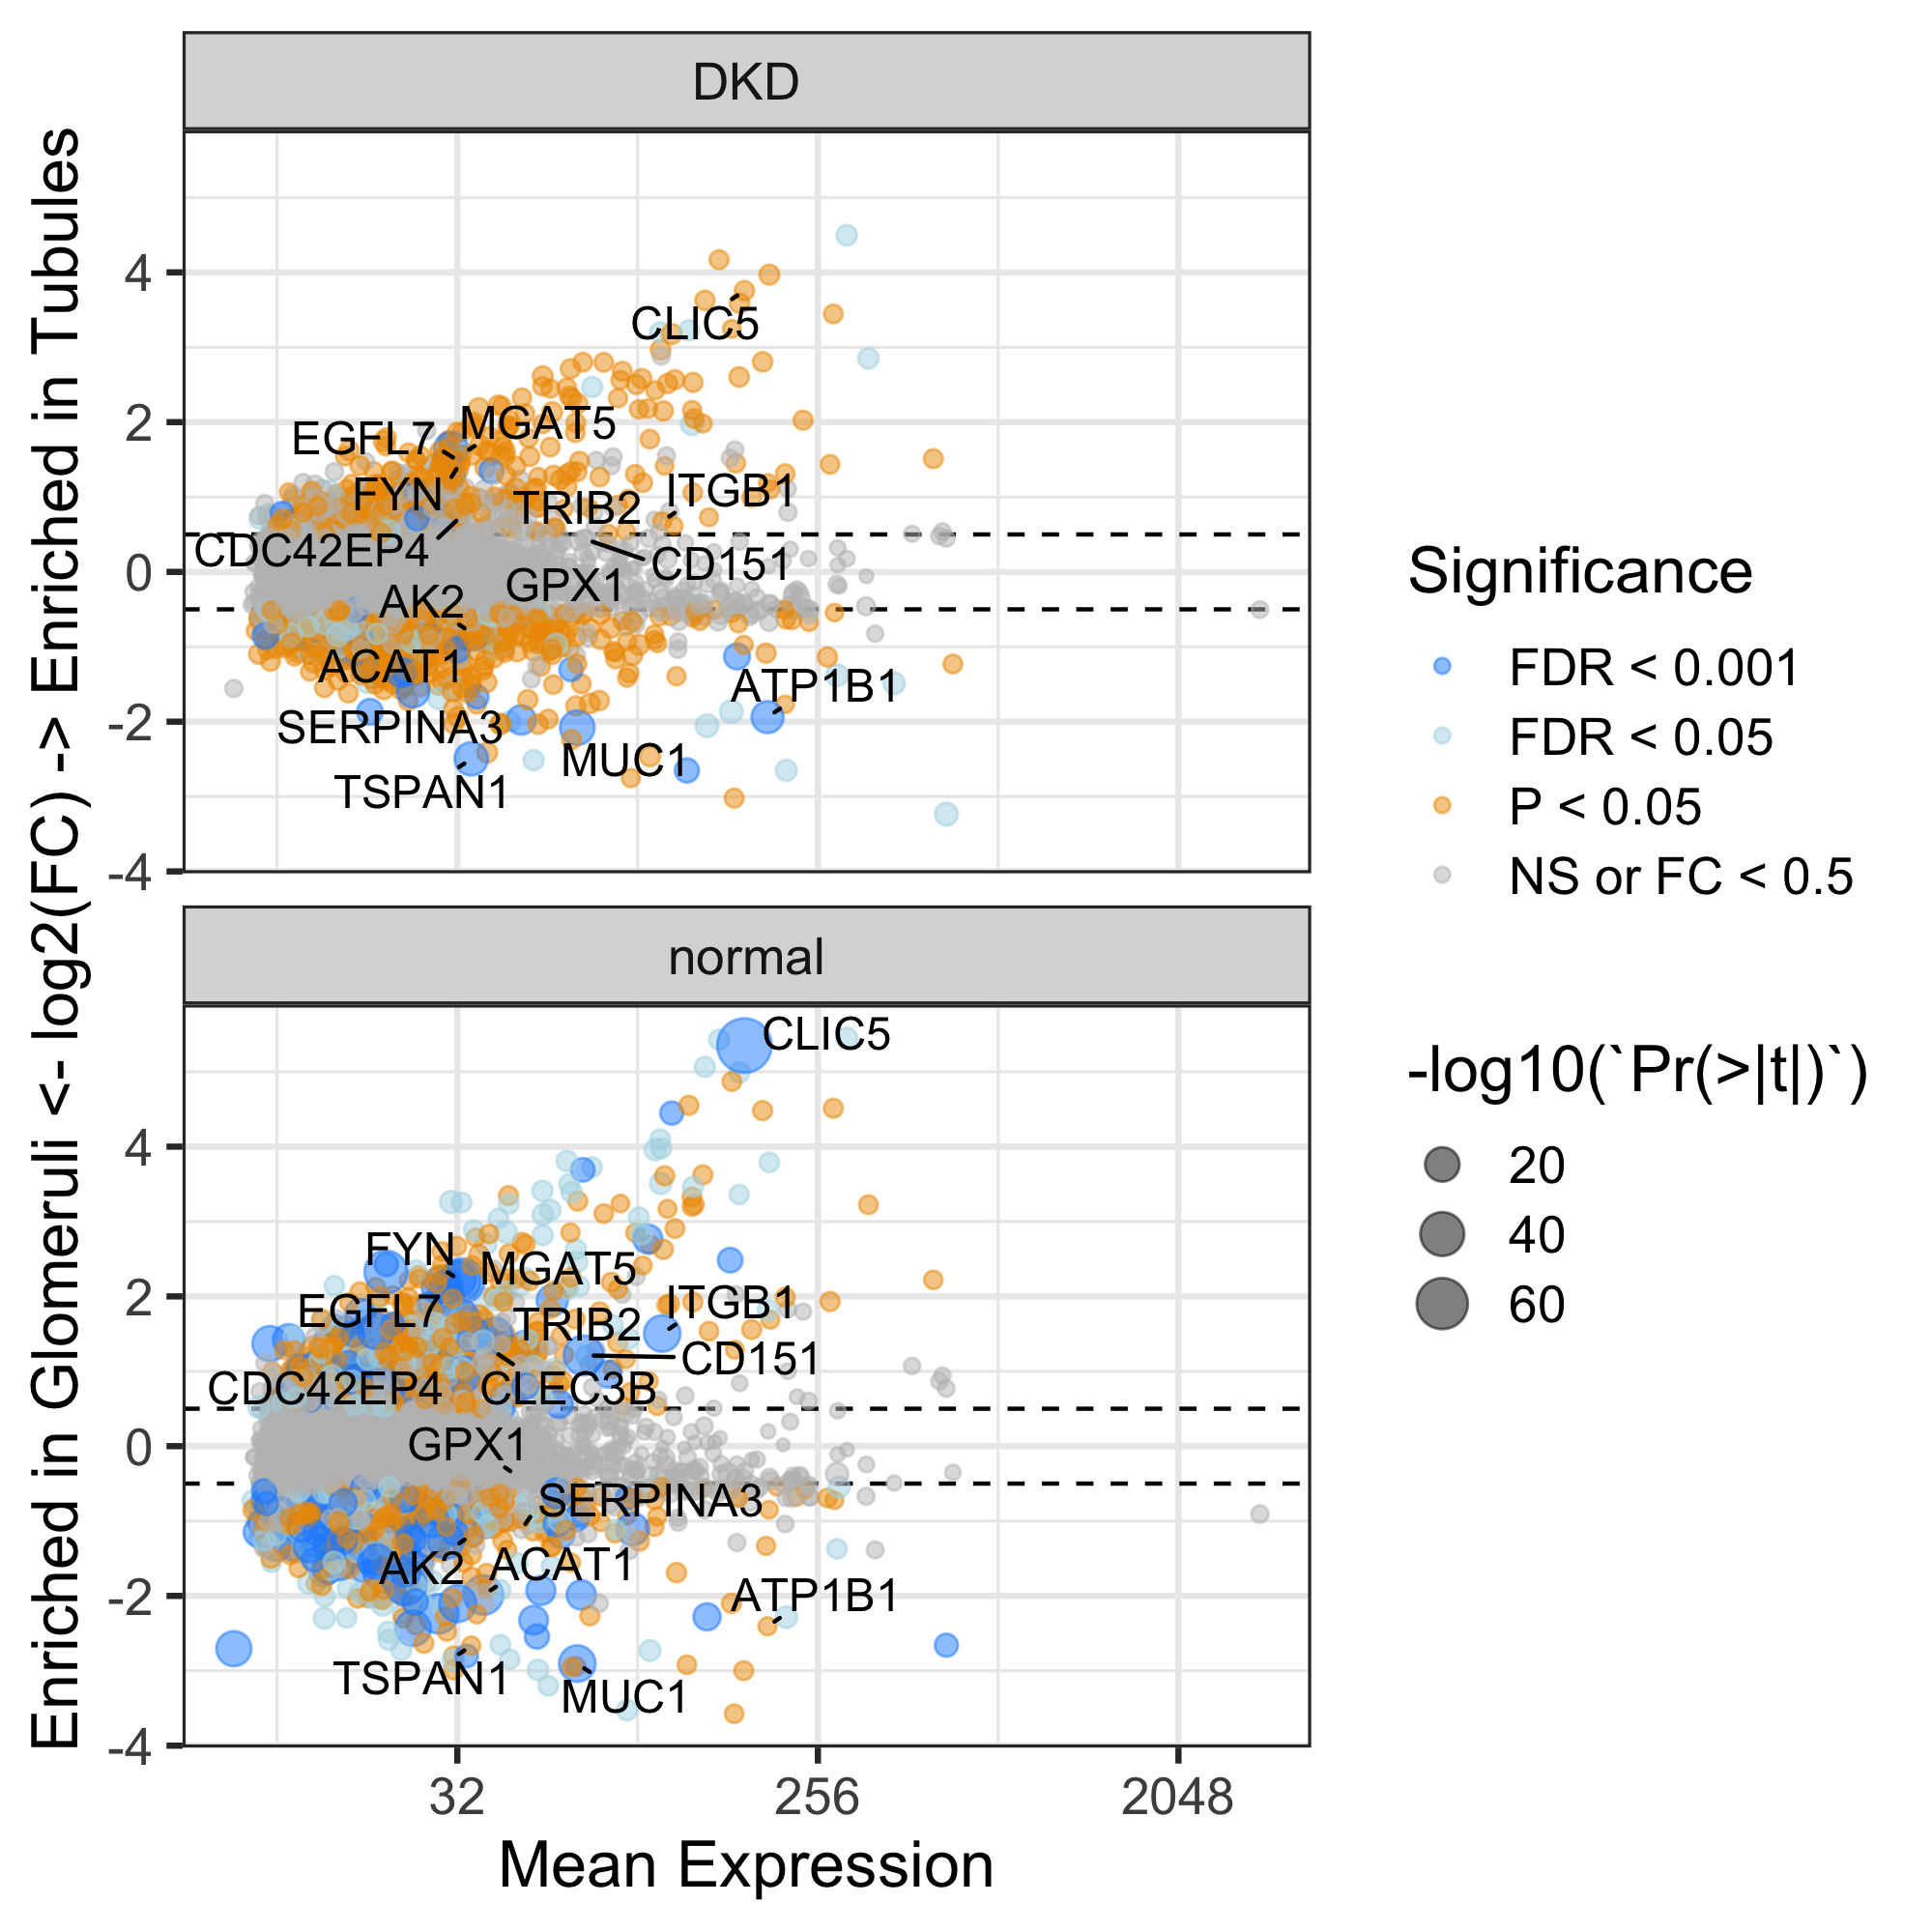

In [216]:
Image(filename='plots/6_4_ma_plot.png', width=600)